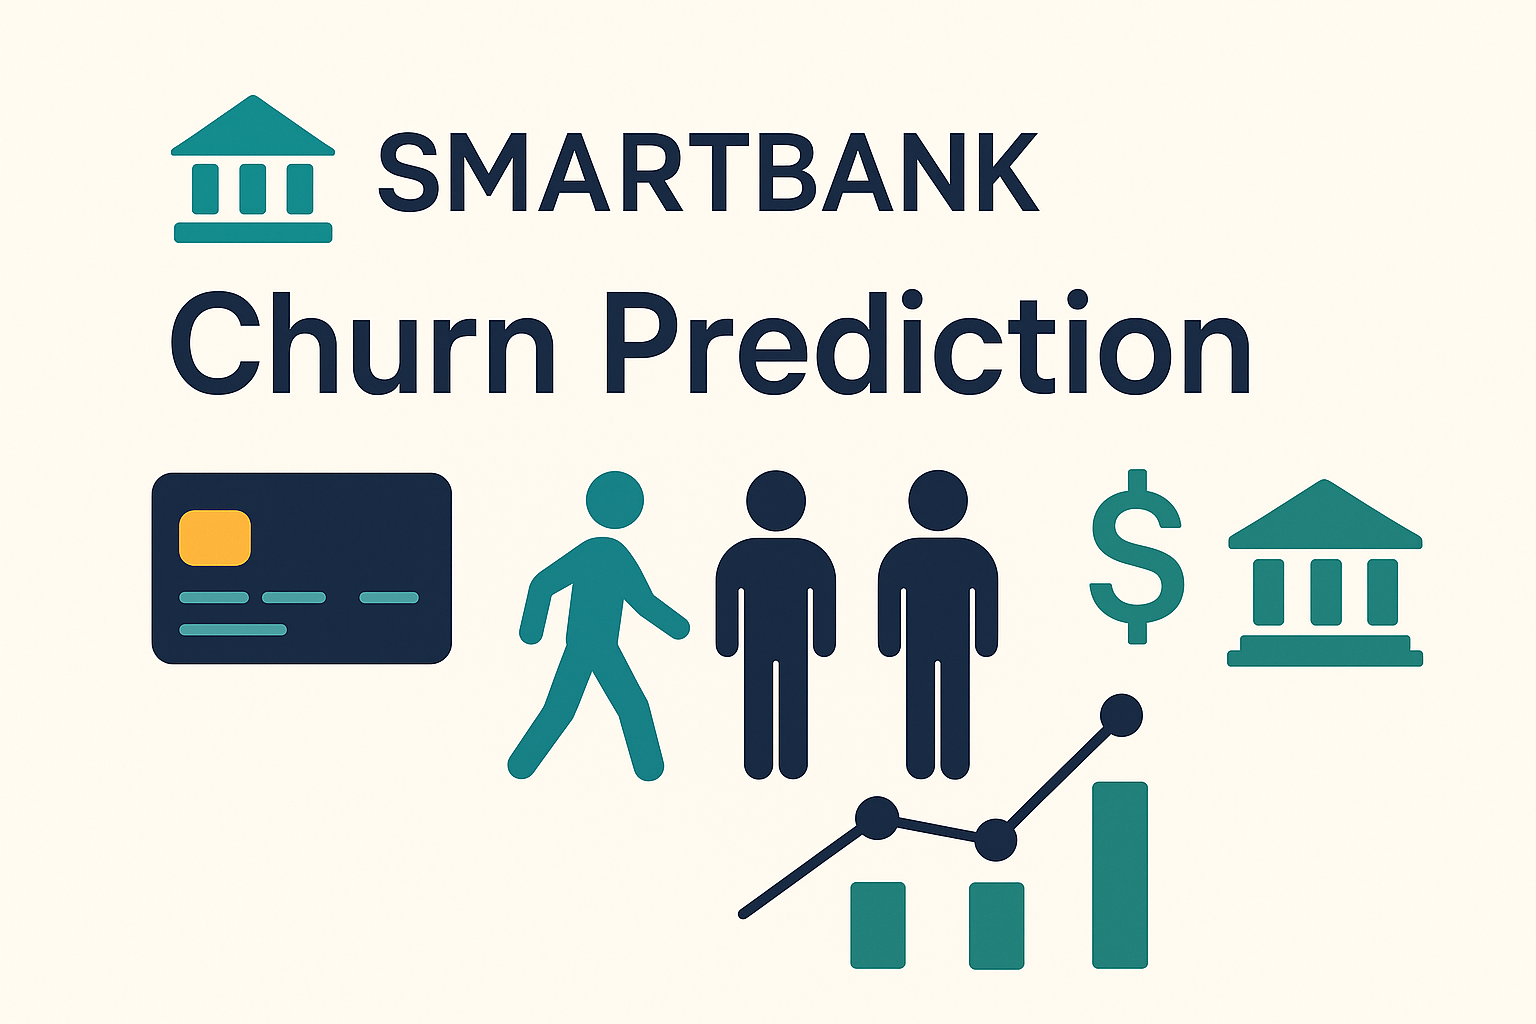

# **Task I: Data Gathering and Exploratory Analysis**


## Task instructions
**Introduction**

In this task, you will take the first critical steps toward building a predictive model for customer churn. Your work will involve gathering relevant data, conducting EDA, and preparing the data set for model development. These activities are foundational for ensuring the accuracy and reliability of your subsequent analysis and predictions.

**Instructions**

**Identify and gather data:**

- Review the provided data sources and select those most relevant for predicting customer churn. Focus on key areas such as customer demographics, transaction history, and customer service interactions.

- Document your selection criteria and rationale for choosing each data set, ensuring that the data will provide meaningful insights into customer behaviour.

**Perform EDA:**

- Use statistical techniques and data visualisation tools to explore the data sets. Create visualisations such as histograms, scatter plots, and box plots to understand distributions, trends, and relationships between variables.

- Identify key features that may influence customer churn, paying special attention to patterns or anomalies that could be significant.

**Clean and preprocess the data:**

- Handle missing values by choosing appropriate methods such as imputation, removal, or flagging. Justify your chosen method based on the data and context.

- Detect and address outliers that could skew the analysis or predictions. Decide whether to cap, transform, or remove outliers based on their nature and potential impact.

- Standardise or normalise numerical features to ensure consistent scales across variables. This step is crucial for preparing the data for machine learning algorithms.

- Encode categorical variables using techniques like one-hot encoding to transform them into a numerical form appropriate for analysis.

**Deliverables:**

- File submission: Submit a comprehensive report detailing your data gathering, EDA, and data cleaning processes. The report should include:

  - A summary of the data sets selected and the rationale for their inclusion
  - Visualisations and statistical summaries from the EDA
  - A description of the data cleaning and preprocessing steps taken
- The cleaned and preprocessed data set ready for model building

Ensure that your report is clear, concise, and well-organised, as it will be a key component of the project's success, guiding future analysis and model development.



# Importing libraries

In [330]:
# Data Wrangling and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Time based analysis
from datetime import datetime, timedelta

# Statistical testing
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, kruskal
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Clustering Algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ML Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

# Class Imbalances
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Miscellaneous
import matplotlib.colors as mcolors
import json

# Customizations

In [331]:
# Defining a custom color scheme
custom_palette = {
    "dark_navy": "#1D2B40",
    "teal_green": "#1B7C79",
    "muted_yellow": "#F5B846",
    "off_white": "#F9F6F1"
}

In [332]:
# Define custom colormap with all palette colors
custom_cmap_offwhite_teal = mcolors.LinearSegmentedColormap.from_list(
    "offwhite_teal_colormap",
    [custom_palette["off_white"], custom_palette["teal_green"]])

In [333]:
# Font for charts
plt.rcParams['font.family'] = 'Liberation Sans'

# 1. Gathering the Data Needed

The following data sources were selected to provide a comprehensive view of customer behavior and support effective churn prediction. Each dataset contributes unique insights into the factors that may influence customer retention or attrition.

| **Dataset**            | **Description**                                                                 | **Rationale for Inclusion**                                                                 |
|------------------------|----------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `customer_demographics` | Contains personal and account-related information such as age, gender, marital status, etc. | Helps identify demographic factors and customer profiles associated with higher churn risk. |
| `transaction_history`  | Records customer transactions including frequency, amount, and type of transaction. | Provides behavioral signals of engagement or disengagement, essential for churn prediction. |
| `customer_service`     | Logs interactions with customer support including inquiry types, frequency, and resolution times. | Reflects customer satisfaction levels and potential frustration points.                    |
| `online_activity`      | Captures user actions on the digital platform such as login frequency, session duration, and features used. | Offers insight into digital engagement and product usage patterns.                         |
| `churn_status`         | Indicates whether a customer has churned or remained active.                       | Serves as the target variable for training and evaluating the predictive model.             |


In [334]:
data_path = 'https://github.com/kofoworola-e/forage_virtual_internship/raw/refs/heads/main/Lloyds_Banking_Group/Customer_Churn_Data_Large.xlsx'

In [335]:
customer_demographics = pd.read_excel(data_path, sheet_name='Customer_Demographics')
transaction_history = pd.read_excel(data_path, sheet_name='Transaction_History')
customer_service = pd.read_excel(data_path, sheet_name='Customer_Service')
online_activity = pd.read_excel(data_path, sheet_name='Online_Activity')
churn_status = pd.read_excel(data_path, sheet_name='Churn_Status')

## 1.1 Dataset Overview: `customer_demographics`


| **Feature**     | **Data Type** | **Description**                                      | **Sample Values**                         |
|------------------|----------------|------------------------------------------------------|-------------------------------------------|
| `CustomerID`     | Integer        | Unique identifier for each customer                  | 1000 unique values (e.g., 1, 2...)  |
| `Age`            | Integer        | Age of the customer in years                         | Range 18 - 69    |
| `Gender`         | Categorical    | Gender of the customer                               | M, F                                       |
| `MaritalStatus`  | Categorical    | Marital status of the customer                       | Single, Married, Widowed, Divorced         |
| `IncomeLevel`    | Categorical    | Estimated income group of the customer               | Low, Medium, High                          |

#### Initial Observations:
- **No missing values** in any of the columns.
- `Gender`, `MaritalStatus`, and `IncomeLevel` are all **nominal categorical variables**.
- `Age` is a **continuous numerical variable** and may require binning or standardization depending on the model.
- Further exploration will include distribution plots for `Age` and frequency counts for the categorical features.

In [336]:
customer_demographics.head()

CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium

In [337]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [338]:
print(f"There are {customer_demographics['CustomerID'].nunique()} unique customers.")
print()

print(f"The age ranges from {customer_demographics['Age'].min()} to {customer_demographics['Age'].max()}.")
print()

for col in ['Gender', 'MaritalStatus', 'IncomeLevel']:
    print(f'{col}:')
    print(customer_demographics[col].unique())
    print()

There are 1000 unique customers.

The age ranges from 18 to 69.

Gender:
['M' 'F']

MaritalStatus:
['Single' 'Married' 'Widowed' 'Divorced']

IncomeLevel:
['Low' 'Medium' 'High']



## 1.2 Dataset Overview: `transaction_history`


| **Feature**         | **Data Type**     | **Description**                                       | **Sample Values**                              |
|---------------------|-------------------|-------------------------------------------------------|------------------------------------------------|
| `CustomerID`        | Integer           | Unique identifier for each customer                   | 1000 unique values (e.g., 1, 2, ...)           |
| `TransactionID`     | Integer           | Unique identifier for each transaction                | 5054 unique transaction IDs                    |
| `TransactionDate`   | DateTime          | Date and time when the transaction occurred           | Range: 2022-01-01 to 2022-12-31                |
| `AmountSpent`       | Float             | Amount of money in dollars spent in the transaction              | Varies, e.g., 15.75, 200.50                    |
| `ProductCategory`   | Categorical       | Category of the product purchased                     | Electronics, Clothing, Furniture, Groceries, Books |

#### Initial Observations:
- The dataset contains **5054 transaction records** for **1000 unique customers**.
- **No missing values** in any of the columns.
- The **date range** spans from **2022-01-01** to **2022-12-31**, offering a full year's worth of transaction data.
- `AmountSpent` is a **continuous numerical variable** and may require scaling for use in predictive modeling.
- `ProductCategory` is a **nominal categorical variable**, which will help identify spending preferences.
- Further exploration will involve **aggregating transaction data** per customer (e.g., total spend, frequency) to analyze behavior patterns.


In [339]:
transaction_history.head()

CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3           2           2998      2022-01-25       101.31       Furniture
4           2           1228      2022-07-24       397.37        Clothing

In [340]:
transaction_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


In [341]:
print(f"There are records for {transaction_history['CustomerID'].nunique()} unique customers.")
print(f"The date range is for {transaction_history['TransactionDate'].min()} to {transaction_history['TransactionDate'].max()}.")

There are records for 1000 unique customers.
The date range is for 2022-01-01 00:00:00 to 2022-12-31 00:00:00.


In [342]:
transaction_history['ProductCategory'].unique()

array(['Electronics', 'Clothing', 'Furniture', 'Groceries', 'Books'],
      dtype=object)

## 1.3 Dataset Overview: `customer_service`


| **Feature**           | **Data Type**     | **Description**                                       | **Sample Values**                              |
|-----------------------|-------------------|-------------------------------------------------------|------------------------------------------------|
| `CustomerID`          | Integer           | Unique identifier for each customer                   | 668 unique customers (some customers may have multiple interactions) |
| `InteractionID`       | Integer           | Unique identifier for each customer service interaction| 1002 unique interaction records                |
| `InteractionDate`     | DateTime          | Date and time of the interaction                       | Range: 2022-01-01 to 2022-12-30                |
| `InteractionType`     | Categorical       | Type of interaction with customer service             | Inquiry, Feedback, Complaint                   |
| `ResolutionStatus`    | Categorical       | Outcome of the interaction                            | Resolved, Unresolved                           |

#### Initial Observations:
- The dataset contains **1002 interaction records** for **668 unique customers**, indicating some customers have multiple interactions within the year.
- **No missing values** in any of the columns within the customer service dataset itself. However, it is important to note that **some customers did not interact with customer service** during the year, which will be handled during the data preprocessing stage.
- The **date range** spans from **2022-01-01** to **2022-12-30**, which is nearly a full year.
- `InteractionType` and `ResolutionStatus` are **nominal categorical variables**.
- **InteractionDate** provides a timestamp that could be useful for trend analysis or frequency of interactions over time.
- Further analysis will focus on understanding **customer satisfaction trends** based on interaction types and resolution status.


In [343]:
customer_service.head()

CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1           2           3329      2022-03-17         Inquiry         Resolved
2           3           9976      2022-08-24         Inquiry         Resolved
3           4           7354      2022-11-18         Inquiry         Resolved
4           4           5393      2022-07-03         Inquiry       Unresolved

In [344]:
customer_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


In [345]:
print(f"There are {customer_service['CustomerID'].nunique()} unique customers.")
print()
print(f"The date range is for {customer_service['InteractionDate'].min()} to {customer_service['InteractionDate'].max()}.")
print()
for col in ['InteractionType', 'ResolutionStatus']:
    print(f'{col}:')
    print(customer_service[col].unique())
    print()

There are 668 unique customers.

The date range is for 2022-01-01 00:00:00 to 2022-12-30 00:00:00.

InteractionType:
['Inquiry' 'Feedback' 'Complaint']

ResolutionStatus:
['Resolved' 'Unresolved']



## 1.4 Dataset Overview: `online_activity`

| **Feature**         | **Data Type**     | **Description**                                       | **Sample Values**                              |
|---------------------|-------------------|-------------------------------------------------------|------------------------------------------------|
| `CustomerID`        | Integer           | Unique identifier for each customer                   | 1000 unique customers                          |
| `LastLoginDate`     | DateTime          | Date and time of the most recent login                | Latest date: 2023-12-31                        |
| `LoginFrequency`    | Integer           | Number of times the customer has logged in            | Varies, e.g., 5, 30, 120                       |
| `ServiceUsage`      | Categorical       | Type of online service the customer uses              | Mobile App, Website, Online Banking            |

#### Initial Observations:
- The dataset contains **1000 records**, each representing a unique customer’s online activity.
- **No missing values** in any of the columns.
- The **date range** for `LastLoginDate` spans up to **2023-12-31**, capturing recent customer behavior.
- `LoginFrequency` is a **continuous numerical variable** that reflects customer engagement.
- `ServiceUsage` is a **nominal categorical variable**, indicating which platform the customer uses for interaction.
- Further analysis will explore **login trends**, **service preferences**, and their potential impact on churn.

In [346]:
online_activity.head()

CustomerID LastLoginDate  LoginFrequency ServiceUsage
0           1    2023-10-21              34   Mobile App
1           2    2023-12-05               5      Website
2           3    2023-11-15               3      Website
3           4    2023-08-25               2      Website
4           5    2023-10-27              41      Website

In [347]:
online_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


In [348]:
print(f"There are {online_activity['CustomerID'].nunique()} unique customers.")
print()
print(f"The latest login date is {online_activity['LastLoginDate'].max()}.")
print()
print(f"ServiceUsage: {online_activity['ServiceUsage'].unique()}")

There are 1000 unique customers.

The latest login date is 2023-12-31 00:00:00.

ServiceUsage: ['Mobile App' 'Website' 'Online Banking']


## 1.5 Dataset Overview: `churn_status`


| **Feature**       | **Data Type**     | **Description**                                       | **Sample Values**                              |
|-------------------|-------------------|-------------------------------------------------------|------------------------------------------------|
| `CustomerID`      | Integer           | Unique identifier for each customer                   | 1000 unique customers                          |
| `ChurnStatus`     | Integer           | Churn status of the customer (0 = Retained, 1 = Churned) | 0, 1                                           |

#### Initial Observations:
- The dataset contains **1000 records**, corresponding to **1000 unique customers**.
- **No missing values** in any of the columns.
- `ChurnStatus` is a **binary categorical variable**, with `0` representing retaind/non-churned customers and `1` representing churned customers.
- This dataset will be used to train the churn prediction model, with `ChurnStatus` as the target variable.



In [349]:
churn_status.head()

CustomerID  ChurnStatus
0           1            0
1           2            1
2           3            0
3           4            0
4           5            0

In [350]:
churn_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


## 1.6 Aggregating the Datasets with One-to-Many Relationship with `CustomerID`

Some of the datasets — such as `transaction_history` and `customer_service` — have a one-to-many relationship with `CustomerID`. This means that each customer may have multiple transactions or multiple service interactions.

If we merge these datasets directly on `CustomerID`, it can lead to a **Cartesian product effect** — where rows multiply unnecessarily, causing:
- Duplicated or inflated records
- Mismatched data between datasets
- Distorted metrics in downstream analysis

To prevent this and maintain data integrity we aggregate each dataset at the customer level before merging This way:
- Each customer is represented by a single row.
- Aggregated metrics (e.g., total spent, resolution rate) are more meaningful
- Feature engineering is cleaner and more accurate

This approach ensures we build a high-quality, unified customer profile dataset for reliable analysis and modeling.


### 1.6.1 **`transaction_history`** - Aggregation Breakdown
➤ `TotalSpent`
- **What it means**: The **total amount of money** spent by the customer.
- **Why it's useful**: Direct measure of **customer value**. Higher spenders are often more important to retain.

➤ `AvgSpent`
- **What it means**: The **average spend per transaction** for the customer.
- **Why it's useful**: Indicates **purchase behavior** or **ticket size** — helps differentiate between frequent small spenders vs. infrequent big spenders.

➤ `NumTransactions`
- **What it means**: Number of transactions the customer has made.
- **Why it's useful**: This is the **frequency** part of RFM — shows how often the customer engages financially.



➤ `FirstPurchase`
- **What it means**: Date of the customer's **first transaction**.
- **Why it's useful**: Can be used to compute **customer tenure**.

➤ `LastPurchase`
- **What it means**: Date of the customer's **most recent transaction**.
- **Why it's useful**: Helps calculate **recency**, which is important in predicting churn — longer time since last purchase might indicate disengagement.

*Note: In the process of aggregating the ProductCategory feature has been dropped.*


In [351]:
agg_transactions = transaction_history.groupby("CustomerID").agg({
    "AmountSpent": ["sum", "mean", "count"],
    "TransactionDate": ["min", "max"]
}).round(2)

agg_transactions.columns = ['TotalSpent', 'AvgSpent', 'NumTransactions', 'FirstPurchase', 'LastPurchase']
agg_transactions = agg_transactions.reset_index()
agg_transactions.head()

CustomerID  TotalSpent  AvgSpent  NumTransactions FirstPurchase  \
0           1      416.50    416.50                1    2022-03-27   
1           2     1547.42    221.06                7    2022-01-09   
2           3     1702.98    283.83                6    2022-02-11   
3           4      917.29    183.46                5    2022-05-22   
4           5     2001.49    250.19                8    2022-02-21   

  LastPurchase  
0   2022-03-27  
1   2022-11-19  
2   2022-10-08  
3   2022-12-27  
4   2022-12-21

In [352]:
agg_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   int64         
 1   TotalSpent       1000 non-null   float64       
 2   AvgSpent         1000 non-null   float64       
 3   NumTransactions  1000 non-null   int64         
 4   FirstPurchase    1000 non-null   datetime64[ns]
 5   LastPurchase     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 47.0 KB


### 1.6.2 **`customer_service`** - Aggregation Breakdown

#### ➤ NumInteractions
- **What it means**: The total number of interactions the customer had with customer service.
- **Why it's useful**: Indicates customer engagement with customer support. More interactions may suggest issues or concerns, which can be key indicators of potential churn.

#### ➤ UniqueInteractionTypes
- **What it means**: The number of distinct types of interactions (e.g., inquiry, complaint, feedback) the customer has had with customer service.
- **Why it's useful**: Helps understand the nature of customer service engagement. Customers with multiple interaction types may have diverse needs or more complex issues.

#### ➤ NumComplaints
- **What it means**: The total number of complaints filed by the customer.
- **Why it's useful**: Direct measure of dissatisfaction. Frequent complaints could correlate with a higher likelihood of churn if unresolved.

#### ➤ UnresolvedComplaints
- **What it means**: The number of complaints that remain unresolved.
- **Why it's useful**: Indicates poor service resolution, which can lead to frustration and churn. It helps assess the effectiveness of the company's customer service.

#### ➤ ResolvedComplaints
- **What it means**: The number of complaints that were resolved.
- **Why it's useful**: A measure of successful customer service interaction. High resolution rates can be a positive sign of customer retention.

#### ➤ HadComplaint
- **What it means**: A boolean flag indicating whether the customer has ever filed a complaint.
- **Why it's useful**: Shows if a customer has had issues that might affect their satisfaction. Customers who have lodged complaints may require more attention to retain.

#### ➤ HasUnresolvedComplaint
- **What it means**: A boolean flag indicating whether the customer currently has any unresolved complaints.
- **Why it's useful**: A key churn indicator. Unresolved complaints, especially if recent, may suggest a higher risk of churn.

#### ➤ FirstInteraction
- **What it means**: The date of the customer’s first interaction with customer service.
- **Why it's useful**: Can be used to calculate customer tenure with customer service and provide context for other features like complaint history.

#### ➤ LastInteraction
- **What it means**: The date of the customer’s most recent interaction with customer service.
- **Why it's useful**: Helps calculate recency and can be an important feature for churn prediction — customers who haven’t interacted with customer service recently may be less engaged.

#### ➤ MultipleInteractionTypes
- **What it means**: A boolean flag indicating whether the customer has interacted with more than one type of service (e.g., both complaints and inquiries).
- **Why it's useful**: Customers interacting across different service types might be dealing with more complex or unresolved issues, potentially making them at higher risk for churn.

#### ➤ InteractionSpanDays
- **What it means**: The number of days between the customer’s first and last interaction with customer service.
- **Why it's useful**: Indicates how long the customer has been engaged with customer service. A larger span may indicate ongoing or repeated issues, while a smaller span may indicate recent dissatisfaction.

#### ➤ InteractionFrequency
- **What it means**: The average number of interactions per day between the customer and customer service.
- **Why it's useful**: High interaction frequency can indicate either good customer service engagement or frequent unresolved issues. This can provide a deeper insight into customer satisfaction.

In [353]:
# Mark complaint status
cs = customer_service.copy()
cs['IsComplaint'] = cs['InteractionType'] == 'Complaint'
cs['IsResolvedComplaint'] = (cs['IsComplaint']) & (cs['ResolutionStatus'] == 'Resolved')
cs['IsUnresolvedComplaint'] = (cs['IsComplaint']) & (cs['ResolutionStatus'] == 'Unresolved')

# Groupby aggregation
agg_service = cs.groupby('CustomerID').agg(
    NumInteractions=('InteractionID', 'count'),
    UniqueInteractionTypes=('InteractionType', pd.Series.nunique),
    NumComplaints=('IsComplaint', 'sum'),
    UnresolvedComplaints=('IsUnresolvedComplaint', 'sum'),
    ResolvedComplaints=('IsResolvedComplaint', 'sum'),
    HadComplaint=('IsComplaint', 'any'),
    HasUnresolvedComplaint=('IsUnresolvedComplaint', 'any'),
    FirstInteraction=('InteractionDate', 'min'),
    LastInteraction=('InteractionDate', 'max')
).reset_index()

# Derived
agg_service['MultipleInteractionTypes'] = agg_service['UniqueInteractionTypes'] > 1
agg_service['InteractionSpanDays'] = ((agg_service['LastInteraction']) - (agg_service['FirstInteraction'])
).dt.days
agg_service['InteractionFrequency'] = agg_service['NumInteractions'] / (agg_service['InteractionSpanDays'] + 1)

agg_service.head()

CustomerID  NumInteractions  UniqueInteractionTypes  NumComplaints  \
0           1                1                       1              0   
1           2                1                       1              0   
2           3                1                       1              0   
3           4                2                       1              0   
4           6                1                       1              0   

   UnresolvedComplaints  ResolvedComplaints  HadComplaint  \
0                     0                   0         False   
1                     0                   0         False   
2                     0                   0         False   
3                     0                   0         False   
4                     0                   0         False   

   HasUnresolvedComplaint FirstInteraction LastInteraction  \
0                   False       2022-03-31      2022-03-31   
1                   False       2022-03-17      2022-03-17   
2                   False       2022-08-24      2022-08-24   
3                   False       2022-07-03      2022-11-18   
4                   False       2022-05-05      2022-05-05   

   MultipleInteractionTypes  InteractionSpanDays  InteractionFrequency  
0                     False                    0              1.000000  
1                     False                    0              1.000000  
2                     False                    0              1.000000  
3                     False                  138              0.014388  
4                     False                    0              1.000000

## 1.7 Merging the Datasets


To build a comprehensive customer profile, we merge the individual datasets into a single unified dataset.

#### Explanation:
1. **customer_demographics.merge(agg_transactions, on="CustomerID", how="left")**:
   - Merges the `customer_demographics` dataset with the aggregated `transaction_history` dataset based on the `CustomerID`.
   - A **left join** ensures that all rows from `customer_demographics` are retained, even if there are no matching records in the `agg_transactions` dataset (e.g., customers with no transactions).

2. **.merge(agg_service, on="CustomerID", how="left")**:
   - Merges the result of the previous join with the aggregated `customer_service` dataset.
   - This brings in the customer service interaction metrics, ensuring that all customers from the earlier merged dataset are included, even if they have no customer service interactions.

3. **.merge(online_activity, on="CustomerID", how="left")**:
   - Merges the existing dataset with the `online_activity` dataset, which includes data on the customer's login frequency, service usage, etc.
   - Ensures that customers without online activity records are still included in the final dataset.

4. **.merge(churn_status, on="CustomerID", how="left")**:
   - Finally, the `churn_status` dataset is merged. This dataset contains the target variable for the churn prediction model (`ChurnStatus`), where each customer is labeled as either churned (1) or retained (0).
   - The **left join** ensures that every customer is represented, even if their churn status is unknown.

#### Why Use Left Join?
The left join ensures that the customer data remains complete, retaining all records from the left table (`customer_demographics`), even if there are no matching rows in the other datasets. This approach ensures that no customers are excluded from the final merged dataset, which is crucial for modeling, as each customer must be represented.

#### Output:
The resulting dataset `df` will contain all the columns from the merged datasets, providing a comprehensive profile for each customer, including demographic details, transactional behavior, service interactions, online activity, and churn status.


In [354]:
df = customer_demographics \
    .merge(agg_transactions, on="CustomerID", how="left") \
    .merge(agg_service, on="CustomerID", how="left") \
    .merge(online_activity, on="CustomerID", how="left") \
    .merge(churn_status, on="CustomerID", how="left")

In [355]:
pd.set_option('display.max_columns', None)

In [356]:
df.head()

CustomerID  Age Gender MaritalStatus IncomeLevel  TotalSpent  AvgSpent  \
0           1   62      M        Single         Low      416.50    416.50   
1           2   65      M       Married         Low     1547.42    221.06   
2           3   18      M        Single         Low     1702.98    283.83   
3           4   21      M       Widowed         Low      917.29    183.46   
4           5   21      M      Divorced      Medium     2001.49    250.19   

   NumTransactions FirstPurchase LastPurchase  NumInteractions  \
0                1    2022-03-27   2022-03-27              1.0   
1                7    2022-01-09   2022-11-19              1.0   
2                6    2022-02-11   2022-10-08              1.0   
3                5    2022-05-22   2022-12-27              2.0   
4                8    2022-02-21   2022-12-21              NaN   

   UniqueInteractionTypes  NumComplaints  UnresolvedComplaints  \
0                     1.0            0.0                   0.0   
1                     1.0            0.0                   0.0   
2                     1.0            0.0                   0.0   
3                     1.0            0.0                   0.0   
4                     NaN            NaN                   NaN   

   ResolvedComplaints HadComplaint HasUnresolvedComplaint FirstInteraction  \
0                 0.0        False                  False       2022-03-31   
1                 0.0        False                  False       2022-03-17   
2                 0.0        False                  False       2022-08-24   
3                 0.0        False                  False       2022-07-03   
4                 NaN          NaN                    NaN              NaT   

  LastInteraction MultipleInteractionTypes  InteractionSpanDays  \
0      2022-03-31                    False                  0.0   
1      2022-03-17                    False                  0.0   
2      2022-08-24                    False                  0.0   
3      2022-11-18                    False                138.0   
4             NaT                      NaN                  NaN   

   InteractionFrequency LastLoginDate  LoginFrequency ServiceUsage  \
0              1.000000    2023-10-21              34   Mobile App   
1              1.000000    2023-12-05               5      Website   
2              1.000000    2023-11-15               3      Website   
3              0.014388    2023-08-25               2      Website   
4                   NaN    2023-10-27              41      Website   

   ChurnStatus  
0            0  
1            1  
2            0  
3            0  
4            0

# 2. Initial Review of the Full Dataset and Data Quality Issues


The dataset has 1000 entries, each representing a unique customer. After merging the various datasets, some data quality issues have been identified that require attention:

#### Overview of the Full Dataset
The dataset contains **26 columns**, representing different features such as demographic information, transactional data, customer service interactions, online activity, and churn status.

#### Data Quality Issues
1. **Missing Values**:
   - There are **missing values** in the following columns:
     - `NumInteractions`, `UniqueInteractionTypes`, `NumComplaints`,
     `UnresolvedComplaints`, `ResolvedComplaints`, `HadComplaint`, `HasUnresolvedComplaint`, `FirstInteraction`, `LastInteraction`, `MultipleInteractionTypes`, `InteractionSpanDays`, `InteractionFrequency`.
   - These missing values occur because **332 customers** have never interacted with customer service, which is a **common scenario** in such datasets. This can be handled by:
     - Creating an **interaction flag** (1 = interaction, 0 = no interaction) to clearly mark whether a customer interacted with customer service.
     - Filling missing values in other columns with **0** (for numeric fields like **NumInteractions**) and using a **placeholder timestamp** (e.g., `"1970-01-01"`) for the time-based fields (e.g., **FirstInteraction**, **LastInteraction**). This ensures that no customer is left out of the analysis while still maintaining the distinction between customers who have interacted and those who haven't.

2. **Inconsistent Data Types**:
   - The columns **HadComplaint**, **HasUnresolvedComplaint**, and **MultipleInteractionTypes** are currently of type `object`, but they would benefit from being encoded as **boolean** or **categorical** data types. This will improve both analysis and model input, making it easier to interpret the data.

3. **Datetime Columns**:
   - The **FirstPurchase**, **LastPurchase**, **FirstInteraction**, and **LastInteraction** columns are in the `datetime64` format, which is ideal for time-based analysis.
   - These columns will be used to calculate important customer metrics such as **Recency** (time since last purchase/interaction), **Tenure** (time since first purchase), and **Frequency** (average frequency of interactions or transactions).
   - Customers who have missing values in these datetime fields should be handled by using placeholder timestamps and adjusted accordingly in future analyses.

4. **Potential Outliers**:
   - The columns **IncomeLevel**, **TotalSpent**, and **AvgSpent** may contain **outliers** or unexpected values that need to be validated.
   - Specifically, customers with zero or negative amounts spent or extremely high spending values should be reviewed for potential data errors or unusual behavior.
   - A thorough outlier detection process will help identify and handle such cases.

5. **Categorical Columns**:
   - The **Gender**, **MaritalStatus**, **IncomeLevel**, **ServiceUsage**, and **ChurnStatus** columns contain categorical data. These columns should be **encoded properly** (e.g., using one-hot encoding or label encoding) before they can be used in machine learning models.





In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                1000 non-null   int64         
 1   Age                       1000 non-null   int64         
 2   Gender                    1000 non-null   object        
 3   MaritalStatus             1000 non-null   object        
 4   IncomeLevel               1000 non-null   object        
 5   TotalSpent                1000 non-null   float64       
 6   AvgSpent                  1000 non-null   float64       
 7   NumTransactions           1000 non-null   int64         
 8   FirstPurchase             1000 non-null   datetime64[ns]
 9   LastPurchase              1000 non-null   datetime64[ns]
 10  NumInteractions           668 non-null    float64       
 11  UniqueInteractionTypes    668 non-null    float64       
 12  NumComplaints        

In [358]:
#check for duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [359]:
# Sum of missing rows
df.isna().sum()

CustomerID                    0
Age                           0
Gender                        0
MaritalStatus                 0
IncomeLevel                   0
TotalSpent                    0
AvgSpent                      0
NumTransactions               0
FirstPurchase                 0
LastPurchase                  0
NumInteractions             332
UniqueInteractionTypes      332
NumComplaints               332
UnresolvedComplaints        332
ResolvedComplaints          332
HadComplaint                332
HasUnresolvedComplaint      332
FirstInteraction            332
LastInteraction             332
MultipleInteractionTypes    332
InteractionSpanDays         332
InteractionFrequency        332
LastLoginDate                 0
LoginFrequency                0
ServiceUsage                  0
ChurnStatus                   0
dtype: int64

In [360]:
# Rows with missing data
df[df.isna().any(axis=1)]

CustomerID  Age Gender MaritalStatus IncomeLevel  TotalSpent  AvgSpent  \
4             5   21      M      Divorced      Medium     2001.49    250.19   
6             7   27      F       Married        High       86.73     86.73   
9            10   68      M       Married        High     1397.36    199.62   
20           21   64      M      Divorced        High      913.02    182.60   
31           32   69      F       Married        High     1225.52    245.10   
..          ...  ...    ...           ...         ...         ...       ...   
995         996   54      F        Single         Low      227.25    227.25   
996         997   19      M       Widowed        High      419.82    209.91   
997         998   47      M       Married         Low      252.15    252.15   
998         999   23      M       Widowed        High     2393.26    265.92   
999        1000   34      M       Widowed         Low     1670.79    278.46   

     NumTransactions FirstPurchase LastPurchase  NumInteractions  \
4                  8    2022-02-21   2022-12-21              NaN   
6                  1    2022-10-24   2022-10-24              NaN   
9                  7    2022-01-19   2022-10-31              NaN   
20                 5    2022-02-16   2022-08-02              NaN   
31                 5    2022-03-01   2022-10-04              NaN   
..               ...           ...          ...              ...   
995                1    2022-07-24   2022-07-24              NaN   
996                2    2022-08-06   2022-10-25              NaN   
997                1    2022-09-18   2022-09-18              NaN   
998                9    2022-01-20   2022-12-07              NaN   
999                6    2022-04-08   2022-12-13              NaN   

     UniqueInteractionTypes  NumComplaints  UnresolvedComplaints  \
4                       NaN            NaN                   NaN   
6                       NaN            NaN                   NaN   
9                       NaN            NaN                   NaN   
20                      NaN            NaN                   NaN   
31                      NaN            NaN                   NaN   
..                      ...            ...                   ...   
995                     NaN            NaN                   NaN   
996                     NaN            NaN                   NaN   
997                     NaN            NaN                   NaN   
998                     NaN            NaN                   NaN   
999                     NaN            NaN                   NaN   

     ResolvedComplaints HadComplaint HasUnresolvedComplaint FirstInteraction  \
4                   NaN          NaN                    NaN              NaT   
6                   NaN          NaN                    NaN              NaT   
9                   NaN          NaN                    NaN              NaT   
20                  NaN          NaN                    NaN              NaT   
31                  NaN          NaN                    NaN              NaT   
..                  ...          ...                    ...              ...   
995                 NaN          NaN                    NaN              NaT   
996                 NaN          NaN                    NaN              NaT   
997                 NaN          NaN                    NaN              NaT   
998                 NaN          NaN                    NaN              NaT   
999                 NaN          NaN                    NaN              NaT   

    LastInteraction MultipleInteractionTypes  InteractionSpanDays  \
4               NaT                      NaN                  NaN   
6               NaT                      NaN                  NaN   
9               NaT                      NaN                  NaN   
20              NaT                      NaN                  NaN   
31              NaT                      NaN                  NaN   
..              ...                      ...   

## 2.1 Handling Missing Data

We will implement the **combined approach** to handle missing values. This involves creating an **interaction flag** to indicate whether a customer has interacted with customer service (1 for interaction, 0 for no interaction). We will then fill missing rows for numeric fields like **NumInteractions** with 0 and for time fields like **FirstInteraction** and **LastInteraction** with a placeholder timestamp (e.g., `"1970-01-01"`).

In [361]:
# Create interaction flag
df['HadInteraction'] = df['NumInteractions'].notna()

# Fill missing timestamp with place holder
df[['FirstInteraction', 'LastInteraction'
]] = df[['FirstInteraction', 'LastInteraction']].fillna(pd.Timestamp('1970-01-01'))

# Fill missing values with 0
df.fillna(0, inplace=True)

## 2.2 Correcting Data Types

In [362]:
# Converting type bool in dtype object to int
bool_cols = ['HadComplaint', 'HasUnresolvedComplaint',
             'MultipleInteractionTypes', 'HadInteraction']

df[bool_cols] = df[bool_cols].astype('category')

In [363]:
# Converting type incorrect dtype float to int
float_cols = ['NumInteractions', 'UniqueInteractionTypes', 'NumComplaints',
              'UnresolvedComplaints', 'ResolvedComplaints', 'InteractionSpanDays',
              'InteractionFrequency']

df[float_cols] = df[float_cols].astype(int)

In [364]:
df.sample(10)

CustomerID  Age Gender MaritalStatus IncomeLevel  TotalSpent  AvgSpent  \
932         933   37      M      Divorced        High       74.06     74.06   
784         785   38      F       Widowed      Medium     1960.77    280.11   
203         204   50      F       Widowed      Medium      454.14    227.07   
622         623   48      F        Single        High     1074.25    153.46   
366         367   25      F        Single         Low     2197.79    313.97   
489         490   58      F       Widowed         Low     2063.08    294.73   
951         952   27      M       Widowed         Low      344.33    344.33   
530         531   27      F      Divorced        High     2008.12    223.12   
566         567   43      M       Married      Medium      472.36    472.36   
710         711   32      F        Single      Medium      391.99    391.99   

     NumTransactions FirstPurchase LastPurchase  NumInteractions  \
932                1    2022-08-31   2022-08-31                2   
784                7    2022-08-01   2022-12-19                1   
203                2    2022-07-15   2022-08-15                2   
622                7    2022-01-30   2022-11-20                2   
366                7    2022-04-22   2022-12-29                1   
489                7    2022-04-18   2022-11-20                2   
951                1    2022-01-25   2022-01-25                1   
530                9    2022-02-18   2022-11-15                1   
566                1    2022-01-10   2022-01-10                0   
710                1    2022-05-27   2022-05-27                1   

     UniqueInteractionTypes  NumComplaints  UnresolvedComplaints  \
932                       2              1                     1   
784                       1              0                     0   
203                       1              0                     0   
622                       1              0                     0   
366                       1              1                     1   
489                       1              0                     0   
951                       1              0                     0   
530                       1              1                     1   
566                       0              0                     0   
710                       1              1                     1   

     ResolvedComplaints HadComplaint HasUnresolvedComplaint FirstInteraction  \
932                   0         True                   True       2022-03-23   
784                   0        False                  False       2022-03-24   
203                   0        False                  False       2022-03-29   
622                   0        False                  False       2022-11-07   
366                   0         True                   True       2022-05-03   
489                   0        False                  False       2022-02-20   
951                   0        False                  False       2022-10-04   
530                   0         True                   True       2022-09-11   
566                   0        False                  False       1970-01-01   
710                   0         True                   True       2022-10-12   

    LastInteraction MultipleInteractionTypes  InteractionSpanDays  \
932      2022-05-02                     True                   40   
784      2022-03-24                    False                    0   
203      2022-07-07                    False                  100   
622      2022-11-19                    False                   12   
366      2022-05-03                    False                    0   
489      2022-09-07                    False                  199   
951      2022-10-04                    False                    0   
530      2022-09-11                    False                    0   
566      1970-01-01                    False                    0   
710      2022-10-12                    False                    0 

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                1000 non-null   int64         
 1   Age                       1000 non-null   int64         
 2   Gender                    1000 non-null   object        
 3   MaritalStatus             1000 non-null   object        
 4   IncomeLevel               1000 non-null   object        
 5   TotalSpent                1000 non-null   float64       
 6   AvgSpent                  1000 non-null   float64       
 7   NumTransactions           1000 non-null   int64         
 8   FirstPurchase             1000 non-null   datetime64[ns]
 9   LastPurchase              1000 non-null   datetime64[ns]
 10  NumInteractions           1000 non-null   int64         
 11  UniqueInteractionTypes    1000 non-null   int64         
 12  NumComplaints        

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in any data science workflow. It involves visually and statistically examining datasets to uncover underlying patterns, detect anomalies, test hypotheses, and gain insights that can inform feature engineering and model development.

In this project, EDA is used to better understand the behavior and characteristics of customers in relation to their churn status. By systematically analyzing various dimensions of the data—demographics, transaction history, customer service interactions, and online activity—we can identify potential factors contributing to customer churn.

---

### Objectives of EDA

The main goals of EDA in this context are:

- **Understand the Distribution of the Target Variable**: Assess whether the dataset is balanced or imbalanced with respect to churn.
- **Uncover Key Relationships**: Identify which customer behaviors or attributes are associated with higher or lower churn risk.
- **Assess Data Quality**: Detect missing values, outliers, or inconsistencies that could affect model performance.
- **Guide Feature Selection and Engineering**: Reveal useful patterns that can be translated into predictive features.

---

### EDA Process

1. **Target Variable Exploration**  
   - Examine the distribution of the target variable (`ChurnStatus`) to understand the proportion of churned vs. retained customers.
   - Evaluate if class imbalance mitigation strategies will be necessary.

2. **Demographic Analysis**  
   - Explore how age, gender, marital status, and income level vary across churned and non-churned customers.
   - Look for patterns such as whether certain age groups or income brackets are more prone to churn.

3. **Transaction Behavior**  
   - Investigate features like total spending, average transaction value, and number of transactions.
   - Determine if low or declining engagement in purchases is a churn indicator.

4. **Customer Service Interactions**  
   - Analyze complaint behavior, resolution status, and frequency of interactions with support.
   - Assess whether unresolved complaints or high interaction frequency are predictors of churn.

5. **Online Activity**  
   - Study features such as login frequency and digital service usage.
   - Identify whether digital engagement correlates with customer retention.

6. **Derived Time-Based Features** *(to be created in the next stage)*  
   - Metrics such as customer tenure, recency (time since last activity), and interaction frequency will offer deeper insight into behavioral patterns tied to churn.

---

### Importance of EDA for Churn Analysis

Through EDA, we aim to move beyond surface-level assumptions and use data-driven evidence to understand what differentiates customers who stay from those who leave. These insights not only enhance model accuracy but also provide actionable knowledge for stakeholder decision-making—such as identifying high-risk segments or designing targeted retention strategies.


## Target Distribution

In [366]:
df['ChurnStatus'].value_counts(normalize=True).round(1)

ChurnStatus
0    0.8
1    0.2
Name: proportion, dtype: float64

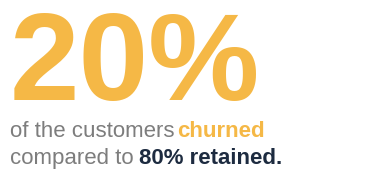

In [367]:
# Define colors
muted_yellow = custom_palette['muted_yellow']
dark_navy = custom_palette['dark_navy']
gray_color = '#7D7D7D'

# Create figure and axis
fig, ax = plt.subplots(figsize=(4, 2))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.axis('off')

# Add big 20%
ax.text(0, 0.7, "20%", fontsize=90, color=muted_yellow,
        fontweight='bold', ha='left', va='center')

# Starting positions
start_x = 0
start_y = 0.3

# Create a renderer to measure text widths
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

# --- Line 1: "of the customers" + "churned"
text1 = ax.text(start_x, start_y, "of the customers ", fontsize=16, color=gray_color,
                ha='left', va='center')

bbox1 = text1.get_window_extent(renderer=renderer).transformed(ax.transData.inverted())
width1 = bbox1.width

text2 = ax.text(start_x + width1-0.1, start_y, "churned", fontsize=16, color=muted_yellow,
                fontweight='bold', ha='left', va='center')

# --- Line 2: "compared to" + "80% retained"
text3 = ax.text(start_x, start_y-0.17, "compared to ", fontsize=16, color=gray_color,
                ha='left', va='center')

bbox3 = text3.get_window_extent(renderer=renderer).transformed(ax.transData.inverted())
width3 = bbox3.width

text4 = ax.text(start_x + width3-0.07, start_y-0.17, "80% retained.", fontsize=16, color=dark_navy,
                fontweight='bold', ha='left', va='center')

plt.tight_layout()
plt.show()

## 3.1 Summary Statistics - Numerical, Categorical and Timestamp features


Understanding the central tendencies, variability, and distribution of the features provides foundational insight into the dataset. This section summarizes the descriptive statistics across numerical, categorical, and timestamp variables.

---

#### Numerical Features

The dataset contains a range of numerical variables that describe customer demographics, financial behavior, digital engagement, and customer service activity.

| Feature | Summary |
|--------|---------|
| **Age** | The average age of customers is approximately 43 years, with a fairly wide spread (standard deviation of 15.2). The age distribution ranges from 18 to 69, indicating a diverse customer base. |
| **TotalSpent** | On average, customers have spent about 1,267 dollars, with values ranging from as low as 9.8 to over 3,386. There’s notable variability here (std ≈ 739), suggesting a mix of light and heavy spenders. |
| **AvgSpent** | The average transaction value is around 249 dollars. The relatively smaller standard deviation (≈ 79) compared to `TotalSpent` implies more consistent behavior per transaction. |
| **NumTransactions** | Customers have made approximately 5 transactions on average, with the majority falling between 3 and 7. |
| **LoginFrequency** | Login activity is fairly active, with an average of ~26 logins and a maximum of 49, suggesting strong digital engagement among some users. |
| **NumComplaints, UnresolvedComplaints, ResolvedComplaints** | Most customers have no complaints on record (median = 0), but some have up to 2. The mean number of unresolved complaints is low (0.18), indicating a generally well-managed service system. |
| **InteractionSpanDays** and **InteractionFrequency** | These metrics show high variation. Many customers have 0 recorded span or frequency (likely those who never interacted with service), but the range extends to 338 days and up to 1 interaction per month. |

---

#### Categorical Features

The dataset includes several categorical variables describing demographic attributes, customer behavior, and churn outcome.

| Feature | Summary |
|--------|---------|
| **Gender** | The customer base is evenly split, with females (F) slightly higher at 51.3%. |
| **MaritalStatus** | The most common status is **Widowed** (27.6%), followed by other categories, indicating a mix of life stages. |
| **IncomeLevel** | A plurality of customers fall into the **High** income category (34.9%), which could correlate with spending or churn behavior. |
| **ServiceUsage** | **Online Banking** is the most common usage type (34.9%), confirming a strong digital adoption among users. |
| **HadComplaint** and **HasUnresolvedComplaint** | Most customers have not made a complaint (70.3%), and an even greater proportion (83.2%) have no unresolved issues. |
| **MultipleInteractionTypes** | Only 21.5% of customers experienced more than one type of interaction, possibly indicating limited complexity in service engagement. |
| **HadInteraction** | Around 66.8% of customers had some form of interaction, while the remaining 33.2% never reached out to customer service. This aligns with the earlier observation of missing interaction fields. |
| **ChurnStatus** | The dataset is imbalanced, with 796 non-churned (79.6%) and 204 churned customers (20.4%). This will need to be addressed during modeling. |

---

#### Timestamp Features

The time-based features capture user lifecycle and engagement moments:

| Feature | Summary |
|--------|---------|
| **FirstPurchase** and **LastPurchase** | Purchases occurred throughout 2022, with the most frequent dates being early (Jan 11) and late (Dec 15) in the year. This provides a full-year transaction window for analysis. |
| **FirstInteraction** and **LastInteraction** | About 332 customers have placeholder timestamps (1970-01-01), confirming they never interacted with customer service. For the rest, interaction spans up to late December 2022. |
| **LastLoginDate** | Login dates span the entire 2023 calendar year, with some peaks in November. This is valuable for understanding recent engagement and identifying at-risk users. |

---

These summary statistics provide a comprehensive overview of customer behavior and set the foundation for deeper exploration. The variability across spending, service interactions, and digital usage will be crucial in uncovering drivers of churn in the next phases of analysis.

> 🔎 **Insight: Low Transaction and Login Frequency Suggest Limited User Engagement**
>
> Two features stand out in the summary statistics:
>
> - **`NumTransactions`** has a **maximum of just 9** per customer in a whole year — that’s less than one transaction per month.
- **`LoginFrequency`** has a **maximum of 49** and an **average of ~26** — again suggesting users are logging in **only once or twice a month**, on average.
>
> #### Possible Interpretation:
>
> - These two low-frequency metrics **corroborate each other**, pointing to overall **limited digital engagement** or **low product usage**.
- Given the three service usage platforms (Online Banking, Mobile App, Website), it's reasonable to assume that:
  - **`LoginFrequency`** likely tracks the **number of times a user accessed their account across any channel**, not just website logins.
  - Yet, even with this broader definition, the engagement remains **surprisingly low**, especially for a full-year dataset.
>
> #### Broader Implications:
>
> - This might **signal deeper user behavior issues** tied to **customer satisfaction**, **feature relevance**, or **trust**.
- It could also indicate **churn drivers beyond the scope** of the current data — such as:
  - Competition from other banks or fintechs;
  - Poor user experience or outdated features;
  - Unrecorded activity (e.g., joint accounts, proxy banking, or cash-heavy preferences)
>
> #### Hypothesis:
>
> These patterns may support a **hypothesis** that **low digital engagement is a key churn driver**, but **external or latent factors** not present in this dataset could be influencing the behavior — and the churn.








In [368]:
# Grouping feature types
numerical_cols = ['Age', 'TotalSpent', 'AvgSpent', 'NumTransactions',
                  'LoginFrequency', 'NumComplaints', 'UnresolvedComplaints',
                  'ResolvedComplaints', 'InteractionSpanDays', 'InteractionFrequency']

categorical_cols = ['Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage',
                    'HadComplaint', 'HasUnresolvedComplaint', 'HadInteraction',
                    'MultipleInteractionTypes', 'ChurnStatus']

timestamp_cols = ['FirstPurchase', 'LastPurchase', 'FirstInteraction', 'LastInteraction', 'LastLoginDate']

In [369]:
df[numerical_cols].describe().T

count        mean         std   min      25%       50%  \
Age                   1000.0    43.26700   15.242311  18.0   30.000    43.000   
TotalSpent            1000.0  1267.07495  738.590013   9.8  626.685  1232.880   
AvgSpent              1000.0   248.80643   79.372717   9.8  203.730   250.125   
NumTransactions       1000.0     5.05400    2.603433   1.0    3.000     5.000   
LoginFrequency        1000.0    25.91200   14.055953   1.0   13.750    27.000   
NumComplaints         1000.0     0.33500    0.546877   0.0    0.000     0.000   
UnresolvedComplaints  1000.0     0.17900    0.411252   0.0    0.000     0.000   
ResolvedComplaints    1000.0     0.15600    0.384463   0.0    0.000     0.000   
InteractionSpanDays   1000.0    37.90600   70.438773   0.0    0.000     0.000   
InteractionFrequency  1000.0     0.33400    0.471876   0.0    0.000     0.000   

                            75%      max  
Age                     56.0000    69.00  
TotalSpent            1791.9025  3386.04  
AvgSpent               295.0225   496.99  
NumTransactions          7.0000     9.00  
LoginFrequency          38.0000    49.00  
NumComplaints            1.0000     2.00  
UnresolvedComplaints     0.0000     2.00  
ResolvedComplaints       0.0000     2.00  
InteractionSpanDays     46.0000   338.00  
InteractionFrequency     1.0000     1.00

In [370]:
# Custom function  for summary statistics of categorical features
def describe_categoricals(df, categorical_cols):
    """
    Custom description for categorical columns (both object and int types).

    Returns:
    A summary DataFrame with count, unique, top, and freq.
    """
    summary = {}

    for col in categorical_cols:
        value_counts = df[col].value_counts(dropna=False)
        top_value = value_counts.index[0]
        freq = value_counts.iloc[0]

        summary[col] = {
            'Count': df[col].count(),
            'Unique': df[col].nunique(dropna=False),
            'Top': top_value,
            'Freq': freq
        }

    return pd.DataFrame(summary).T

describe_categoricals(df, categorical_cols)

Count Unique             Top Freq
Gender                    1000      2               F  513
MaritalStatus             1000      4         Widowed  276
IncomeLevel               1000      3            High  349
ServiceUsage              1000      3  Online Banking  349
HadComplaint              1000      2           False  703
HasUnresolvedComplaint    1000      2           False  832
HadInteraction            1000      2            True  668
MultipleInteractionTypes  1000      2           False  785
ChurnStatus               1000      2               0  796

In [371]:
# Custom function for summary statistics on datetime
def describe_timestamps(df, timestamp_cols):
    """
    Custom summary for datetime/timestamp columns.

    Returns:
    A DataFrame with count, min, max, top, and freq.
    """
    summary = {}

    for col in timestamp_cols:
        if not pd.api.types.is_datetime64_any_dtype(df[col]):
            continue  # skip non-datetime columns

        value_counts = df[col].value_counts(dropna=False)
        top_value = value_counts.index[0]
        freq = value_counts.iloc[0]

        summary[col] = {
            'Count': df[col].count(),
            'Min': df[col].min(),
            'Max': df[col].max(),
            'Top': top_value,
            'Freq': freq
        }

    return pd.DataFrame(summary).T

describe_timestamps(df, timestamp_cols)

Count                  Min                  Max  \
FirstPurchase     1000  2022-01-01 00:00:00  2022-12-30 00:00:00   
LastPurchase      1000  2022-01-10 00:00:00  2022-12-31 00:00:00   
FirstInteraction  1000  1970-01-01 00:00:00  2022-12-30 00:00:00   
LastInteraction   1000  1970-01-01 00:00:00  2022-12-30 00:00:00   
LastLoginDate     1000  2023-01-01 00:00:00  2023-12-31 00:00:00   

                                  Top Freq  
FirstPurchase     2022-01-11 00:00:00   17  
LastPurchase      2022-12-15 00:00:00   18  
FirstInteraction  1970-01-01 00:00:00  332  
LastInteraction   1970-01-01 00:00:00  332  
LastLoginDate     2023-11-22 00:00:00    8

## 3.2 Feature Distribution - Histogram and Boxplot

To better understand the underlying structure and behavior of key numerical features in the dataset, I visualized their distributions using histograms and boxplots. This helped uncover data patterns, skewness, and potential outliers. Here's a summary of my observations:

#### 📊 Age  
- **Distribution**: Approximately uniform across the age range (18 - 69).  
- **Boxplot**: No visible outliers; both whiskers are evenly distributed, suggesting a balanced age spread.  
- **Interpretation**: The customer base spans a wide age range, with a mean age of 43.27 and no significant concentration in any age group. This indicates a well-distributed demographic reach.

#### 💰 TotalSpent  
- **Distribution**: Slightly right-skewed, indicating a concentration of users spending below the mean.  
- **Boxplot**: No visible outliers; the right whisker is more than twice as long as the left.  
- **Interpretation**: While most customers spend moderately, a small group contributes significantly higher amounts, pulling the distribution to the right.

#### 💳 AvgSpent  
- **Distribution**: Approximately normally distributed, forming a bell-curve shape.  
- **Boxplot**: Visible outliers present, with balanced whiskers.  
- **Interpretation**: The average spending per transaction is \$248.81, with most users spending consistently. However, the presence of outliers indicates that some users spend significantly more or less, which could reflect differing usage patterns or customer behaviors.

#### 🔁 NumTransactions  
- **Distribution**: Discrete and evenly spread across bins.  
- **Boxplot**: No visible outliers; symmetrical whiskers.  
- **Interpretation**: Transaction activity appears fairly uniform, with no significant anomalies.

#### 🔐 LoginFrequency  
- **Distribution**: Discrete and fairly uniform, mirroring the transaction count pattern.  
- **Boxplot**: No visible outliers; both whiskers are evenly distributed.  
- **Interpretation**: The mean login frequency is 25.91 logins per user, indicating that users log in roughly twice a month. This relatively low engagement could suggest that users are not fully utilizing all the available online banking services or may prefer offline channels.

#### 📞 NumComplaints  
- **Distribution**: Right-skewed, with a secondary peak at 1.00.  
- **Boxplot**: No outliers; only the right whisker is visible.  
- **Interpretation**: With a mean of 0.34 complaints per user, most customers don’t raise issues. However, the small number of customers with one or more complaints might indicate areas where customer service could be improved.

#### ❗ UnresolvedComplaints  
- **Distribution**: Right-skewed, with a second peak at 1.00.  
- **Boxplot**: Visible outliers; boxplot compressed to the left side.  
- **Interpretation**: The majority of users (mean = 0.18 unresolved complaints) don’t have unresolved issues, but the few who do may require attention. The skewed distribution suggests that issues tend to be concentrated among a smaller segment of the customer base.

#### ✅ ResolvedComplaints  
- **Distribution**: Right-skewed, with a second peak at 1.00.  
- **Boxplot**: Visible outliers; boxplot compressed to the left side.  
- **Interpretation**: Similar to unresolved complaints, most users (mean = 0.16 resolved complaints) did not have issues needing resolution. The compressed nature of the boxplot suggests that resolved complaints are relatively rare across the dataset.

#### ⏳ InteractionSpanDays  
- **Distribution**: Highly right-skewed, with a few users having very high interaction spans.  
- **Boxplot**: Visible outliers, with only the right whisker being visible.  
- **Interpretation**: The mean interaction span is 37.91 days, but there is significant variability, as seen from the long right whisker and the few outliers with extremely high values. This suggests that while many users have limited engagement with the platform, a small group remains highly engaged over long periods.

#### 📈 InteractionFrequency  
- **Distribution**: Noticeably right-skewed, with peaks at 0 and 1.  
- **Boxplot**: No visible outliers; balanced whiskers.  
- **Interpretation**: The mean interaction frequency is 0.33, meaning that most users either rarely interact or interact only once. The skewness towards 0 suggests a low level of engagement overall, with a few users maintaining a higher level of interaction.



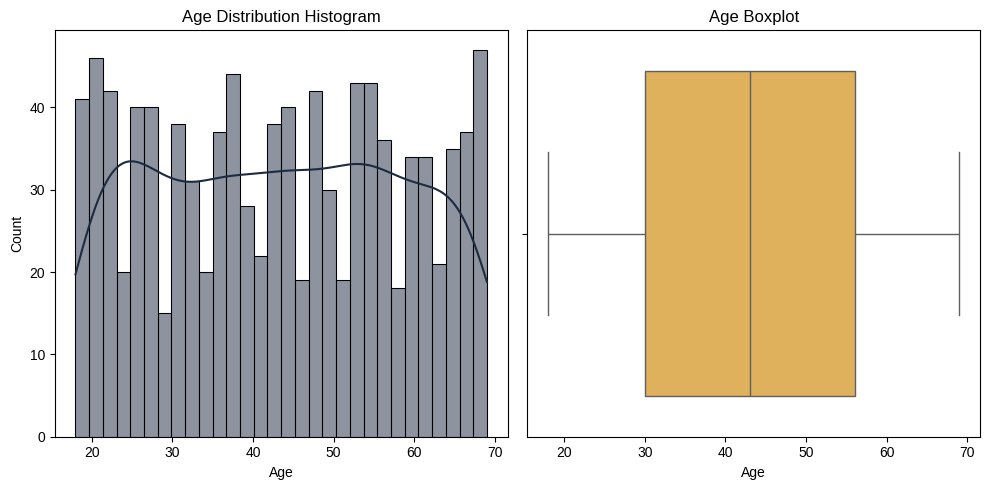

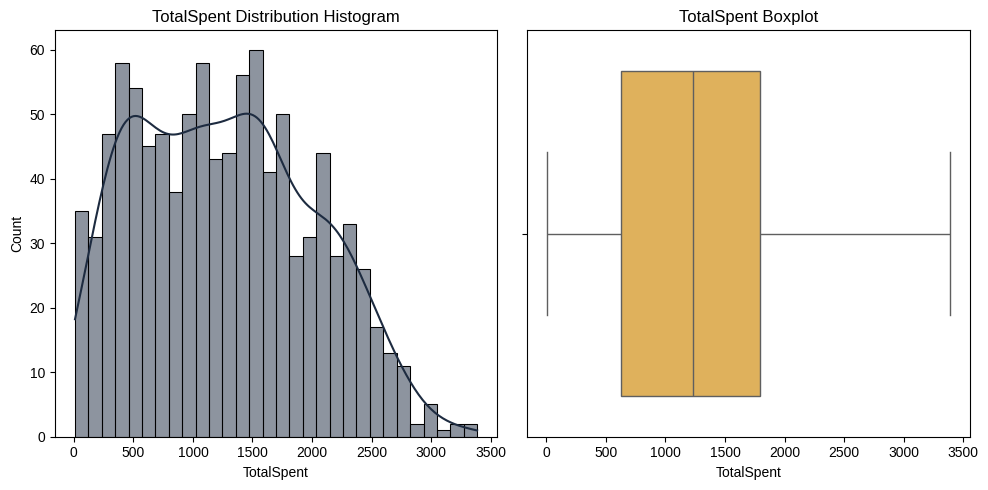

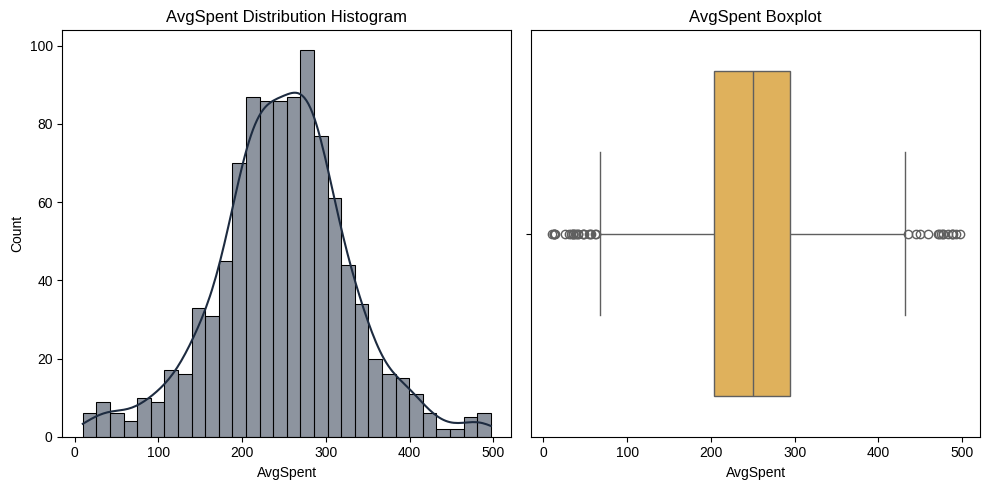

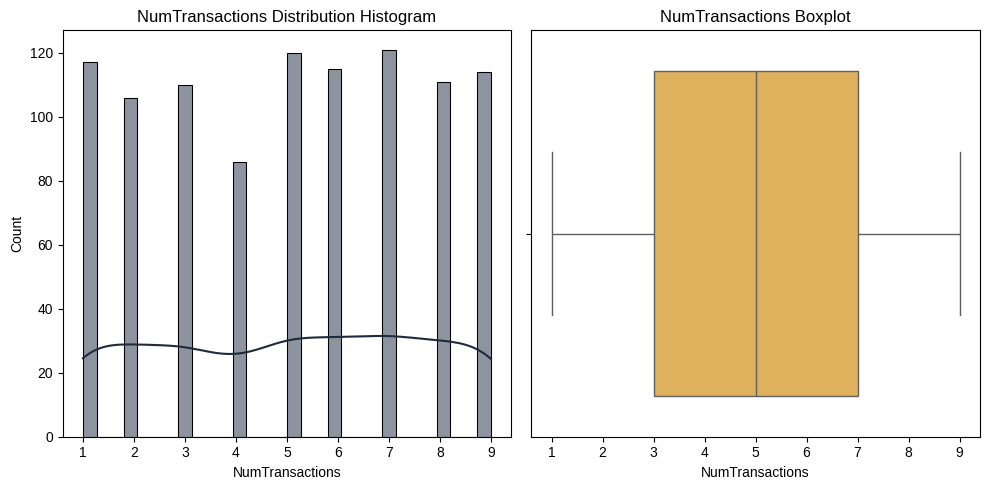

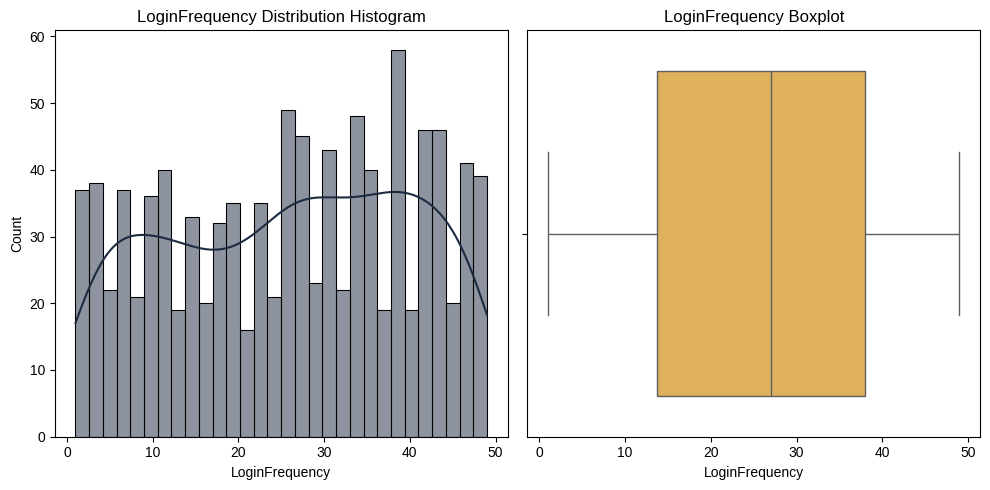

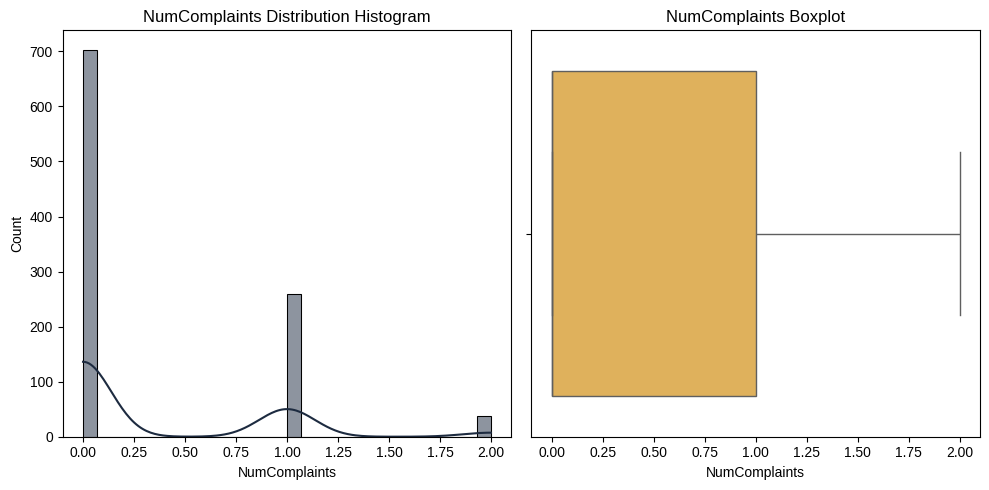

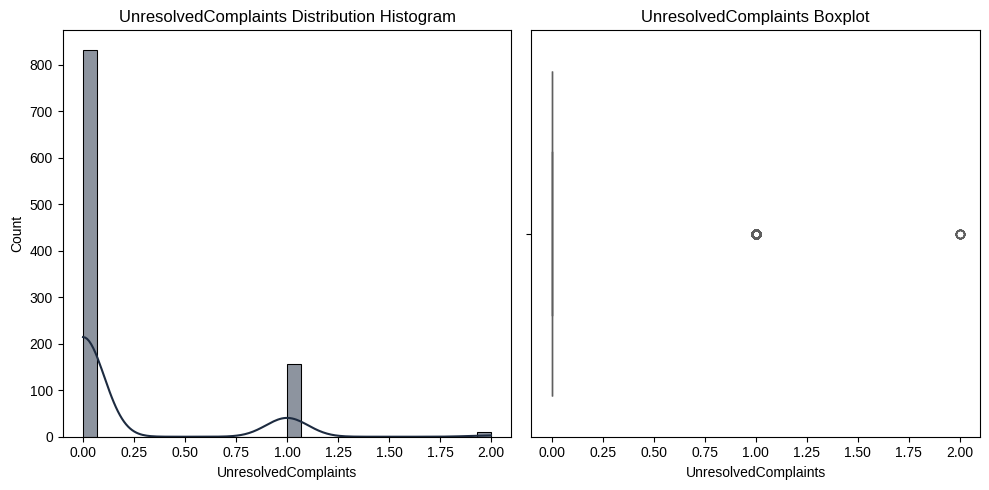

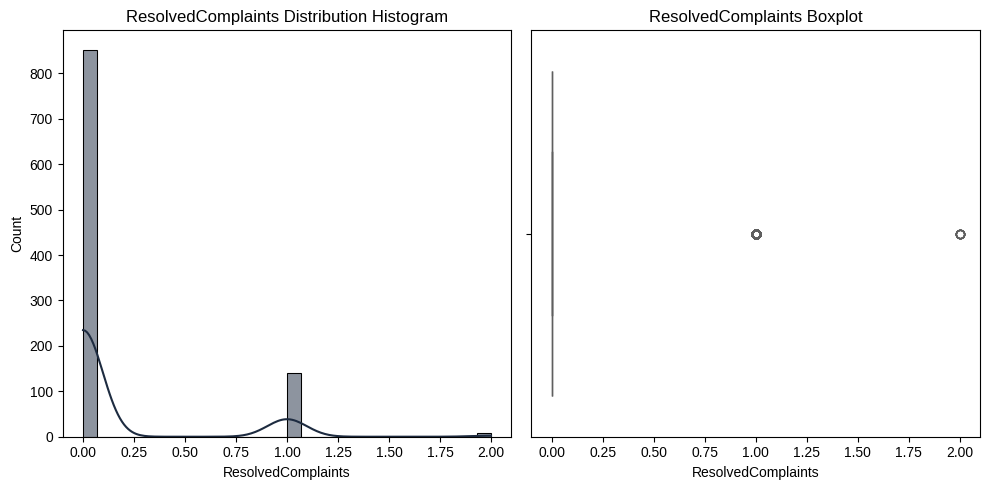

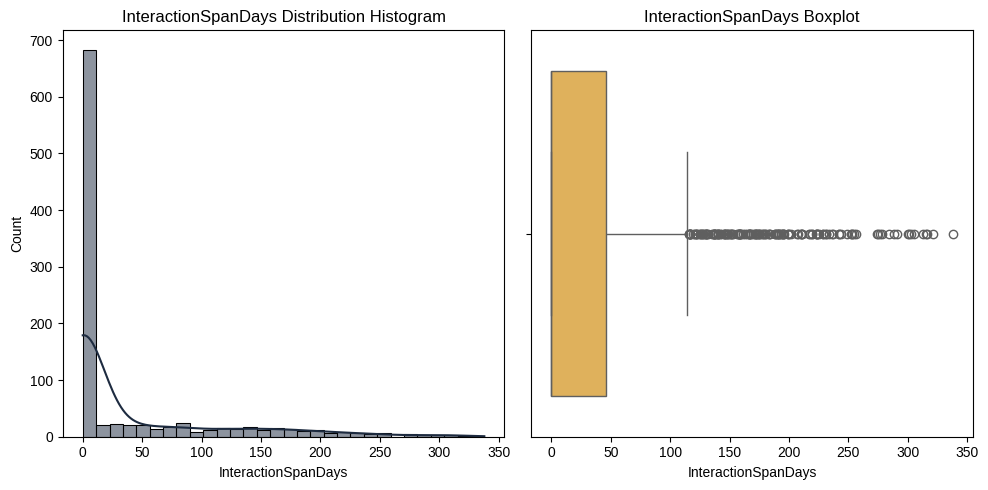

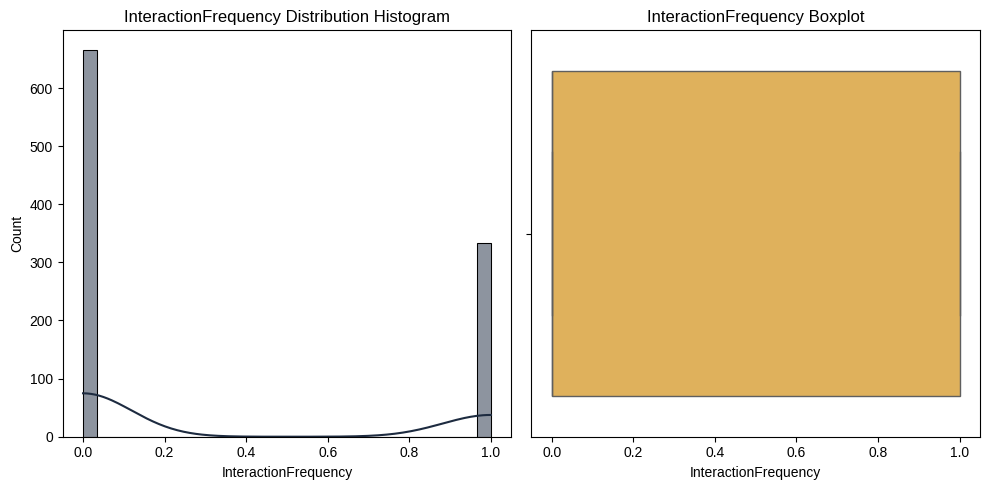

In [372]:
# Visualizing the distribution of numerical features
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram with dark navy
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[0], color=custom_palette['dark_navy'])
    axes[0].set_title(f'{col} Distribution Histogram')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Boxplot with teal green
    sns.boxplot(data=df, x=col, ax=axes[1], color=custom_palette['muted_yellow'])
    axes[1].set_title(f'{col} Boxplot')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

In [373]:
df[numerical_cols].var().round(3).to_frame('Variance')

Variance
Age                      232.328
TotalSpent            545515.207
AvgSpent                6300.028
NumTransactions            6.778
LoginFrequency           197.570
NumComplaints              0.299
UnresolvedComplaints       0.169
ResolvedComplaints         0.148
InteractionSpanDays     4961.621
InteractionFrequency       0.223

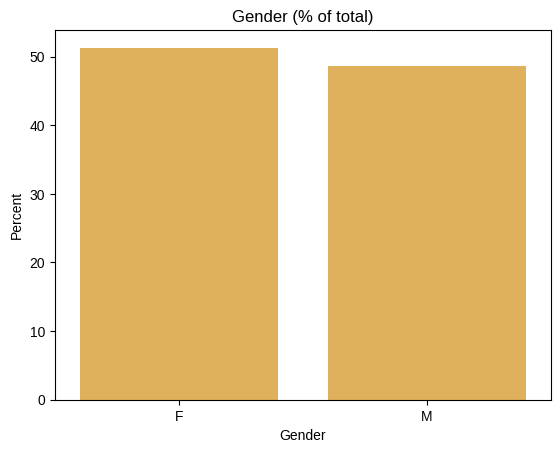

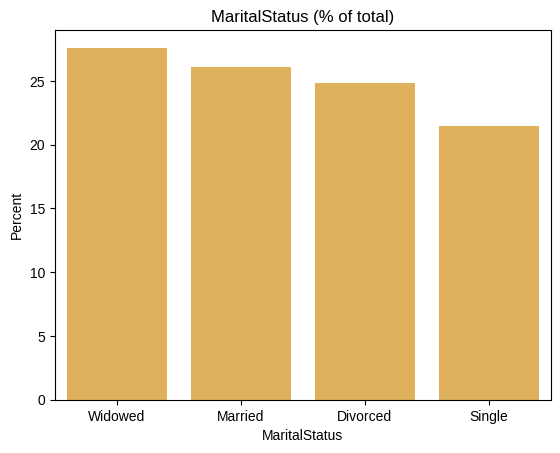

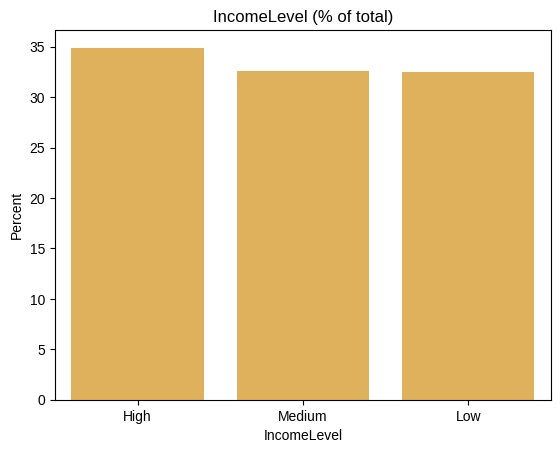

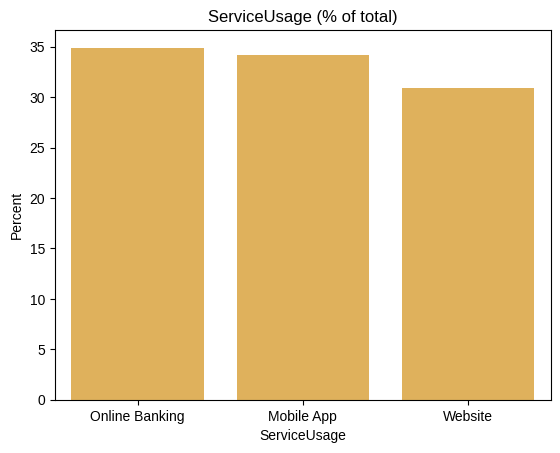

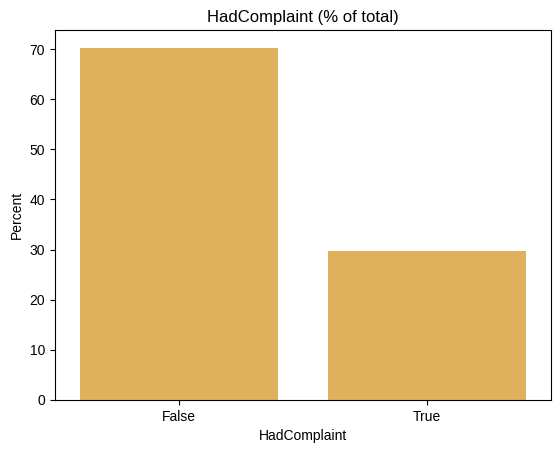

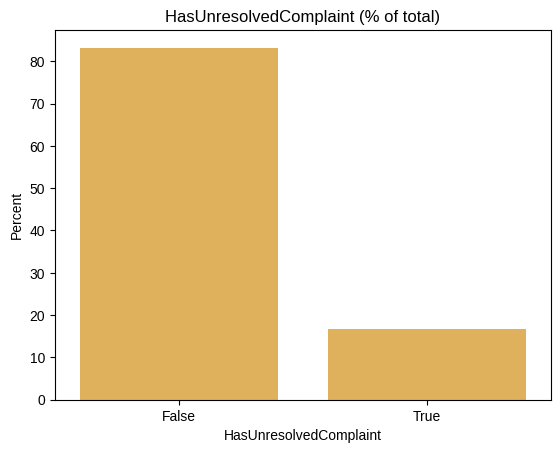

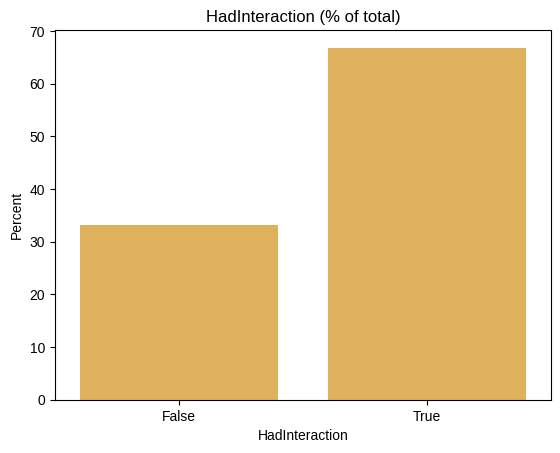

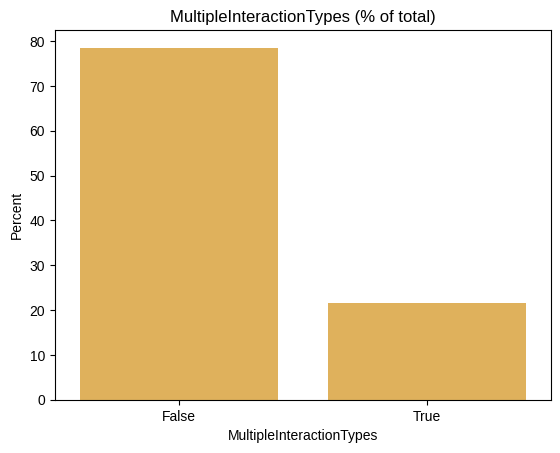

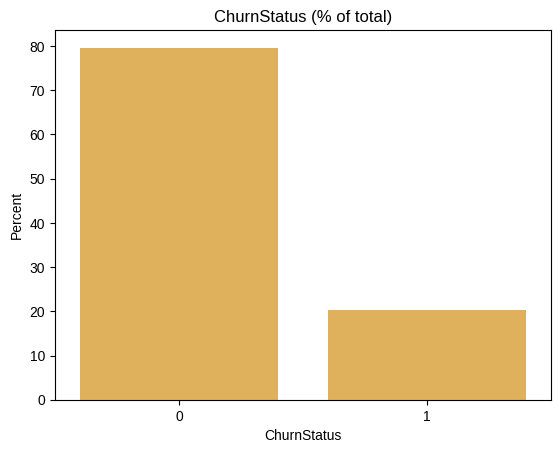

In [374]:
# Visualizing the distribution of categorical features
for col in categorical_cols:
    counts = df[col].value_counts(normalize=True)*100
    sns.barplot(x=counts.index, y=counts.values, color=custom_palette['muted_yellow'])
    plt.title(f'{col} (% of total)')
    plt.ylabel('Percent')
    plt.show()

## 3.3 Bivariate Analysis

In this section, I will explore the relationships between two variables, each variable and churn to uncover any patterns, correlations, or potential dependencies. This analysis will help identify features that might be strong predictors of churn.

### 3.3.1 Exploring Relationships between Numerical features and Churn

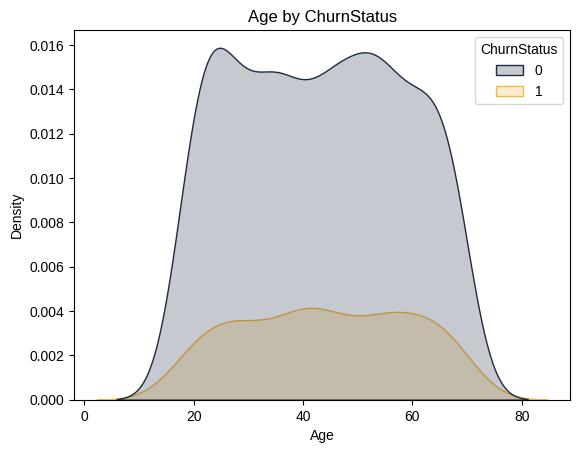

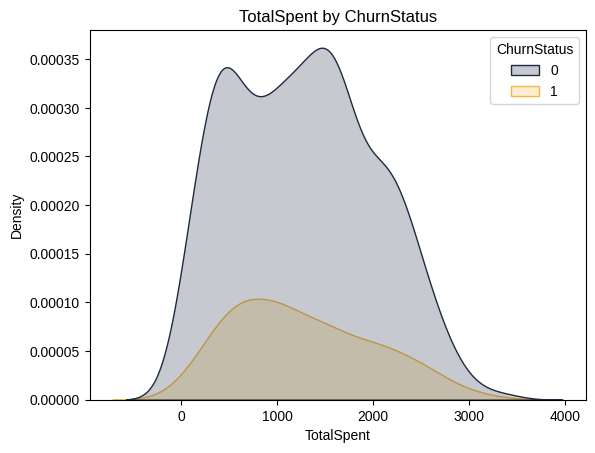

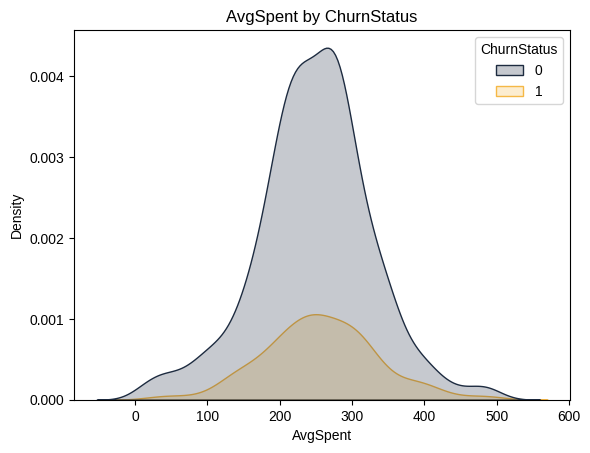

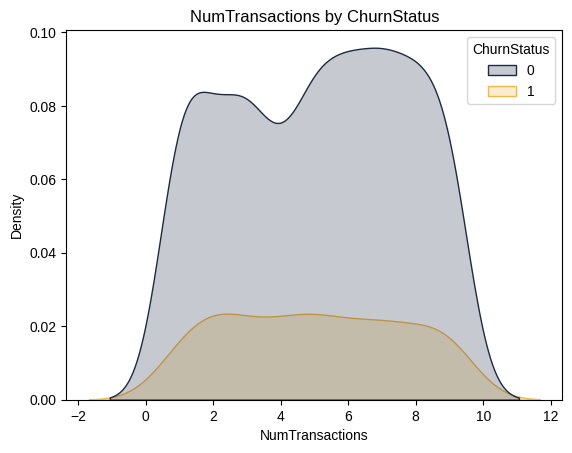

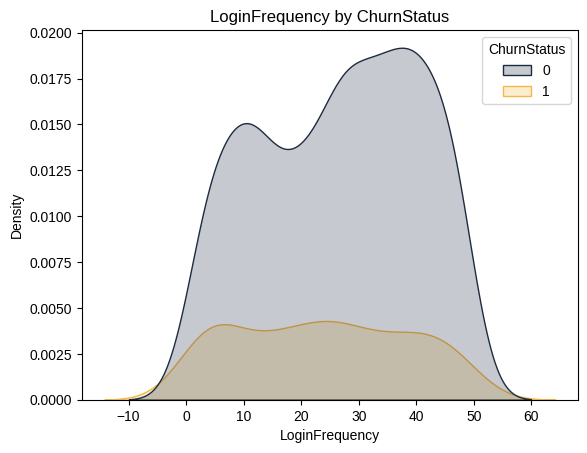

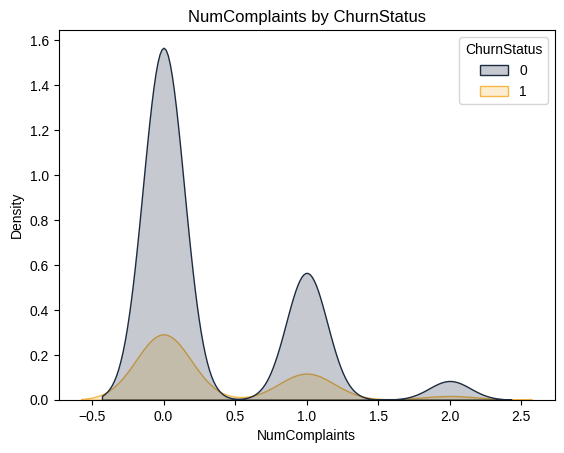

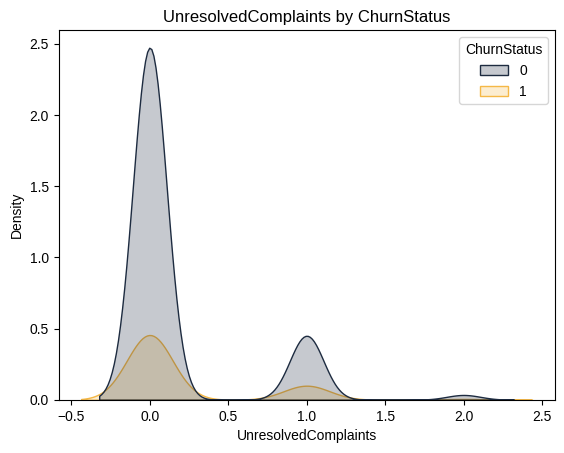

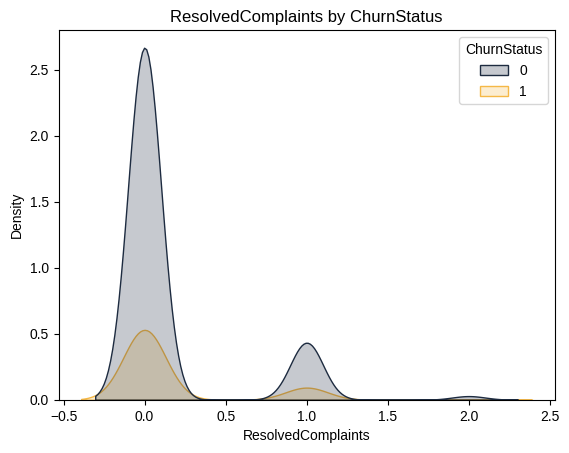

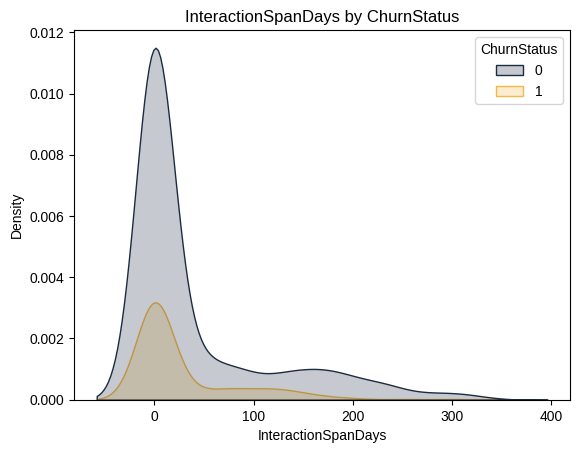

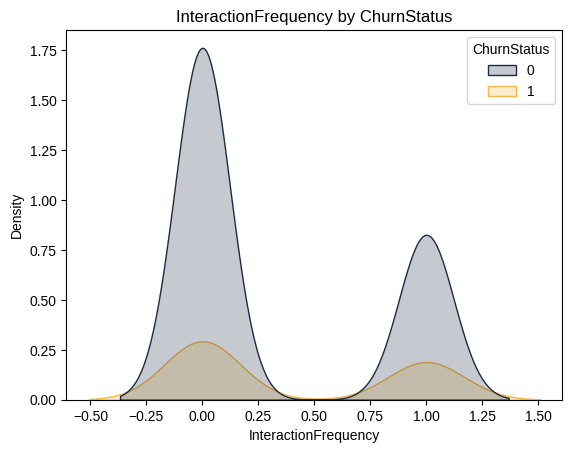

In [375]:
# Numerical features vs. Churn
for col in numerical_cols:
    sns.kdeplot(data=df, x=col, hue='ChurnStatus', fill=True,
                palette=[custom_palette['dark_navy'], custom_palette['muted_yellow']])
    plt.title(f'{col} by ChurnStatus')
    plt.show()

**KDE Plots Interpretation**

Here’s what these KDE plots tell us about how each numerical feature relates to churn (where blue = retained, orange = churned):

---

**1. AmountSpent by ChurnStatus**

- **Overall shape**: Both groups span roughly £0–£500 per transaction, but the retained customers (blue) have a much higher density across the entire range.
- **Churners spend less**: The orange curve sits consistently below the blue one, indicating that churned customers tend to spend less per transaction on average.
- **Relative peaks**: Retained customers show multiple modes (around £150, £300, and £450), whereas churners’ spending is more uniformly low—no strong high‑spend peaks.

> **Interpretation:** Higher transaction values are associated with retention. Low spenders are at elevated churn risk. You might engineer a “low‑spender” flag or log‑transform and bin spending to capture this effect.

---

**2. Age by ChurnStatus**

- **Distribution span**: Both retained and churned cover the full age range (18–69), but the density for retained customers is much higher throughout.
- **Churn concentration**: The churn curve (orange) is relatively flatter and lower, but you can see slight bulges around the mid‑20s and again around the mid‑50s.
- **Younger & older at risk?** The modest upticks in churn density around ~25 and ~55 could signal that very young professionals and older customers churn a bit more often.

> **Interpretation:** Age is somewhat predictive: mid‑range (30–50) customers appear stickier, while the youngest and oldest brackets may need targeted retention offers.

---

**3. LoginFrequency by ChurnStatus**

- **Engagement gap**: Retained users (blue) show strong density from 10 to 50 logins, peaking around 35–40 logins. Churned users (orange) are concentrated at much lower frequencies (~5–25).
- **Low‑login risk**: The churn curve rises quickly at the low end (<15 logins) and then falls off, indicating that infrequent logins strongly correlate with churn.
- **High‑login retention**: Very frequent logins (>40) are almost exclusively in the retained group.

> **Interpretation:** Login frequency is a powerful engagement signal. Consider creating engagement tiers (e.g., low <15, medium 15–35, high >35) to capture churn risk and drive intervention rules.


#### 3.3.1.1 Statistical Test of Significance between Means of Numerical Features and Churned vs. Retained Customers

To explore whether there are statistically significant differences in customer behavior based on churn status, I conducted a **Mann-Whitney U test**. This non-parametric test is suitable when comparing two independent groups — in this case, churned vs. retained customers — especially when the assumptions of normality may not hold.

#### Why Mann-Whitney U?
- It does not assume a normal distribution of the data.
- It compares the distributions of two independent groups.
- It is robust to outliers and skewed distributions, which were observed in several features.

> #### Hypotheses for each test:
> - **Null (H₀):** There is no significant difference in the distribution of this feature between churned and retained customers.
- **Alternative (H₁):** There is a significant difference in the distribution of this feature between churned and retained customers.

The resulting p-values determined whether we reject the null hypothesis at a significance level of 0.05.

---

#####🧾 Result Takeaways:
- Most features showed no statistically significant difference in distribution between churned and retained customers.

- However, `LoginFrequency` and `InteractionFrequency` displayed statistically significant differences (p < 0.05), suggesting they may be important behavioral indicators of churn.



In [376]:
# Mann-Whitney U statistical testing
for col in numerical_cols:
    stat, p = mannwhitneyu(df[df['ChurnStatus'] == 0][col],
                           df[df['ChurnStatus'] == 1][col])

    print(f'{col}')
    print(f'Mann–Whitney U statistic = {stat:.2f}, p-value = {p:.4f}')

    if p < 0.05:
        print("✅ Statistically significant difference between churned and retained customers.")
    else:
        print("❌ No statistically significant difference between churned and retained customers.")
    print()

Age
Mann–Whitney U statistic = 77728.00, p-value = 0.3466
❌ No statistically significant difference between churned and retained customers.

TotalSpent
Mann–Whitney U statistic = 81440.00, p-value = 0.9464
❌ No statistically significant difference between churned and retained customers.

AvgSpent
Mann–Whitney U statistic = 76858.50, p-value = 0.2391
❌ No statistically significant difference between churned and retained customers.

NumTransactions
Mann–Whitney U statistic = 82211.50, p-value = 0.7805
❌ No statistically significant difference between churned and retained customers.

LoginFrequency
Mann–Whitney U statistic = 90580.00, p-value = 0.0107
✅ Statistically significant difference between churned and retained customers.

NumComplaints
Mann–Whitney U statistic = 79514.00, p-value = 0.5674
❌ No statistically significant difference between churned and retained customers.

UnresolvedComplaints
Mann–Whitney U statistic = 79369.00, p-value = 0.4449
❌ No statistically significant differ

### 3.3.2 Exploring Relationships between Categorical and Churn

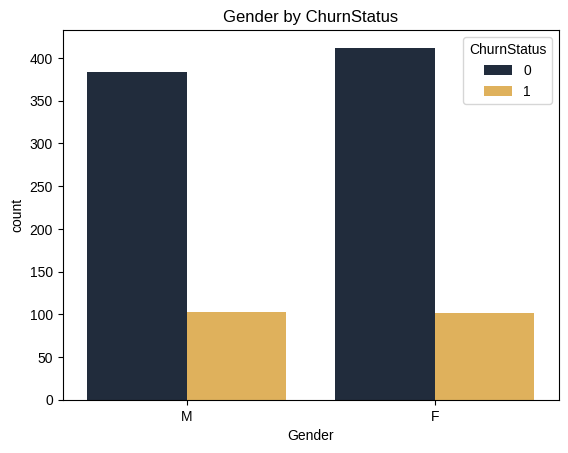

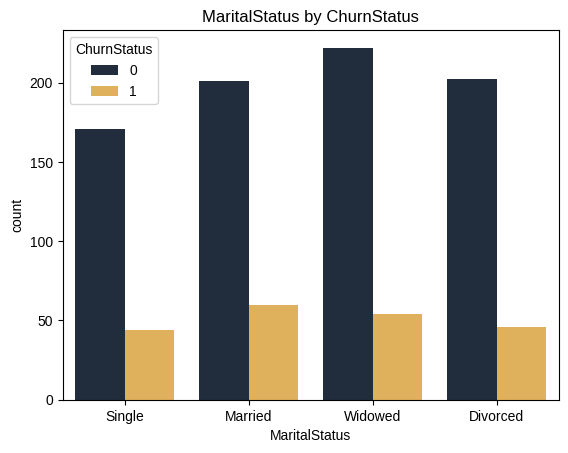

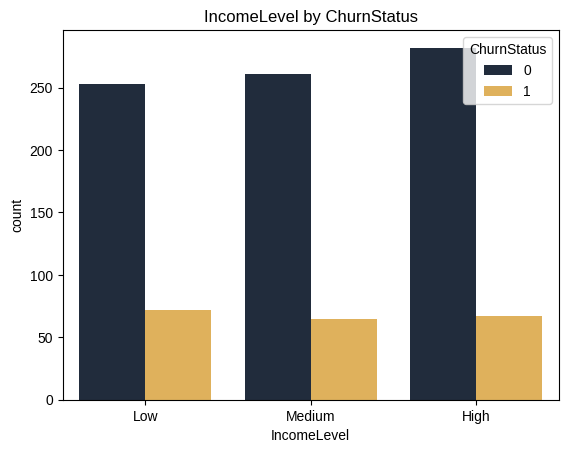

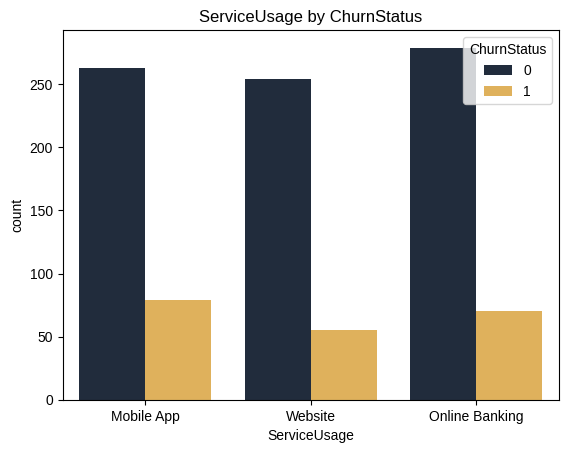

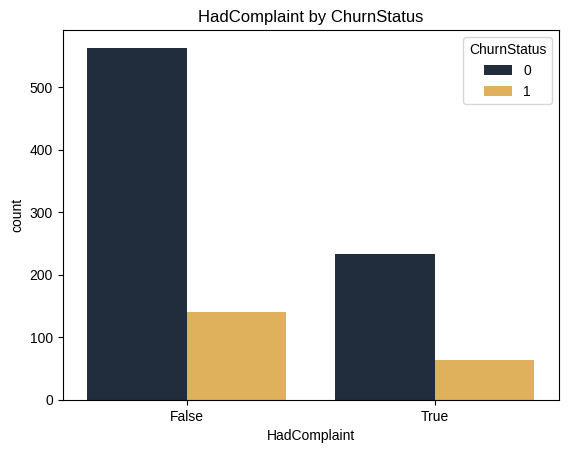

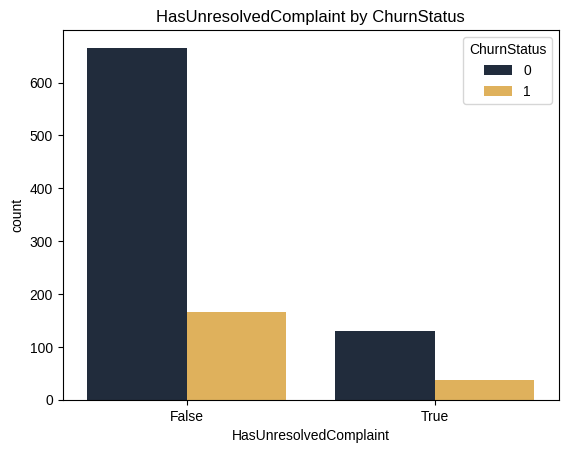

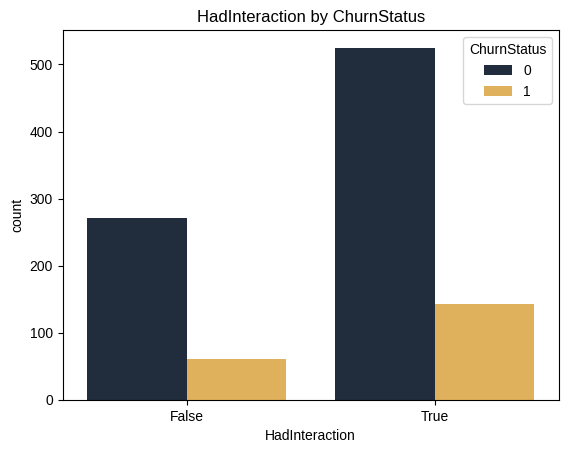

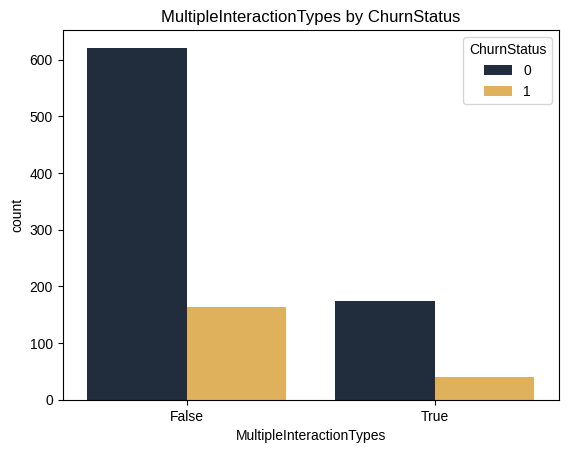

In [377]:
# Grouped bar chart of categorical feature by churned and retained customers
for col in categorical_cols:
    if col != 'ChurnStatus':
        sns.countplot(data=df, x=col, hue='ChurnStatus',
                        palette=[custom_palette['dark_navy'], custom_palette['muted_yellow']])
        plt.title(f'{col} by ChurnStatus')
        plt.show()

#### 3.3.2.1 Statistical Testing for Association Between Categorical Features and Churned vs. Retained Customers

To assess whether there's a statistically significant association between categorical features and churn status, I performed a **Chi-Square Test of Independence**. This test helps determine whether distributions of categorical variables differ across churned and retained groups.

#### Why Chi-Square?
- It’s designed for testing relationships between **two categorical variables**.
- It does **not assume a normal distribution**.
- It’s ideal for evaluating **whether churn is associated** with specific categories (e.g. Gender, MaritalStatus, etc.).

> #### Hypotheses for each test:
- **Null (H₀):** There is no association between the categorical feature and churn status.
- **Alternative (H₁):** There is a significant association between the categorical feature and churn status.

The **p-values** from the test results guided the rejection or retention of the null hypothesis using a 0.05 significance threshold.

---

#### 🧾 Result Takeaways:

All categorical features showed **no significant association** with churn status, suggesting that demographics and binary service usage flags may not strongly influence customer retention.


In [378]:
# Run the chi-square test
for col in categorical_cols:
    if col != 'ChurnStatus':
        contingency_table = pd.crosstab(df[col], df['ChurnStatus'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f'Chi-square statistic = {chi2:.2f}, p-value = {p:.4f}')

        if p < 0.05:
            print(f"✅ There is a significant association between {col} and churn status.")
        else:
            print(f"❌ There is no significant association between {col} and churn status.")

        print()

Chi-square statistic = 0.24, p-value = 0.6207
❌ There is no significant association between Gender and churn status.

Chi-square statistic = 1.72, p-value = 0.6326
❌ There is no significant association between MaritalStatus and churn status.

Chi-square statistic = 0.97, p-value = 0.6160
❌ There is no significant association between IncomeLevel and churn status.

Chi-square statistic = 2.85, p-value = 0.2409
❌ There is no significant association between ServiceUsage and churn status.

Chi-square statistic = 0.25, p-value = 0.6170
❌ There is no significant association between HadComplaint and churn status.

Chi-square statistic = 0.46, p-value = 0.4981
❌ There is no significant association between HasUnresolvedComplaint and churn status.

Chi-square statistic = 1.08, p-value = 0.2994
❌ There is no significant association between HadInteraction and churn status.

Chi-square statistic = 0.41, p-value = 0.5210
❌ There is no significant association between MultipleInteractionTypes and churn

### 3.3.3 Correlation Analysis of Numerical Variables

In this section, I explored how features relate to one another, with a focus on identifying meaningful relationships that could inform churn prediction or customer behavior. Below are the key highlights from the correlation matrix.

---

#### 🔗 Age  
- **Correlation with other features**: Very weak relationships with all variables.  
- **Strongest correlation**: Slight negative correlation with *UnresolvedComplaints* (-0.06) and *LoginFrequency* (-0.02).  
- **Interpretation**: Age doesn’t seem to play a major role in driving other behaviors. The bank’s services appear to be age-neutral.

---

#### 💰 TotalSpent  
- **Strong positive correlation** with *NumTransactions* (**0.90**) and *AvgSpent* (0.38).  
- **Interpretation**: The more transactions a customer makes, the more they spend overall — as expected. However, AvgSpent isn’t as tightly linked, suggesting individual transaction value varies.

---

#### 💳 AvgSpent  
- **Moderate correlation** with *InteractionFrequency* (0.07) and *TotalSpent* (0.38).  
- **Interpretation**: Customers who interact more frequently might spend slightly more per transaction, but this isn’t a dominant pattern.

---

#### 🔁 NumTransactions  
- **Strong correlation** with *TotalSpent* (**0.90**)  
- **Very weak/no correlation** with *ChurnStatus* (-0.01) and *InteractionFrequency* (≈0).  
- **Interpretation**: Number of transactions is a key contributor to total spend, but doesn’t directly correlate with churn in this dataset.

---

#### 📥 LoginFrequency  
- **Weak negative correlation** with *ChurnStatus* (**-0.08**)  
- **Slight positive correlation** with *InteractionFrequency* (0.05)  
- **Interpretation**: Customers who log in more frequently are slightly less likely to churn, suggesting engagement may reduce churn risk.

---

#### 😠 NumComplaints  
- **Strong positive correlation** with *UnresolvedComplaints* (**0.71**) and *ResolvedComplaints* (0.66)  
- **Weak correlation** with *ChurnStatus* (0.02)  
- **Interpretation**: The total number of complaints is a shared driver of both resolved and unresolved counts, but it doesn’t strongly predict churn on its own.

---

#### 🚫 UnresolvedComplaints  
- **Strong correlation** with *NumComplaints* (0.71)  
- **Very weak positive correlation** with *ChurnStatus* (0.02)  
- **Interpretation**: Unresolved issues could slightly contribute to churn, though the correlation is low. Further segmentation may uncover stronger patterns.

---

#### ✅ ResolvedComplaints  
- **Strong correlation** with *NumComplaints* (0.66)  
- **No significant correlation** with *ChurnStatus* (≈0)  
- **Interpretation**: The act of resolving complaints doesn’t correlate with churn—possibly because customers with issues are already dissatisfied.

---

#### ⏳ InteractionSpanDays  
- **Strong negative correlation** with *InteractionFrequency* (**-0.38**)  
- **Weak negative correlation** with *ChurnStatus* (-0.07)  
- **Interpretation**: Customers who interact less frequently tend to have longer gaps between interactions, and this may tie into lower engagement and slightly higher churn.

---

#### 🔁 InteractionFrequency  
- **Negative correlation** with *InteractionSpanDays* (-0.38)  
- **Slight positive correlation** with *ChurnStatus* (0.06)  
- **Interpretation**: While we’d expect higher frequency to reduce churn, the slight positive correlation with churn suggests some users may engage more frequently before leaving (possibly due to unresolved issues or dissatisfaction).

---

#### 📉 ChurnStatus  
- **Most notable correlations**:
  - *LoginFrequency*: **-0.08**
  - *InteractionSpanDays*: -0.07
  - *InteractionFrequency*: 0.06  
- **Interpretation**: Churn shows weak correlations overall, suggesting that no single variable dominates as a churn predictor. However, login behavior and interaction patterns do exhibit mild relationships worth exploring in multivariate models.

In [379]:
# Selecting the desired columns for correlation analysis
cols = numerical_cols + ['ChurnStatus']

# Calculating the correlation matrix
corr_df = df[cols].corr()
corr_df

Age  TotalSpent  AvgSpent  NumTransactions  \
Age                   1.000000    0.010930  0.005202         0.008667   
TotalSpent            0.010930    1.000000  0.384061         0.898256   
AvgSpent              0.005202    0.384061  1.000000         0.046535   
NumTransactions       0.008667    0.898256  0.046535         1.000000   
LoginFrequency       -0.022826    0.012015  0.047182        -0.013985   
NumComplaints        -0.039202    0.058842  0.019477         0.053370   
UnresolvedComplaints -0.060329    0.033764  0.028046         0.021816   
ResolvedComplaints    0.008771    0.047583 -0.002295         0.052580   
InteractionSpanDays   0.012877    0.053674  0.006469         0.040808   
InteractionFrequency -0.011855    0.018760  0.070612        -0.000029   
ChurnStatus           0.029407    0.001324  0.044814        -0.008598   

                      LoginFrequency  NumComplaints  UnresolvedComplaints  \
Age                        -0.022826      -0.039202             -0.060329   
TotalSpent                  0.012015       0.058842              0.033764   
AvgSpent                    0.047182       0.019477              0.028046   
NumTransactions            -0.013985       0.053370              0.021816   
LoginFrequency              1.000000      -0.014262              0.011386   
NumComplaints              -0.014262       1.000000              0.712282   
UnresolvedComplaints        0.011386       0.712282              1.000000   
ResolvedComplaints         -0.032466       0.660530             -0.056498   
InteractionSpanDays         0.040766       0.283958              0.201659   
InteractionFrequency        0.054390      -0.003452             -0.029845   
ChurnStatus                -0.081615       0.016616              0.021034   

                      ResolvedComplaints  InteractionSpanDays  \
Age                             0.008771             0.012877   
TotalSpent                      0.047583             0.053674   
AvgSpent                       -0.002295             0.006469   
NumTransactions                 0.052580             0.040808   
LoginFrequency                 -0.032466             0.040766   
NumComplaints                   0.660530             0.283958   
UnresolvedComplaints           -0.056498             0.201659   
ResolvedComplaints              1.000000             0.188204   
InteractionSpanDays             0.188204             1.000000   
InteractionFrequency            0.027014            -0.381285   
ChurnStatus                     0.001137            -0.068410   

                      InteractionFrequency  ChurnStatus  
Age                              -0.011855     0.029407  
TotalSpent                        0.018760     0.001324  
AvgSpent                          0.070612     0.044814  
NumTransactions                  -0.000029    -0.008598  
LoginFrequency                    0.054390    -0.081615  
NumComplaints                    -0.003452     0.016616  
UnresolvedComplaints             -0.029845     0.021034  
ResolvedComplaints                0.027014     0.001137  
InteractionSpanDays              -0.381285    -0.068410  
InteractionFrequency              1.000000     0.062424  
ChurnStatus                       0.062424     1.000000

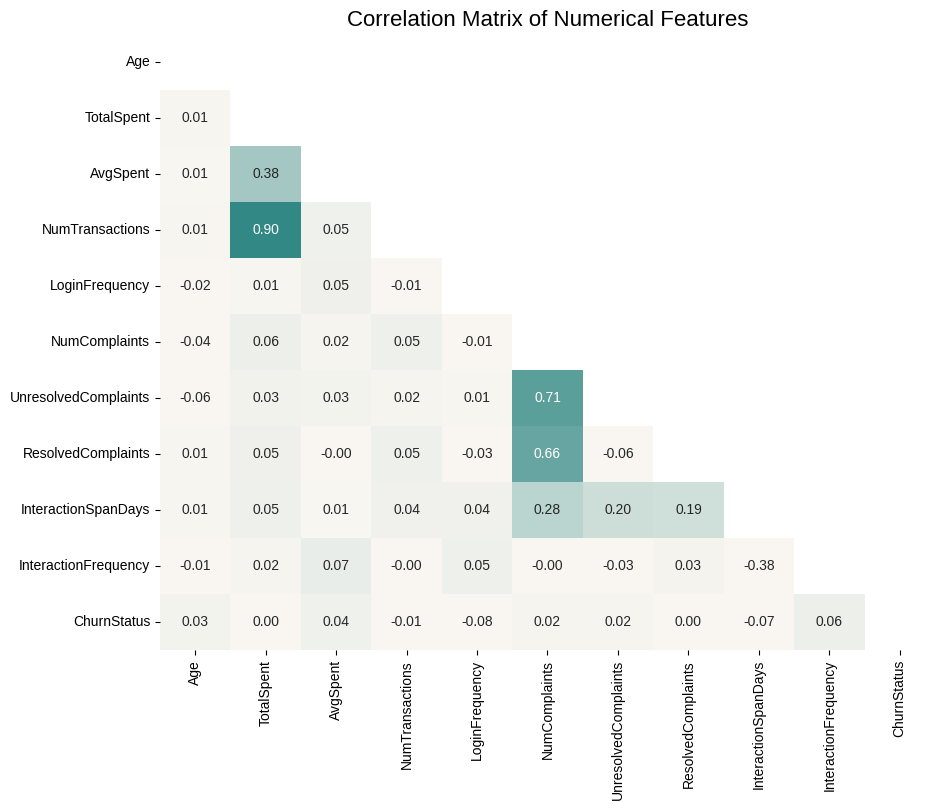

In [380]:
# Heatmap of correlation matrix - with mask for top square grid
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, annot=True, cmap=custom_cmap_offwhite_teal, fmt='.2f', mask=mask,
            vmin=0, vmax=1, cbar=False)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## 3.4 Multivariate Analysis

While bivariate analysis helped in understanding relationships between two variables at a time, multivariate analysis explores how multiple variables interact together, offering deeper insights into customer behavior and churn drivers.

In this section, I performed multivariate techniques to uncover hidden patterns and potential interactions among multiple features that might not be visible when analyzed individually.

The focus areas include:

- Visualizing and interpreting interactions between key features.

- Identifying patterns in customer behavior that lead to churn.

- Setting the stage for predictive modeling by understanding feature relationships.

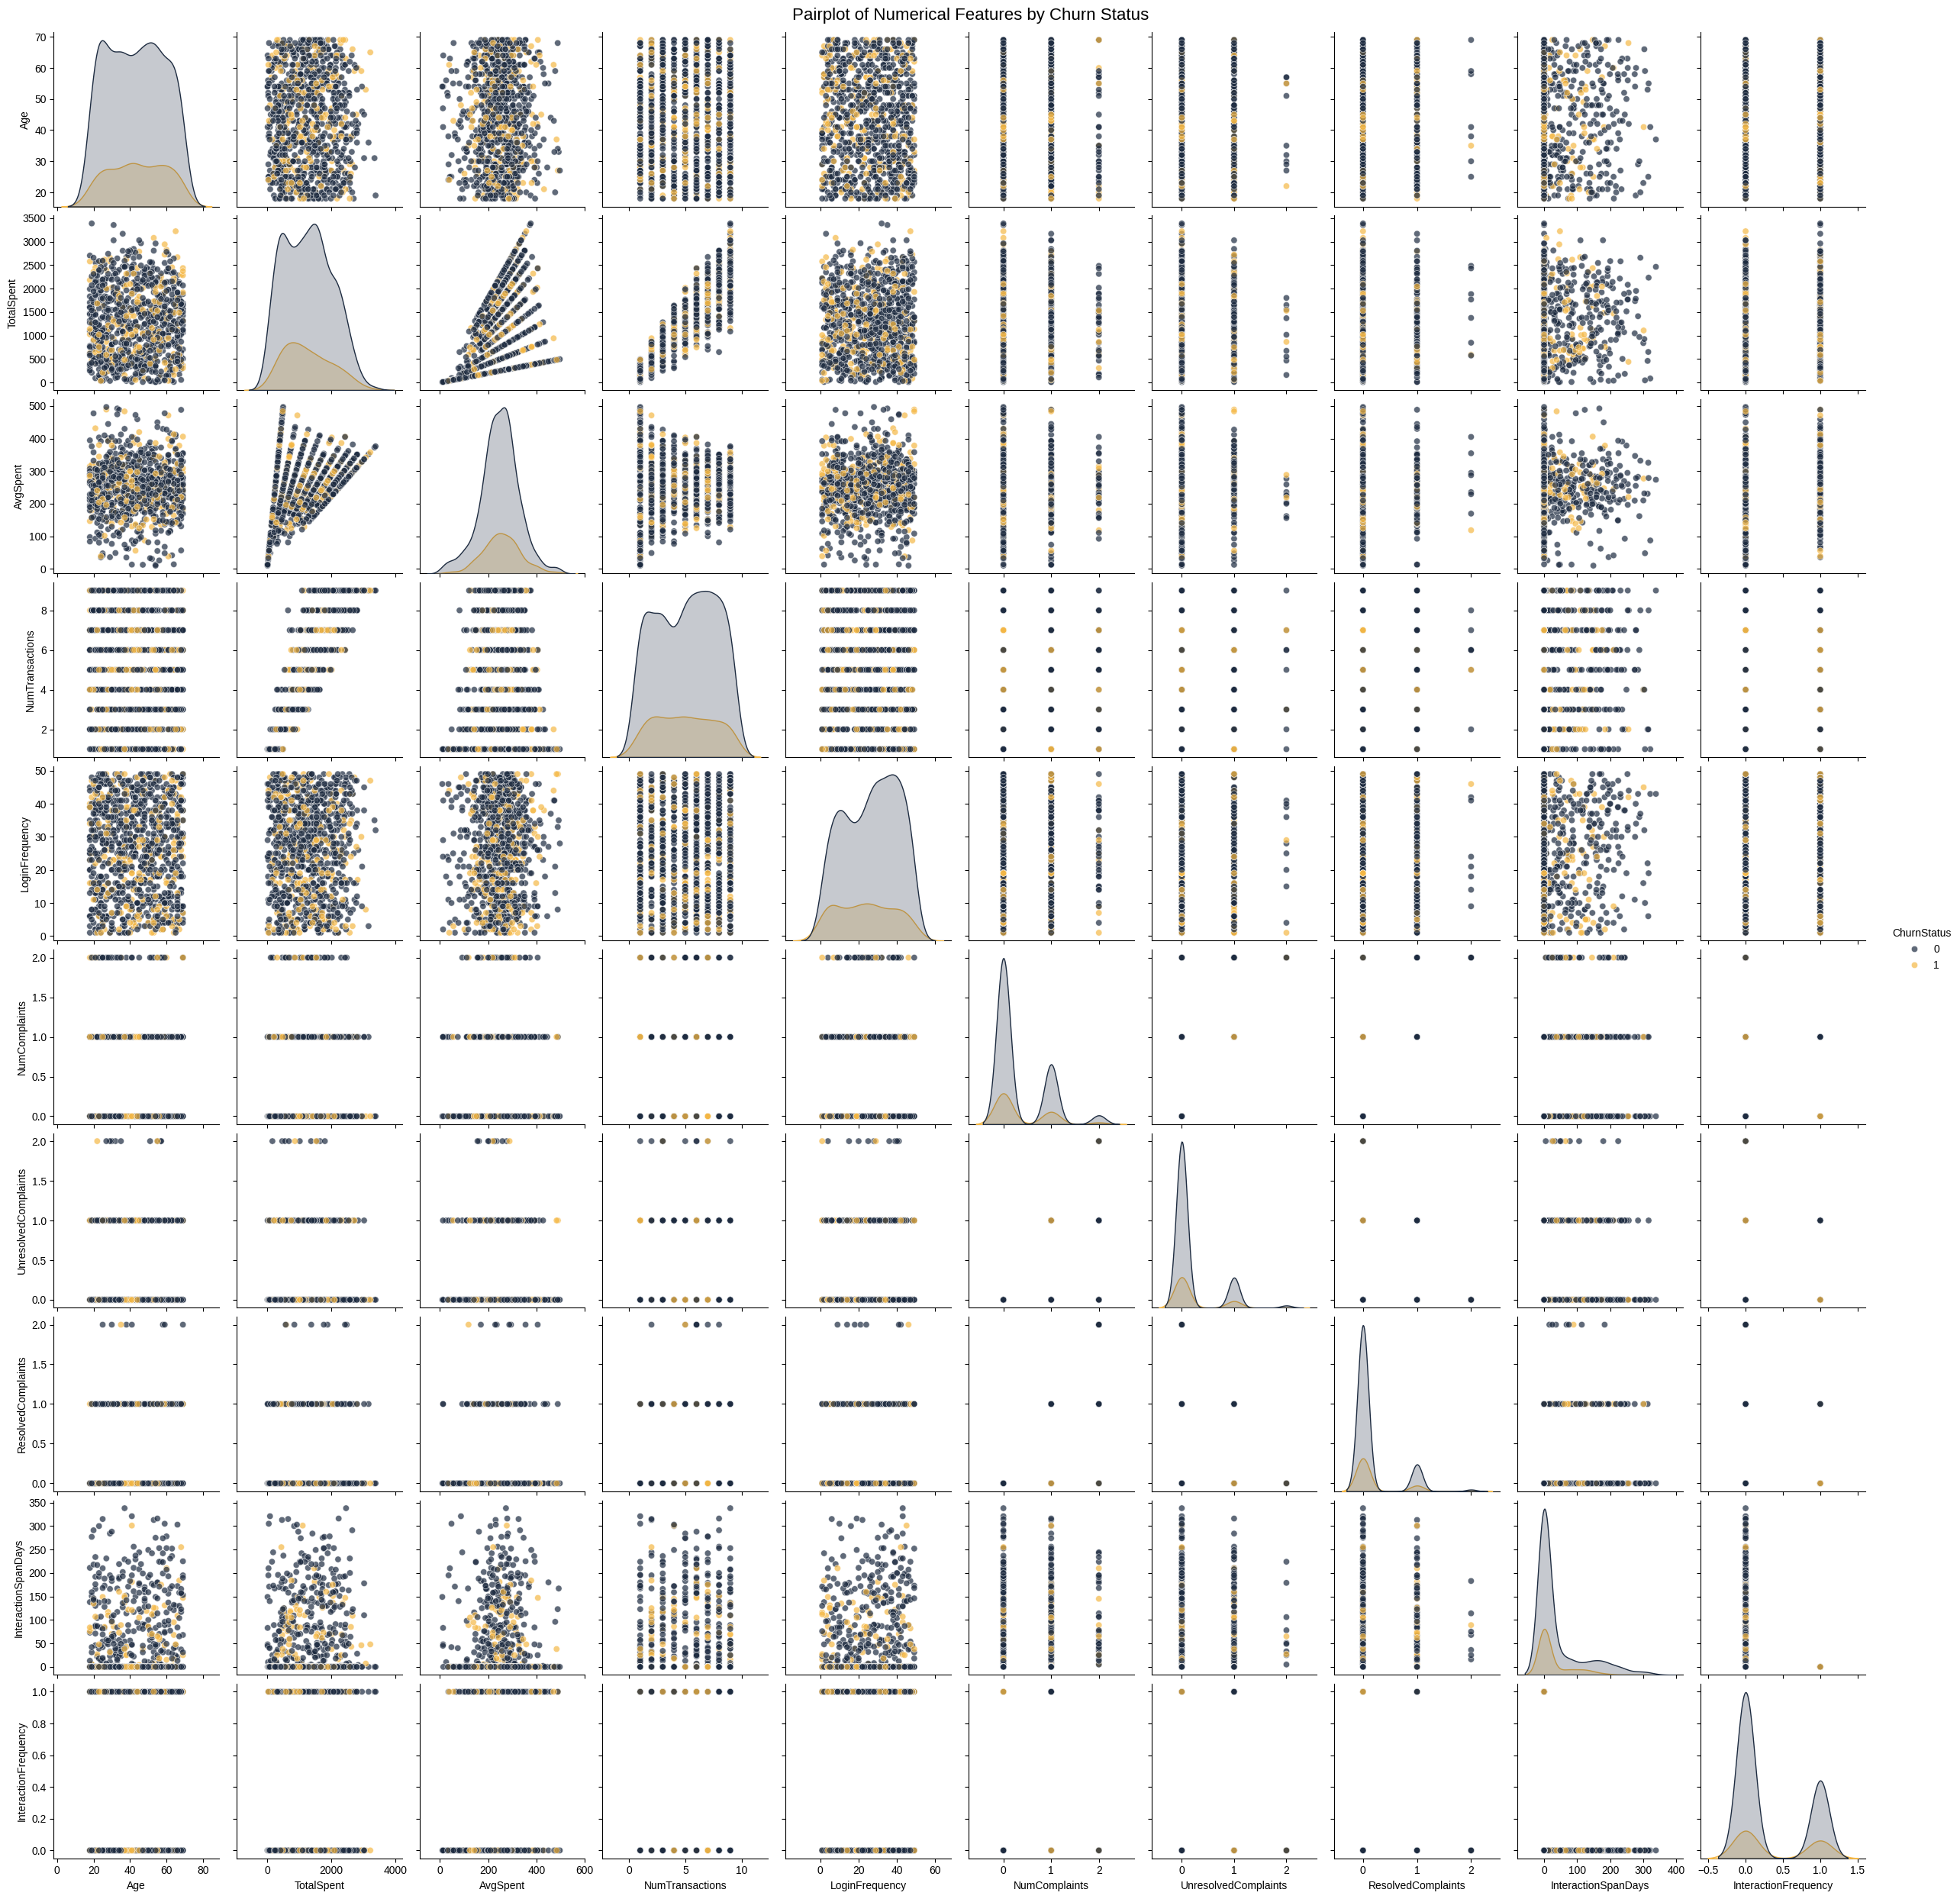

In [539]:
# Pairplot to visualize relationship
sns.pairplot(df[numerical_cols + ['ChurnStatus']], hue='ChurnStatus',
             palette={0: custom_palette['dark_navy'], 1: custom_palette['muted_yellow']},
             plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Numerical Features by Churn Status', y=1, fontsize=16)
plt.show()

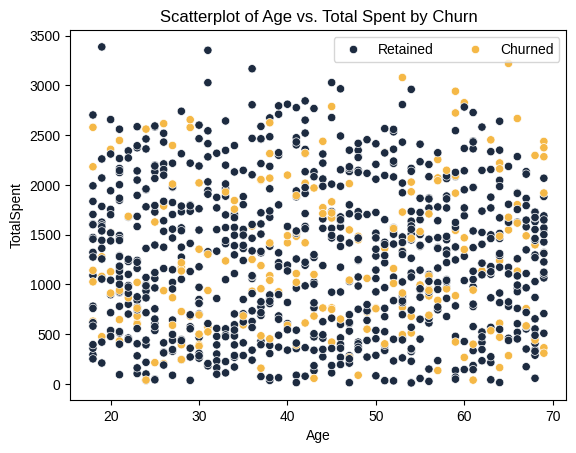

In [381]:
# Visualize Age vs Total Spent with ChurnStatus as hue
sns.scatterplot(data=df, x='Age', y='TotalSpent', hue='ChurnStatus',
                palette={0: custom_palette['dark_navy'], 1: custom_palette['muted_yellow']})

plt.title('Scatterplot of Age vs. Total Spent by Churn')

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Update legend labels
labels = ['Retained', 'Churned']

# Set the legend with the new labels
plt.legend(handles=handles, labels=labels, ncol=2)

plt.show()

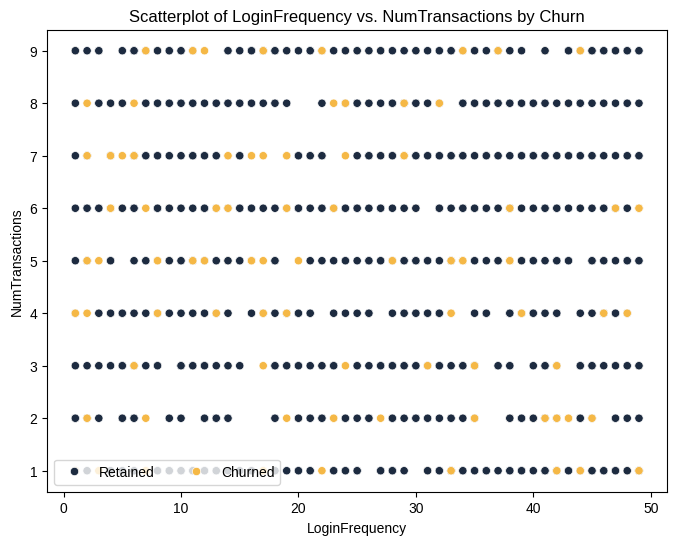

In [382]:
# Visualize loginfrequency vs numtransactions by churn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LoginFrequency', y='NumTransactions', hue='ChurnStatus',
                palette={0: custom_palette['dark_navy'], 1: custom_palette['muted_yellow']})

plt.title('Scatterplot of LoginFrequency vs. NumTransactions by Churn')

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually update legend labels to match desired names
labels = ['Retained', 'Churned']

# Set the legend with the new labels
plt.legend(handles=handles, labels=labels, ncol=2)

# Show the plot
plt.show()

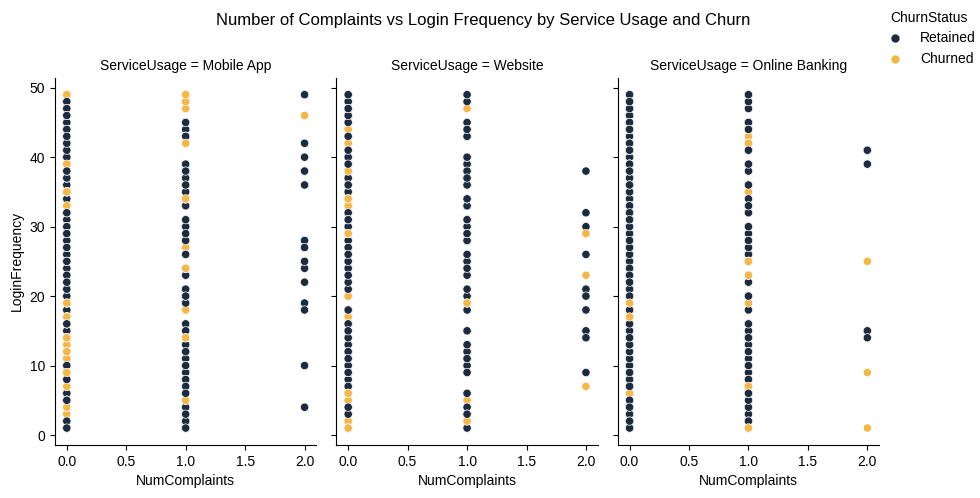

In [383]:
# Visualizing NumComplaints vs LoginFrequency by Service Usage
g = sns.relplot(
    data=df,
    x='NumComplaints', y='LoginFrequency', hue='ChurnStatus',
    col='ServiceUsage', col_wrap=3,
    palette={0: custom_palette['dark_navy'], 1: custom_palette['muted_yellow']},
    kind='scatter',
    height=5, aspect=0.6
)

# Update the overall title
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Number of Complaints vs Login Frequency by Service Usage and Churn')

# Fix the legend labels
labels = ['Retained', 'Churned']
for t, l in zip(g._legend.texts, labels):
    t.set_text(l)

g._legend.set_bbox_to_anchor((1, 1))
g._legend.set_loc("upper right")

plt.show()

In [384]:
# Crosstab of NumComplaints vs ServiceUsage by Churn
crosstab_sc = pd.crosstab(
    index=df['NumComplaints'],
    columns=[df['ServiceUsage'], df['ChurnStatus']]
)

# Apply background gradient based on cell values
styled_crosstab_sc = crosstab_sc.style.background_gradient(
    cmap=custom_cmap_offwhite_teal, axis=None, vmin=0, vmax=100,
    text_color_threshold=0
)
styled_crosstab_sc

# 4. Feature Engineering

To enhance the predictive power of our models and deepen customer insights, we engineered a series of new features across multiple categories: time-based metrics, behavioral averages, RFM segmentation, and binned features. Below, we outline the transformations and key findings.

---

## 4.1 Time-Based Features

We created recency features to measure the "freshness" of customer activities:
- **Recency_trans**: Days since the customer's last transaction.
- **Recency_login**: Days since the customer's last login.
- **Recency_interaction**: Days since the customer's last interaction with the platform.

Additionally, we introduced **gap features**:
- **Login_to_Purchase**: Number of days between last login and last purchase.
- **Login_to_Interaction**: Number of days between last login and last interaction.

**Statistical Testing (Mann–Whitney U Tests)**  
We tested each time-based feature against churn status.  
All five features showed **no statistically significant differences** between churned and retained customers (p-values > 0.05), suggesting that simple recency measures alone may not be strong churn indicators in this dataset.

---

## 4.2 Behavioral Averages

To normalize activity rates over the analysis period (12 months), we derived:
- **AvgLoginFreq**: Average login frequency per month.
- **AvgNumTransactions**: Average number of transactions per month.

These normalized metrics allow fairer comparisons across customers with varying account lifetimes.

---

## 4.3 RFM Metrics

Building on the **Recency–Frequency–Monetary (RFM)** framework, we created:
- **R_score_trans**: Recency score based on last transaction recency (3 = most recent).
- **F_score_trans**: Frequency score based on number of transactions.
- **M_score**: Monetary score based on total spending.

These scores were combined into an overall **RFM_score_trans**, forming 3-digit customer profiles.  
Further, we derived **RFM_sum** (the sum of R, F, and M digits) and categorized customers into:
- **Champions**, **Loyal Customers**, **Potential Loyalists**, **Needs Attention**, and **At Risk**.

**Statistical Testing (Chi-square Test)**  
There was **no significant association** between RFM segment and churn status (p = 0.8767).  
Thus, traditional RFM scoring alone may not be sufficient to differentiate churned customers in this case.

---

## 4.4 Binning Continuous Features

To better capture non-linear relationships and simplify models, we binned several continuous variables:

| Feature | Binning Strategy
|:--------|:-----------------|
| **Age** | Young, Mid-age, Senior (equal-sized bins) |
| **LoginFrequency** | Low, Medium, High (equal-sized bins) |
| **AvgSpent** |
| **InteractionSpanDays** | Zero, Short, Moderate, Long (custom bins) |
| **Login_to_Purchase** | Moderate, Delayed, Very Delayed (custom bins) |
| **Login_to_Interaction** | Moderate, Delayed, Very Delayed (custom bins) |
| **RFM_segment** | Champions, Loyal Customers, etc. (based on RFM_sum) |

**Notable Insight:**  
Only **InteractionSpanBin** showed a significant relationship with churn status.  
This suggests that **the length and consistency of customer engagement (not just its recency)** plays a meaningful role in churn behavior.

---

# 🔥 Summary of Feature Engineering
- **Broad Feature Creation**:  New time-based, behavioral, and RFM features were engineered.
- **Key Discovery**:  
  - **InteractionSpanBin** (customer engagement span) stood out as significantly linked to churn.
  - Most basic recency, frequency, monetary, and demographic binnings **alone** were not sufficient to differentiate churned customers.
- **Implication**: Future modeling should emphasize behavioral patterns over simple recency or demographics.


## 4.1 Time-Based Features

In [385]:
# Calculating Recency for the activities
df['Recency_trans'] = (df['LastPurchase'].max() - df['LastPurchase']).dt.days
df['Recency_login'] = (df['LastLoginDate'].max() - df['LastLoginDate']).dt.days
df['Recency_interaction'] = (df['LastInteraction'].max() - df['LastInteraction']).dt.days

In [386]:
# Recency Interaction Features
df['Login_to_Purchase'] = (df['LastLoginDate'] - df['LastPurchase']).dt.days
df['Login_to_Interaction'] = (df['LastLoginDate'] - df['LastInteraction']).dt.days

In [387]:
time_cols = ['Recency_trans', 'Recency_login', 'Recency_interaction',
              'Login_to_Purchase', 'Login_to_Interaction']

In [388]:
# Mann Whitney U Test
for col in time_cols:
    stat, p = mannwhitneyu(df[df['ChurnStatus'] == 0][col],
                           df[df['ChurnStatus'] == 1][col])

    print(f'{col}')
    print(f'Mann–Whitney U statistic = {stat:.2f}, p-value = {p:.4f}')

    if p < 0.05:
        print("✅ Statistically significant difference between churned and retained customers.")
        print()
    else:
        print("❌ No statistically significant difference between churned and retained customers.")
        print()

Recency_trans
Mann–Whitney U statistic = 80248.00, p-value = 0.7977
❌ No statistically significant difference between churned and retained customers.

Recency_login
Mann–Whitney U statistic = 79976.00, p-value = 0.7412
❌ No statistically significant difference between churned and retained customers.

Recency_interaction
Mann–Whitney U statistic = 78436.00, p-value = 0.4456
❌ No statistically significant difference between churned and retained customers.

Login_to_Purchase
Mann–Whitney U statistic = 81008.50, p-value = 0.9603
❌ No statistically significant difference between churned and retained customers.

Login_to_Interaction
Mann–Whitney U statistic = 80060.50, p-value = 0.7586
❌ No statistically significant difference between churned and retained customers.



## 4.2 Calculating Average

In [389]:
# Analysis period
analysis_period = 12

df['AvgLoginFreq'] = round(df['LoginFrequency'] / analysis_period, 2)
df['AvgNumTransactions'] = round(df['NumTransactions'] / analysis_period, 2)

## 4.3 RFM Metrics

In [390]:
# Convert each to a score: R (3=recent), F (3=frequent), M (3=high spender)
df['R_score_trans'] = pd.qcut(df['Recency_trans'], q=3, labels=[3, 2, 1])
df['F_score_trans'] = pd.qcut(df['NumTransactions'], q=3, labels=[1, 2, 3])
df['M_score'] = pd.qcut(df['TotalSpent'], q=3, labels=[1, 2, 3])

df['RFM_score_trans'] = df['R_score_trans'].astype(str) + df['F_score_trans'].astype(str) + df['M_score'].astype(str)

In [391]:
# Statistical testing for signifcance in the difference between churnstatus in the rfm segment
rfm_trans_churn_ct = df.groupby(['RFM_score_trans', 'ChurnStatus']).size().unstack(fill_value=0)

chi2, p, dof, expected = chi2_contingency(rfm_trans_churn_ct)

print(f'Chi-square statistic = {chi2:.2f}, p-value = {p:.4f}')

if p < 0.05:
    print("✅ There is a significant association between RFM segment and churn status.")
else:
    print("❌ There is no significant association between RFM segment and churn status.")

Chi-square statistic = 13.83, p-value = 0.8767
❌ There is no significant association between RFM segment and churn status.


## 4.4 Binning Continous Numerical Features

In [392]:
# Binning Age into Young, Middle-aged, Senior
df['AgeBin'] = pd.qcut(df['Age'], q=3, labels=['Young', 'Mid-age', 'Senior'])

# Binning LoginFrequency into Low, Medium, High
df['LoginBin'] = pd.qcut(df['LoginFrequency'], q=3, labels=['Low Freq', 'Medium Freq', 'High Freq'])

# Binning TotalSpent into Low, Medium, High
#df['SpendBin'] = pd.qcut(df['TotalSpent'], q=3, labels=['Low Spend', 'Medium Spend', 'High Spend'])

# Binning AvgSpent
df['AvgSpentBin'] = pd.qcut(df['AvgSpent'], q=3, labels=['Low Avg', 'Medium Avg', 'High Avg'])

In [393]:
# Binning InteractionSpanDays with custom function because of the heavy skewness
# Pre-calculate quantiles
q33 = df.loc[df['InteractionSpanDays'] > 0, 'InteractionSpanDays'].quantile(0.33)
q66 = df.loc[df['InteractionSpanDays'] > 0, 'InteractionSpanDays'].quantile(0.66)

# Define function
def custom_binning(x):
    if x == 0:
        return 'Zero'
    elif x <= q33:
        return 'Short'
    elif x <= q66:
        return 'Moderate'
    else:
        return 'Long'

df['InteractionSpanBin'] = df['InteractionSpanDays'].apply(custom_binning)

df['InteractionSpanBin'] = pd.Categorical(df['InteractionSpanBin'], categories=['Zero',
                                                                                'Short', 'Moderate', 'Long'], ordered=True)

In [394]:
# Binning Login_to_Purchase and Login_to_Interaction
# Define binning function
def gap_binner(x):
    if x <= 100:
        return 'Moderate'
    elif x <= 200:
        return 'Delayed'
    else:
        return 'Very Delayed'

# Apply binning
df['Login_to_Purchase_Bin'] = df['Login_to_Purchase'].apply(gap_binner)
df['Login_to_Interaction_Bin'] = df['Login_to_Interaction'].apply(gap_binner)

# Make them ordered categories
gap_order = ['Moderate', 'Delayed', 'Very Delayed']

df['Login_to_Purchase_Bin'] = pd.Categorical(df['Login_to_Purchase_Bin'], categories=gap_order, ordered=True)
df['Login_to_Interaction_Bin'] = pd.Categorical(df['Login_to_Interaction_Bin'], categories=gap_order, ordered=True)

In [395]:
# Binning RFM_Score
# First, make sure RFM_score_trans is an integer
df['RFM_score_trans'] = df['RFM_score_trans'].astype(int)

# Calculate the sum of R, F, and M digits
df['RFM_sum'] = df['RFM_score_trans'].apply(lambda x: sum(int(digit) for digit in str(x)))

# Create bins based on the sum
def rfm_segment_by_sum(total_score):
    if total_score >= 8:
        return 'Champions'
    elif total_score >= 6:
        return 'Loyal Customers'
    elif total_score == 5:
        return 'Potential Loyalists'
    elif total_score == 4:
        return 'Needs Attention'
    else:
        return 'At Risk'

df['RFM_segment'] = df['RFM_sum'].apply(rfm_segment_by_sum)
df['RFM_segment'] = pd.Categorical(df['RFM_segment'],
                                   categories=['Champions', 'Loyal Customers', 'Potential Loyalists', 'Needs Attention', 'At Risk'],
                                   ordered=True)

In [396]:
df['IncomeLevel'] = pd.Categorical(df['IncomeLevel'], categories=['Low', 'Medium', 'High'], ordered=True)

In [397]:
# Check the distribution
bins = ['AgeBin', 'AvgSpentBin', 'LoginBin', 'InteractionSpanBin',
        'Login_to_Purchase_Bin', 'Login_to_Interaction_Bin', 'RFM_segment']

for col in bins:
    print(df[col].value_counts(normalize=True, sort=False).round(2))
    print()

AgeBin
Young      0.33
Mid-age    0.34
Senior     0.33
Name: proportion, dtype: float64

AvgSpentBin
Low Avg       0.33
Medium Avg    0.33
High Avg      0.33
Name: proportion, dtype: float64

LoginBin
Low Freq       0.34
Medium Freq    0.34
High Freq      0.33
Name: proportion, dtype: float64

InteractionSpanBin
Zero        0.67
Short       0.11
Moderate    0.11
Long        0.11
Name: proportion, dtype: float64

Login_to_Purchase_Bin
Moderate        0.12
Delayed         0.20
Very Delayed    0.68
Name: proportion, dtype: float64

Login_to_Interaction_Bin
Moderate        0.03
Delayed         0.10
Very Delayed    0.87
Name: proportion, dtype: float64

RFM_segment
Champions              0.24
Loyal Customers        0.35
Potential Loyalists    0.14
Needs Attention        0.10
At Risk                0.18
Name: proportion, dtype: float64



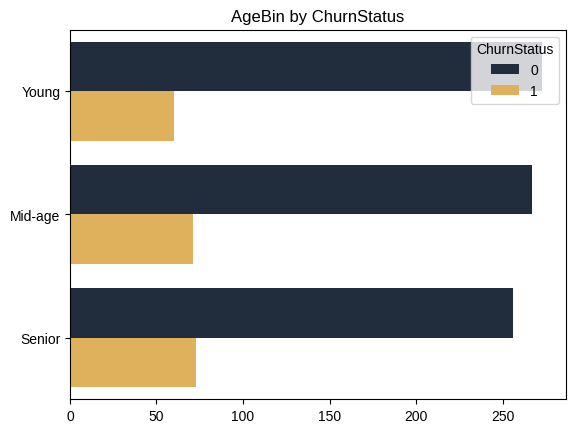

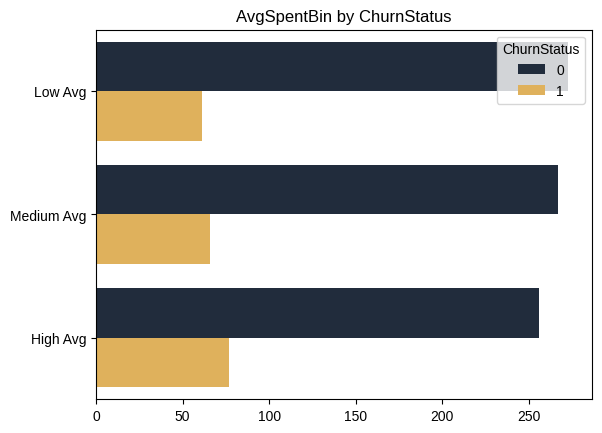

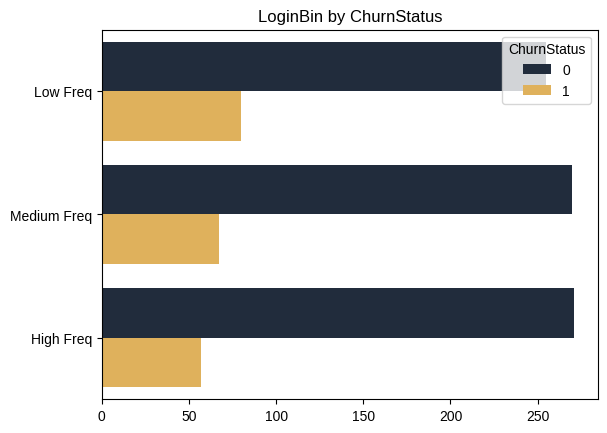

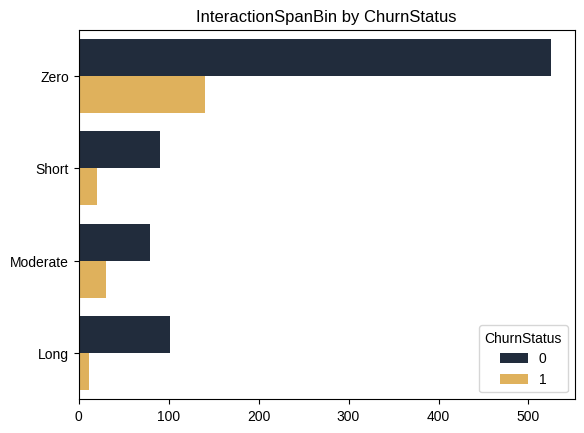

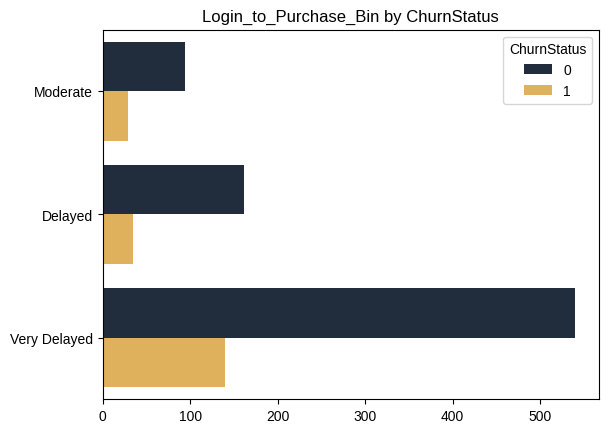

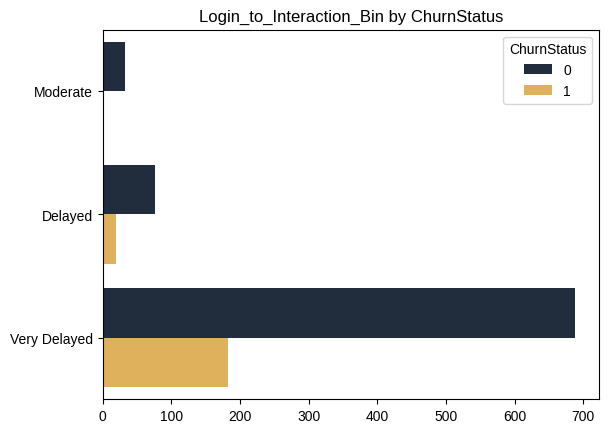

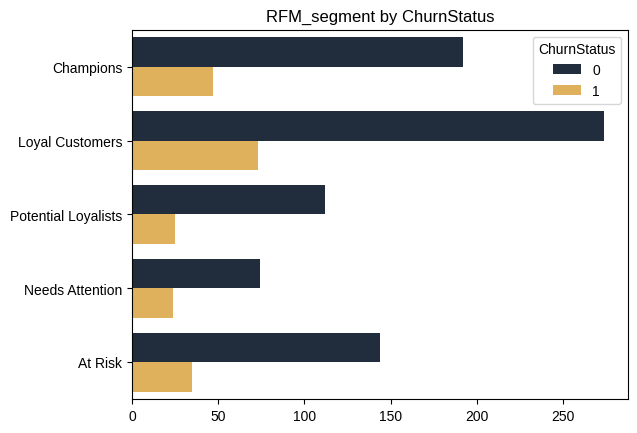

In [398]:
# Visualizing
for col in bins:
    sns.countplot(data=df, y=col, hue='ChurnStatus',
                  palette=[custom_palette['dark_navy'], custom_palette['muted_yellow']])
    plt.title(f'{col} by ChurnStatus')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [399]:
# ChiSquare test between bin features and churn status
for col in bins:
    contingency_table = pd.crosstab(df[col], df['ChurnStatus'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'{col}')
    print(f'Chi-square statistic = {chi2:.2f}, p-value = {p:.4f}')
    if p < 0.05:
        print(f"✅ There is a significant association between {col} and churn status.")
    else:
        print(f"❌ There is no significant association between {col} and churn status.")
    print()

AgeBin
Chi-square statistic = 1.89, p-value = 0.3891
❌ There is no significant association between AgeBin and churn status.

AvgSpentBin
Chi-square statistic = 2.53, p-value = 0.2824
❌ There is no significant association between AvgSpentBin and churn status.

LoginBin
Chi-square statistic = 4.40, p-value = 0.1108
❌ There is no significant association between LoginBin and churn status.

InteractionSpanBin
Chi-square statistic = 10.64, p-value = 0.0138
✅ There is a significant association between InteractionSpanBin and churn status.

Login_to_Purchase_Bin
Chi-square statistic = 1.62, p-value = 0.4447
❌ There is no significant association between Login_to_Purchase_Bin and churn status.

Login_to_Interaction_Bin
Chi-square statistic = 4.62, p-value = 0.0992
❌ There is no significant association between Login_to_Interaction_Bin and churn status.

RFM_segment
Chi-square statistic = 1.65, p-value = 0.8006
❌ There is no significant association between RFM_segment and churn status.



# Interactions

We combine bins create interactions for risk profiling and deeper insights

In [400]:
# Cross-tabulation to get churn rates
interaction1 = pd.crosstab(
    index=df['LoginBin'],
    columns=[df['HasUnresolvedComplaint'], df['ChurnStatus']],
    normalize='index'
).round(2)

# Rename columns for clarity
interaction1

HasUnresolvedComplaint False        True      
ChurnStatus                0     1     0     1
LoginBin                                      
Low Freq                0.66  0.19  0.10  0.04
Medium Freq             0.65  0.16  0.15  0.04
High Freq               0.69  0.14  0.14  0.03

🔍 **Observations from LoginBin × HasUnresolvedComplaint × Churn:**

- **Low Freq logins + unresolved complaints** → highest churn rate (**31.3%**)
- **Low Freq logins + no unresolved complaints** → lower churn (**22.6%**)
- For **Medium and High login** groups, the churn gap between complaint vs. no complaint narrows significantly (basically no difference)

---

✨ **Interpretation:**
Customers with **low engagement (Low Freq)** **and** **unresolved complaints** are the most at risk. That combo might indicate people who had a bad experience and didn’t come back.

This suggests:
- Login frequency **moderates** the effect of unresolved complaints on churn.
- Maybe highly engaged users are more forgiving or still find value despite issues.


In [401]:
# Statistical Testing for significance
# Fit the model with interaction
model = smf.logit("ChurnStatus ~ LoginBin * HasUnresolvedComplaint", data=df).fit()

# Print summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.502899
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ChurnStatus   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                0.005928
Time:                        08:18:12   Log-Likelihood:                -502.90
converged:                       True   LL-Null:                       -505.90
Covariance Type:            nonrobust   LLR p-value:                    0.3064
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -1.2283      0.141     -8.709      0.000      -1.505      -0.952
LoginBin[T.Medium Freq]                                   -0.1672      0.207     -0.806      0.420      -0.574       0.239
LoginBin[T.High Freq]                                     -0.3421      0.214     -1.602      0.109      -0.761       0.076
HasUnresolvedComplaint[T.True]                             0.4398      0.342      1.287      0.198      -0.230       1.110
LoginBin[T.Medium Freq]:HasUnresolvedComplaint[T.True]    -0.4306      0.486     -0.886      0.376      -1.383       0.522
LoginBin[T.High Freq]:HasUnresolvedComplaint[T.True]      -0.3735      0.515     -0.726      0.468      -1.382       0.635
==========================================================================================================================
"""

Based on the results of the logistic regression model, here’s a breakdown of the key findings:

- **Intercept (-1.2283)**: The baseline log-odds of churn (when LoginBin = Low Freq and HasUnresolvedComplaint = False) is -1.2283. This value helps establish the starting point for the model.
  
- **LoginBin[T.Medium Freq] (-0.1672)**: This coefficient suggests that, compared to Low Freq, Medium Freq users have a slightly lower likelihood of churning. However, the p-value is 0.420, which means this effect is **not statistically significant**.

- **LoginBin[T.High Freq] (-0.3421)**: Similarly, for High Freq users, the coefficient suggests a lower likelihood of churning compared to Low Freq users, but the p-value of 0.109 indicates this is **not statistically significant** either.

- **HasUnresolvedComplaint[T.True] (0.4398)**: This coefficient indicates that customers with unresolved complaints have higher odds of churning (0.4398 in log-odds). However, with a p-value of 0.198, this is **not statistically significant**.

- **Interaction Terms**:
  - **LoginBin[T.Medium Freq]:HasUnresolvedComplaint[T.True] (-0.4306)**: The interaction effect between Medium Freq and Unresolved Complaints is negative, suggesting a reduced likelihood of churn when both conditions are true. However, this effect is not statistically significant (p-value = 0.376).
  - **LoginBin[T.High Freq]:HasUnresolvedComplaint[T.True] (-0.3735)**: Similarly, for High Freq and Unresolved Complaints, the interaction is also negative but not significant (p-value = 0.468).

**Conclusion**:

- **None of the coefficients in the model are statistically significant** (p-value > 0.05). This suggests that, although the relationships seem to exist, they are not strong enough to provide conclusive evidence of an effect on churn.
- In particular, the **interaction effect** between **Login Frequency** and **Unresolved Complaints** is not statistically significant. While there may be a relationship, it's not strong enough in this dataset to confidently say it’s influencing churn.

In [402]:
# Statistical Testing for significance using the original continuous logingfrequency values intead of the binned values
# Fit the model with interaction
model = smf.logit("ChurnStatus ~ LoginFrequency * HasUnresolvedComplaint", data=df).fit()

# Print summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.501963
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ChurnStatus   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                0.007778
Time:                        08:18:12   Log-Likelihood:                -501.96
converged:                       True   LL-Null:                       -505.90
Covariance Type:            nonrobust   LLR p-value:                   0.04879
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -1.0733      0.173     -6.204      0.000      -1.412      -0.734
HasUnresolvedComplaint[T.True]                    0.4394      0.415      1.060      0.289      -0.373       1.252
LoginFrequency                                   -0.0126      0.006     -2.050      0.040      -0.025      -0.001
LoginFrequency:HasUnresolvedComplaint[T.True]    -0.0111      0.015     -0.740      0.459      -0.040       0.018
=================================================================================================================
"""

From the results of the logistic regression, here’s a breakdown:

- **Intercept**: The negative intercept indicates that when all variables are at their baseline (i.e., `HasUnresolvedComplaint` is False and `LoginFrequency` is at 0), the likelihood of churn is higher than retention. This is expected in many churn models where we assume users without complaints or minimal interactions are more likely to churn.

- **`HasUnresolvedComplaint[T.True]`**: The coefficient for **HasUnresolvedComplaint** is positive (0.4394), but with a **p-value of 0.289**, this suggests that having an unresolved complaint doesn't significantly affect the likelihood of churn. This is consistent with earlier findings from the previous analysis.

- **`LoginFrequency`**: The coefficient for **LoginFrequency** is negative (-0.0126), indicating that as login frequency increases, the likelihood of churn slightly decreases. The p-value is **0.040**, which is statistically significant at the 5% level. This suggests that users who log in more frequently are slightly less likely to churn, but the effect is small.

- **Interaction (`LoginFrequency:HasUnresolvedComplaint[T.True]`)**: The coefficient for the interaction term is -0.0111 with a **p-value of 0.459**, indicating that the interaction between login frequency and unresolved complaints does not significantly affect churn. This suggests that while unresolved complaints might impact churn, their combined effect with login frequency is not strong enough to be statistically significant.

**Interpretation:**

- **LoginFrequency**: This continuous variable seems to have a weak but statistically significant inverse relationship with churn. Users who log in more frequently are slightly less likely to churn, but the effect size is small, suggesting that login frequency alone is not a major churn driver.

- **Unresolved Complaints**: Having an unresolved complaint does not significantly affect churn on its own, based on this model. This suggests that other factors might play a more significant role in determining churn for users with unresolved complaints.


# 5. Customer Clustering

To better understand different types of customers and their behaviors, we applied clustering, an unsupervised machine learning technique.
Clustering groups similar customers together based on key features, helping to uncover hidden segments in the data without any prior labels.
This approach is highly relevant for churn analysis, as it allows the business to identify meaningful customer profiles, personalize engagement strategies, and gain deeper behavioral insights, even when churn rates are similar across groups.

## Process Overview

- **Features Selected for Clustering**:  
  Included spending behavior, transaction frequency, complaints, login/interaction metrics, RFM scores, etc.

- **Data Preparation**:
  - Converted RFM scores to integers.
  - Standardized features using `StandardScaler`.

- **Finding Optimal Clusters**:
  - Used the **Elbow Method** → Chose **K = 3**.

- **Clustering**:
  - Applied **KMeans** with 3 clusters.
  - Assigned cluster labels back to the main dataframe.
  - **Silhouette Score**: 0.201 → Moderate cluster separation (okay but could be better).

- **Cluster Sizes**:
  - Cluster 1: 435 customers
  - Cluster 0: 327 customers
  - Cluster 2: 238 customers

---

## Visualizing Clusters with PCA

- **Dimensionality Reduction**:
  - Applied **PCA** to reduce to 2 principal components.

- **Interpretation of PCA plot**:
  - Clusters are relatively well-separated.
  - Minimal overlaps, especially between Cluster 0 and Cluster 2 in some regions.
  - Overall, the clustering captured meaningful structures.

---

## Cluster Characteristics (Average Values)

| Feature                  | Cluster 0         | Cluster 1         | Cluster 2         |
|---------------------------|-------------------|-------------------|-------------------|
| Age                       | 42.61              | 43.22              | 44.26              |
| TotalSpent (USD)          | 489.35             | 1730.66            | 1488.33            |
| NumTransactions           | 2.12               | 6.71               | 6.05               |
| AvgSpent (USD)            | 236.06             | 259.17             | 247.38             |
| NumInteractions           | 1.03               | 1.53               | 0.00               |
| UniqueInteractionTypes    | 0.92               | 1.34               | 0.00               |
| NumComplaints             | 0.31               | 0.54               | 0.00               |
| UnresolvedComplaints      | 0.16               | 0.29               | 0.00               |
| LoginFrequency            | 26.54              | 25.91              | 25.04              |
| InteractionFrequency      | 0.40               | 0.47               | 0.00               |
| Recency_trans (days)       | 144.46             | 46.90              | 43.74              |
| Recency_login (days)       | 178.86             | 179.10             | 175.26             |
| Recency_interaction (days) | 5675.61            | 148.28             | 19356.00           |
| AvgLoginFreq              | 2.21               | 2.16               | 2.09               |
| AvgNumTransactions        | 0.18               | 0.56               | 0.50               |
| RFM_sum                   | 3.64               | 7.14               | 6.73               |
| **Churn Rate**            | 22%                | 21%                | 18%                |

---

## Statistical Testing

- **Kruskal-Wallis Tests**:
  - Significant differences (**p < 0.05**) found between clusters for:
    - TotalSpent ✅
    - AvgSpent ✅
    - NumTransactions ✅
    - NumComplaints ✅
    - UnresolvedComplaints ✅
    - ResolvedComplaints ✅
    - InteractionSpanDays ✅
    - InteractionFrequency ✅
  - No significant differences for:
    - Age ❌
    - LoginFrequency ❌

- **Chi-Square Test** (Cluster vs Churn):
  - **p-value = 0.5579** → ❌ No significant association.
  - Meaning: Being in a particular cluster does not significantly predict if a customer churns.

---

# Quick Observations 🔍

- **Cluster 2**:
  - High spenders, many transactions, but *zero* interactions or complaints recorded.
  - **Lowest churn rate** (18%).

- **Cluster 1**:
  - Highest overall spending and transactions **with interactions and complaints**.
  - Good engagement despite complaints.

- **Cluster 0**:
  - **Lowest spenders** and fewer transactions.
  - Lower interaction levels.
  - **Highest churn rate** (22%).


In [403]:
# Features selected for clustering
features_for_clustering = [
    'Age', 'TotalSpent', 'NumTransactions', 'AvgSpent',
    'NumInteractions', 'UniqueInteractionTypes',
    'NumComplaints', 'UnresolvedComplaints',
    'LoginFrequency', 'InteractionFrequency',
    'Recency_trans', 'Recency_login', 'Recency_interaction',
    'Login_to_Purchase', 'Login_to_Interaction',
    'AvgLoginFreq', 'AvgNumTransactions',
    'R_score_trans', 'F_score_trans', 'M_score',
    'RFM_sum'
]

In [404]:
# Create a copy of the data with selected features
X = df[features_for_clustering].copy()

X['R_score_trans'] = X['R_score_trans'].astype(int)
X['F_score_trans'] = X['F_score_trans'].astype(int)
X['M_score'] = X['M_score'].astype(int)

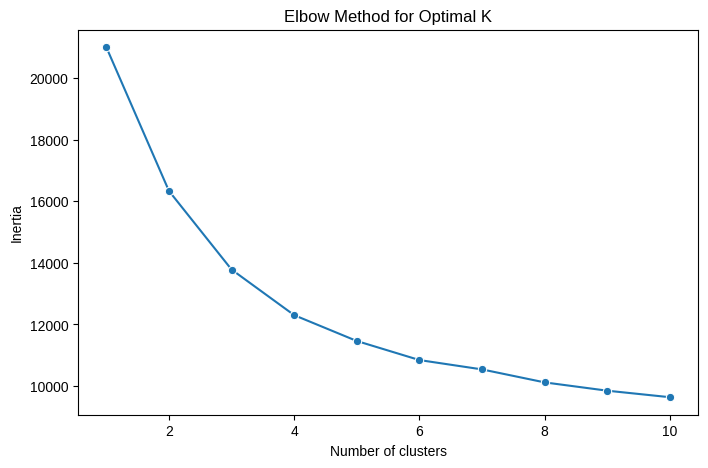

In [405]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [406]:
# Choose number of clusters
optimal_k = 3

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Assign cluster labels back to the main dataframe
df['Cluster'] = cluster_labels

In [407]:
# silhouette score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {round(silhouette_avg, 3)}")

Silhouette Score: 0.201


In [408]:
df['Cluster'].value_counts()

Cluster
1    435
0    327
2    238
Name: count, dtype: int64

## Dimensionality Reduction For Visualizing Clusters - PCA

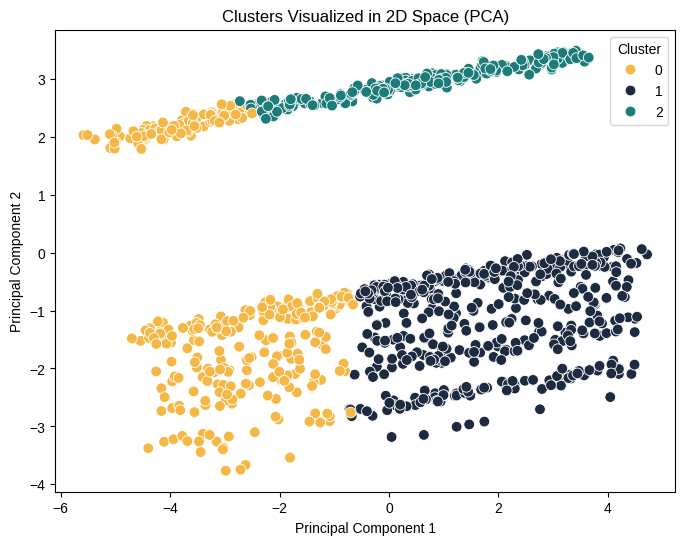

In [538]:
# Reduce dimensions to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster',
                palette=[custom_palette['muted_yellow'], custom_palette['dark_navy'], custom_palette['teal_green']], s=60)
plt.title('Clusters Visualized in 2D Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

**PCA Visuals Interpretation**

1. **Clusters Are Well-Separated**
   - The points in different colors (Cluster 0 - yellow, Cluster 1 - dark blue, Cluster 2 - teal) form relatively **distinct groups**.
   - This suggests that the clustering did a **good job** — there’s a clear structure in the data.
   
2. **Cluster 2 (teal)**:
   - Mostly occupies the **top** of the plot (Principal Component 2 > 2).
   - It is **well-separated** from the others vertically.
   
3. **Cluster 1 (dark blue)**:
   - Stretches across a wide range of **Principal Component 1** (from around 0 to 4).
   - Positioned **lower** (Principal Component 2 between -3 and 0).
   - Densely packed.

4. **Cluster 0 (yellow)**:
   - Covers a **broader horizontal area** (Principal Component 1 from about -6 to 0).
   - It **overlaps slightly** with Cluster 2 in the top left but otherwise is mainly separated.

5. **Small Overlaps**:
   - A slight overlap between Cluster 0 and Cluster 2 around **Principal Component 1 between -4 and -2**, Principal Component 2 around 2–3.
   - However, the overlap is **minimal**, meaning the clusters are still relatively distinct.

---

**Overall:**
- **Separation is good** → The clustering captured meaningful groupings.
- **Cluster shapes**:
  - Cluster 2 looks **tight** and linear.
  - Cluster 1 is **spread out horizontally** but still grouped.
  - Cluster 0 is **wider and more spread** across both components.

- **PCA was helpful** → It reduced the data to 2D in a way that **preserved the clustering structure**.


In [409]:
# Group by cluster and take mean
numeric_features = df[features_for_clustering].select_dtypes(include=['number']).columns
cluster_profiles = df.groupby('Cluster')[numeric_features].mean()
cluster_profiles['churn_rate'] = df.groupby('Cluster')['ChurnStatus'].mean()
cluster_profiles = cluster_profiles.round(2)

In [410]:
cluster_profiles

Age  TotalSpent  NumTransactions  AvgSpent  NumInteractions  \
Cluster                                                                  
0        42.61      489.35             2.12    236.06             1.03   
1        43.22     1730.66             6.71    259.17             1.53   
2        44.26     1488.33             6.05    247.38             0.00   

         UniqueInteractionTypes  NumComplaints  UnresolvedComplaints  \
Cluster                                                                
0                          0.92           0.31                  0.16   
1                          1.34           0.54                  0.29   
2                          0.00           0.00                  0.00   

         LoginFrequency  InteractionFrequency  Recency_trans  Recency_login  \
Cluster                                                                       
0                 26.54                  0.40         144.46         178.86   
1                 25.91                  0.47          46.90         179.10   
2                 25.04                  0.00          43.74         175.26   

         Recency_interaction  Login_to_Purchase  Login_to_Interaction  \
Cluster                                                                 
0                    5675.61             330.61               5862.75   
1                     148.28             232.80                335.18   
2                   19356.00             233.48              19546.74   

         AvgLoginFreq  AvgNumTransactions  RFM_sum  churn_rate  
Cluster                                                         
0                2.21                0.18     3.64        0.22  
1                2.16                0.56     7.14        0.21  
2                2.09                0.50     6.73        0.18

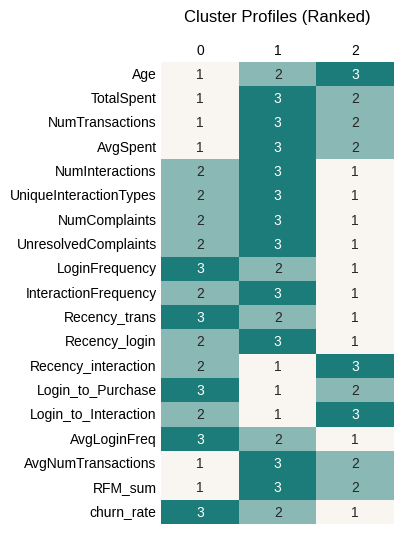

In [411]:
# Visualization
# Rank each feature across clusters
cluster_profiles_ranked = cluster_profiles.rank(method='min', axis=0)

cluster_profiles_ranked = cluster_profiles_ranked.T

# Plot heatmap
plt.figure(figsize=(3,6))
sns.heatmap(cluster_profiles_ranked, cmap=custom_cmap_offwhite_teal,
            annot=True, fmt='.0f', cbar=False)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='both', length=0)
plt.title('Cluster Profiles (Ranked)', y=1.07, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [412]:
# Kruskal-Wallis Test for each feature
kruskal_results = {}

for feature in numerical_cols:
    # Separate the data by clusters
    cluster_0 = df[df['Cluster'] == 0][feature]
    cluster_1 = df[df['Cluster'] == 1][feature]
    cluster_2 = df[df['Cluster'] == 2][feature]

    # Perform Kruskal-Wallis H Test
    kruskal_stat, kruskal_p = kruskal(cluster_0, cluster_1, cluster_2)
    kruskal_results[feature] = (kruskal_stat, kruskal_p)

# Display Results
print("\nKruskal-Wallis Results (Statistic, p-value):")
for feature, result in kruskal_results.items():
    print(f"{feature}: {result}")

    if result[1] < 0.05:
        print(f"✅ There is a significant difference in {feature} between clusters.")
    else:
        print(f"❌ There is no significant difference in {feature} between clusters.")
    print()


Kruskal-Wallis Results (Statistic, p-value):
Age: (np.float64(1.6284649176689614), np.float64(0.44297920168366))
❌ There is no significant difference in Age between clusters.

TotalSpent: (np.float64(597.1645857578661), np.float64(2.124994491829667e-130))
✅ There is a significant difference in TotalSpent between clusters.

AvgSpent: (np.float64(17.125405092383062), np.float64(0.00019110213278851864))
✅ There is a significant difference in AvgSpent between clusters.

NumTransactions: (np.float64(613.03410611589), np.float64(7.609134270075742e-134))
✅ There is a significant difference in NumTransactions between clusters.

LoginFrequency: (np.float64(1.642940565850293), np.float64(0.4397845711790369))
❌ There is no significant difference in LoginFrequency between clusters.

NumComplaints: (np.float64(167.02485801658676), np.float64(5.38285785249784e-37))
✅ There is a significant difference in NumComplaints between clusters.

UnresolvedComplaints: (np.float64(84.79115617874673), np.float6

In [413]:
# statistical testing for churn per cluster
cluster_churn_ct = df.groupby(['Cluster', 'ChurnStatus']).size().unstack(fill_value=0)

chi2, p, dof, expected = chi2_contingency(cluster_churn_ct)

print(f'Chi-square statistic = {chi2:.2f}, p-value = {p:.4f}')

if p < 0.05:
    print("✅ There is a significant association between cluster and churn status.")
else:
    print("❌ There is no significant association between cluster and churn status.")

Chi-square statistic = 1.17, p-value = 0.5579
❌ There is no significant association between cluster and churn status.


# **7. Customer Behavior-Based Personas & Strategic Recommendations for SmartBank**

#### 🎯 **Cluster 0 – Lightly Engaged, Low-Issue Customers**

**Profile**:
- **Avg. Total Spent**: $1,287.79 (Moderate spending)
- **Avg. Transactions**: 5 (Moderate transaction frequency)
- **Avg. Interactions**: 1 (Low interaction frequency)
- **Complaints**: Low (Mostly resolved)
- **Interaction Frequency**: Very low but consistent
- **Login Frequency**: High (Consistent logins)

**Insights**:
- These customers spend moderately but are disengaged from other features or services beyond basic transactions. They have very few complaints, most of which are resolved quickly, and their login activity remains consistent, suggesting they primarily use SmartBank for routine banking. The low interaction frequency indicates minimal engagement with value-added services like customer support or additional financial products.

**Strategic Recommendations**:
1. **Promote Cross-Selling of Financial Products**:
   - Introduce products like credit cards, savings plans, and insurance options to increase their engagement with SmartBank.
   - Target these customers with tailored offers to increase their spend on services beyond the basic transactions.

2. **In-App Nudges**:
   - Use push notifications or in-app messages to subtly highlight underused features like investment options, savings tools, or budgeting assistance.
   - These nudges should be non-intrusive but focused on educating users about the value they are missing by not engaging with other services.

3. **Educational Campaigns**:
   - Share financial tips and product usage recommendations through emails, app banners, or social media channels.
   - Focus on making these interactions feel personal and relevant to the customer’s financial goals, guiding them toward deeper engagement.

---

#### 🧠 **Cluster 1 – Highly Engaged, High-Issue Customers**

**Profile**:
- **Avg. Total Spent**: $1,338.73 (Highest spending among the clusters)
- **Avg. Transactions**: 5.25 (Slightly higher transaction frequency than Cluster 0)
- **Avg. Interactions**: 2 (Higher interaction frequency compared to Cluster 0)
- **Complaints**: Moderate (More unresolved complaints than other clusters)
- **Interaction Span**: Very long (Over 100 days)
- **Interaction Frequency**: Very low
- **Login Frequency**: Moderate (Consistent logins)

**Insights**:
- These customers are highly engaged in terms of spending but face ongoing issues, with many complaints still unresolved. They interact over long periods, indicating that they are loyal customers, yet their experience is marred by frustrations. Their long interaction span suggests that, despite dissatisfaction, they remain committed, which also represents a significant opportunity for the bank to improve their experience.

**Strategic Recommendations**:
1. **VIP Resolution Desk**:
   - Create a high-priority support team to handle complaints from this segment. These customers have issues that need swift resolution to prevent escalation.
   - Personalize follow-ups to demonstrate that their concerns are being taken seriously, and provide them with a dedicated point of contact for future issues.

2. **Proactive Follow-Ups**:
   - Implement a CRM-based system to ensure that unresolved complaints are systematically followed up. This can include offering apology credits, personalized surveys to understand their pain points, or even compensations for their loyalty despite the issues they faced.

3. **Exclusive Loyalty Programs**:
   - Offer exclusive benefits like lower loan interest rates, priority service, or higher rewards points for long-term customers in this segment. Given their high spend, these customers would likely appreciate the additional benefits of continued engagement with SmartBank.

---

#### 📉 **Cluster 2 – At-Risk Silent Users**

**Profile**:
- **Avg. Total Spent**: $1,175.83 (Lowest spending)
- **Avg. Transactions & Interactions**: Low to none
- **Complaints & Interaction Types**: None (No complaints or interactions recorded)
- **Login & Interaction Frequency**: Zero (No engagement at all)

**Insights**:
- These customers are silent users who have disengaged entirely. They do not interact with the platform, and their accounts show no activity, suggesting that they have become inactive or are in the process of churning. Their lack of engagement and complaints further indicates that they are quietly withdrawing from SmartBank without expressing dissatisfaction. This behavior indicates a high churn risk and a missed opportunity to re-engage them before they leave.

**Strategic Recommendations**:
1. **Reactivation Campaigns**:
   - Launch targeted campaigns to re-engage these customers with tailored offers, such as cash-back, no-fee months, or loyalty incentives. By offering them something of value, you might prompt them to log back into their account and re-engage with the bank.
   
2. **Exit Survey/Call Campaigns**:
   - Reach out to understand why they stopped engaging. These insights can be used to shape future retention strategies and prevent similar churn among other customers. An exit survey or a call from the customer support team can reveal external factors (e.g., market competition or lifestyle changes) that may be contributing to their disengagement.

3. **Dormant Account Watchlist**:
   - Continuously monitor other accounts showing similar signs of disengagement. Proactively intervene by sending targeted communication to address potential churn before it becomes irreversible. Early intervention could include special offers, service reminders, or re-engagement incentives to keep them connected.

---

### 🧩 **Final Notes**:
While the Kruskal-Wallis test didn’t show a significant relationship between churn status and customer demographics, login activity, transaction history, and interaction patterns, the behavioral clusters reveal valuable customer segments that SmartBank can use for targeted marketing and retention strategies.

These personas indicate that churn may be influenced by external factors such as market competition, financial constraints, or lifestyle changes, which aren't captured in the current data. However, the behavioral insights from the clusters provide a clear basis for action:

- **Cluster 1** should be prioritized for retention tactics, as they have high engagement and spending but unresolved complaints.
- **Cluster 2** is at high risk of churn and requires immediate re-engagement efforts, including tailored offers and proactive communication.
- **Cluster 0**, while low-engagement, represents an untapped opportunity to deepen customer relationships through cross-selling and educational campaigns.

By focusing on these personas, SmartBank can fine-tune its customer experience strategies, retain high-value customers, and prevent potential churn, ensuring long-term success in a competitive market.


# 8. Preprocessing in preparation for Modeling

Before building churn prediction models, it’s crucial to prepare the dataset appropriately.
Preprocessing ensures that the input data is clean, consistent, and properly formatted to maximize model performance and minimize biases.

## 8.1 Multicollinearity Check
To ensure stable and interpretable models, we began preprocessing by checking for multicollinearity among the numerical features using **Variance Inflation Factor (VIF)** analysis.

### Step 1: Identify and Remove Features with Infinite VIF
After calculating VIFs, the following features exhibited infinite VIF values, suggesting perfect multicollinearity:

```python
cols_inf_vif = [
    'NumComplaints', 'UnresolvedComplaints', 'ResolvedComplaints',
    'Recency_trans', 'Recency_login', 'Recency_interaction',
    'Login_to_Purchase', 'Login_to_Interaction', 'AvgLoginFreq',
    'AvgNumTransactions'
]
```
These features were dropped to avoid redundancy and instability during modeling.

---

### Step 2: Identify Features with High VIF (>10)

After removing features with infinite VIFs, another VIF analysis revealed these features with VIF values above 10:

```python
cols_vif_above10 = ['TotalSpent', 'NumTransactions', 'RFM_sum']
```
Since high VIF values indicate strong multicollinearity (though not as severe as infinite VIF), we adopted a **dual strategy**:
- **For linear models** (e.g., Logistic Regression), two training sets would be created:
  - One **including** these high-VIF features.
  - One **excluding** these high-VIF features.
- **For tree-based models** (e.g., Random Forest), both datasets would also be tested since such models are generally more robust against multicollinearity.

This approach allows comparison of model performance under different feature sets and helps assess the impact of multicollinearity on churn prediction.

---

## 8.2 Feature Grouping

Based on the nature of features, we grouped them for appropriate preprocessing:

- **Categorical Features (to Category dtype)**:
  ```python
  cols_dtype_to_category = ['Cluster']
  ```

- **Features for Log Transformation** (to reduce skewness):
  ```python
  cols_log_transform = [
      'TotalSpent', 'AvgSpent', 'InteractionSpanDays',
      'Recency_trans', 'Recency_login', 'Recency_interaction',
      'Login_to_Purchase', 'Login_to_Interaction'
  ]
  ```

- **Features for Standard Scaling** (mean=0, std=1):
  ```python
  cols_standard_scaling = [
      'TotalSpent', 'AvgSpent', 'InteractionSpanDays', 'LoginFrequency', 'Age',
      'Recency_trans', 'Recency_login', 'Recency_interaction',
      'Login_to_Purchase', 'Login_to_Interaction'
  ]
  ```

- **Features for Min-Max Scaling** (scale to [0,1]):
  ```python
  cols_min_max_scaling = [
      'NumTransactions', 'AvgTransactions', 'AvgLoginFreq', 'AvgNumTransactions',
      'UniqueInteractionTypes', 'NumInteractions', 'NumComplaints',
      'UnresolvedComplaints', 'ResolvedComplaints', 'InteractionFrequency'
  ]
  ```

- **Ordinal Features (Ordinal Encoding)**:
  ```python
  ordinal_cols = [
      'IncomeLevel', 'R_score_trans', 'F_score_trans', 'M_score',
      'AgeBin', 'LoginBin', 'AvgSpentBin', 'InteractionSpanBin',
      'Login_to_Purchase_Bin', 'Login_to_Interaction_Bin', 'RFM_segment'
  ]
  ```

- **Nominal Features (One-Hot Encoding)**:
  ```python
  nominal_cols = ['Gender', 'MaritalStatus', 'ServiceUsage', 'Cluster']
  ```

- **Features to Drop (non-informative for modeling)**:
  ```python
  cols_to_drop = [
      'CustomerID', 'FirstPurchase', 'LastPurchase', 'LastLoginDate',
      'FirstInteraction', 'LastInteraction', 'RFM_score_trans'
  ]
  ```



✅ This multistep preprocessing setup lays a solid foundation for building strong, reliable churn prediction models, while also allowing flexibility to compare model performance under different assumptions about multicollinearity.


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                1000 non-null   int64         
 1   Age                       1000 non-null   int64         
 2   Gender                    1000 non-null   object        
 3   MaritalStatus             1000 non-null   object        
 4   IncomeLevel               1000 non-null   category      
 5   TotalSpent                1000 non-null   float64       
 6   AvgSpent                  1000 non-null   float64       
 7   NumTransactions           1000 non-null   int64         
 8   FirstPurchase             1000 non-null   datetime64[ns]
 9   LastPurchase              1000 non-null   datetime64[ns]
 10  NumInteractions           1000 non-null   int64         
 11  UniqueInteractionTypes    1000 non-null   int64         
 12  NumComplaints        

## 8.1 Multicollinearity Check

In [415]:
multicorr = df.select_dtypes(include=['number']).copy()
multicorr.drop(columns=['CustomerID', 'Cluster'], inplace=True)

In [416]:
cols_inf_vif = ['NumComplaints', 'UnresolvedComplaints', 'ResolvedComplaints',
                'Recency_trans', 'Recency_login', 'Recency_interaction',
                'Login_to_Purchase', 'Login_to_Interaction', 'AvgLoginFreq',
                'AvgNumTransactions']

cols_vif_above10 = ['TotalSpent', 'NumTransactions', 'RFM_sum']

In [417]:
multicorr = multicorr.drop(columns=cols_inf_vif)
multicorr = multicorr.drop(columns=cols_vif_above10)

In [418]:
multicorr = add_constant(multicorr)

vif_data = pd.DataFrame()
vif_data["Feature"] = multicorr.columns
vif_data["VIF"] = [variance_inflation_factor(multicorr.values, i) for i in range(multicorr.shape[1])]

vif_data

Feature        VIF
0                   const  30.254513
1                     Age   1.006158
2                AvgSpent   1.011972
3         NumInteractions   7.693350
4  UniqueInteractionTypes   7.018736
5     InteractionSpanDays   2.414735
6    InteractionFrequency   1.476449
7          LoginFrequency   1.023001
8             ChurnStatus   1.018704
9         RFM_score_trans   1.004204

## 8.2 Preprocessing Pipeline

In [419]:
# grouping features for preprocessing
cols_dtype_to_category = ['Cluster']

cols_log_transform = ['TotalSpent', 'AvgSpent', 'InteractionSpanDays',
                      'Recency_trans', 'Recency_login', 'Recency_interaction',
                      'Login_to_Purchase', 'Login_to_Interaction']

cols_standard_scaling = ['TotalSpent', 'AvgSpent', 'InteractionSpanDays', 'LoginFrequency', 'Age',
                         'Recency_trans', 'Recency_login', 'Recency_interaction',
                      'Login_to_Purchase', 'Login_to_Interaction']

cols_min_max_scaling = ['NumTransactions', 'AvgLoginFreq', 'AvgNumTransactions',
                        'UniqueInteractionTypes', 'NumInteractions', 'NumComplaints',
                        'UnresolvedComplaints', 'ResolvedComplaints', 'InteractionFrequency']

ordinal_cols = ['IncomeLevel', 'R_score_trans', 'F_score_trans', 'M_score',
                'AgeBin', 'LoginBin', 'AvgSpentBin', 'InteractionSpanBin', 'Login_to_Purchase_Bin',
                'Login_to_Interaction_Bin', 'RFM_segment'] # Ordinal Encoding

nominal_cols = ['Gender', 'MaritalStatus', 'ServiceUsage', 'Cluster'] # One-Hot Encoding

cols_to_drop = ['CustomerID', 'FirstPurchase', 'LastPurchase', 'LastLoginDate', 'FirstInteraction',
                'LastInteraction', 'RFM_score_trans']

In [420]:
# Combine the two lists to exclude from the other lists
cols_to_exclude = set(cols_inf_vif + cols_vif_above10)

# Exclude columns from the other lists
cols_log_transform = [col for col in cols_log_transform if col not in cols_to_exclude]
cols_standard_scaling = [col for col in cols_standard_scaling if col not in cols_to_exclude]
cols_min_max_scaling = [col for col in cols_min_max_scaling if col not in cols_to_exclude]

In [421]:
# -------------------------------
# 1. Setting Cluster column as categorical
# -------------------------------
df['Cluster'] = df['Cluster'].astype('category')

# -------------------------------
# 2. Create Preprocessing Pipelines
# -------------------------------

# Log transformation pipeline
log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True))  # log1p handles zeros
])

# Standard scaling pipeline
standard_scaler = Pipeline(steps=[
    ('std_scaler', StandardScaler())
])

# Min-max scaling pipeline
minmax_scaler = Pipeline(steps=[
    ('minmax_scaler', MinMaxScaler())
])

# Ordinal encoding pipeline
ordinal_encoder = Pipeline(steps=[
    ('ordinal_enc', OrdinalEncoder())
])

# One-hot encoding pipeline
onehot_encoder = Pipeline(steps=[
    ('onehot_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combined column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, cols_log_transform),
        ('std_scaler', standard_scaler, cols_standard_scaling),
        ('minmax_scaler', minmax_scaler, cols_min_max_scaling),
        ('ordinal_enc', ordinal_encoder, ordinal_cols),
        ('onehot_enc', onehot_encoder, nominal_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False  # Suppresses future warning
)

# -------------------------------
# 3. Prepare Base Datasets
# -------------------------------

# Target
target = 'ChurnStatus'

# Drop irrelevant columns
df_model_base = df.drop(columns=cols_to_drop)

# Version 1: Keep high VIF features
df_model_v1 = df_model_base.drop(columns=cols_inf_vif)

# Version 2: Drop high + inf VIF features
df_model_v2 = df_model_base.drop(columns=cols_inf_vif + cols_vif_above10)

# -------------------------------
# 4. Train-Test Split
# -------------------------------

# Prepare Features (X) and Target (y)
X_v1 = df_model_v1.drop(columns=target)
y_v1 = df_model_v1[target]

X_v2 = df_model_v2.drop(columns=target)
y_v2 = df_model_v2[target]

# Split each version separately
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.2, random_state=42, stratify=y_v1)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2)

# -------------------------------
# 5. Preprocessing: Fit on Train, Transform on Train and Test
# -------------------------------

# =======================
# Version 1 Preprocessing
# =======================
preprocessor_v1 = preprocessor.fit(X_train_v1)

X_train_v1_processed = preprocessor_v1.transform(X_train_v1)
X_test_v1_processed = preprocessor_v1.transform(X_test_v1)

# Feature names for Version 1
log_transformed_features_v1 = [f"{col}_log" for col in cols_log_transform]
onehot_feature_names_v1 = preprocessor_v1.transformers_[4][1].get_feature_names_out(nominal_cols)
standard_scaled_features_v1 = cols_standard_scaling
minmax_scaled_features_v1 = cols_min_max_scaling
ordinal_encoded_features_v1 = ordinal_cols

# Safer passthrough detection
used_cols_v1 = (cols_log_transform + cols_standard_scaling +
                cols_min_max_scaling + ordinal_cols + nominal_cols)
passthrough_columns_names_v1 = [col for col in X_train_v1.columns if col not in used_cols_v1]

# Combine all feature names
feature_names_v1 = (log_transformed_features_v1 +
                    standard_scaled_features_v1 +
                    minmax_scaled_features_v1 +
                    ordinal_encoded_features_v1 +
                    list(onehot_feature_names_v1) +
                    list(passthrough_columns_names_v1))

# Convert processed arrays to DataFrames
X_train_v1_processed = pd.DataFrame(X_train_v1_processed, columns=feature_names_v1)
X_test_v1_processed = pd.DataFrame(X_test_v1_processed, columns=feature_names_v1)

# =======================
# Version 2 Preprocessing
# =======================
preprocessor_v2 = preprocessor.fit(X_train_v2)

X_train_v2_processed = preprocessor_v2.transform(X_train_v2)
X_test_v2_processed = preprocessor_v2.transform(X_test_v2)

# Feature names for Version 2
log_transformed_features_v2 = [f"{col}_log" for col in cols_log_transform]
onehot_feature_names_v2 = preprocessor_v2.transformers_[4][1].get_feature_names_out(nominal_cols)
standard_scaled_features_v2 = cols_standard_scaling
minmax_scaled_features_v2 = cols_min_max_scaling
ordinal_encoded_features_v2 = ordinal_cols

# Safer passthrough detection
used_cols_v2 = (cols_log_transform + cols_standard_scaling +
                cols_min_max_scaling + ordinal_cols + nominal_cols)
passthrough_columns_names_v2 = [col for col in X_train_v2.columns if col not in used_cols_v2]

# Combine all feature names
feature_names_v2 = (log_transformed_features_v2 +
                    standard_scaled_features_v2 +
                    minmax_scaled_features_v2 +
                    ordinal_encoded_features_v2 +
                    list(onehot_feature_names_v2) +
                    list(passthrough_columns_names_v2))

# Convert processed arrays to DataFrames
X_train_v2_processed = pd.DataFrame(X_train_v2_processed, columns=feature_names_v2)
X_test_v2_processed = pd.DataFrame(X_test_v2_processed, columns=feature_names_v2)

In [422]:
print(X_train_v1_processed.shape)
print(X_test_v1_processed.shape)

(800, 39)
(200, 39)


In [423]:
print(X_train_v2_processed.shape)
print(X_test_v2_processed.shape)

(800, 36)
(200, 36)


In [424]:
X_train_v1_processed.head()

AvgSpent_log InteractionSpanDays_log  AvgSpent InteractionSpanDays  \
0     5.781361                     0.0  0.937661           -0.545717   
1     5.466794                5.192957 -0.166355            2.000358   
2     5.798638                     0.0  1.008949           -0.545717   
3     5.978481                     0.0  1.828949           -0.545717   
4     5.781268                     0.0  0.937282           -0.545717   

  LoginFrequency       Age UniqueInteractionTypes NumInteractions  \
0      -1.300533 -0.115796                    0.0             0.0   
1      -0.803061  0.809247                    0.5             1.0   
2      -1.229465  0.743173                    0.5             0.5   
3       0.476151 -0.974764                    0.0             0.0   
4       0.547219  1.536066                    0.0             0.0   

  InteractionFrequency IncomeLevel R_score_trans F_score_trans M_score AgeBin  \
0                  0.0         0.0           2.0           1.0     2.0    0.0   
1                  0.0         0.0           2.0           1.0     2.0    1.0   
2                  1.0         2.0           2.0           2.0     2.0    1.0   
3                  0.0         2.0           0.0           0.0     0.0    2.0   
4                  0.0         1.0           1.0           1.0     2.0    1.0   

  LoginBin AvgSpentBin InteractionSpanBin Login_to_Purchase_Bin  \
0      1.0         0.0                3.0                   1.0   
1      1.0         2.0                0.0                   0.0   
2      1.0         0.0                3.0                   1.0   
3      2.0         0.0                3.0                   2.0   
4      2.0         0.0                3.0                   2.0   

  Login_to_Interaction_Bin RFM_segment Gender_F Gender_M  \
0                      2.0         1.0      1.0      0.0   
1                      2.0         1.0      1.0      0.0   
2                      0.0         1.0      1.0      0.0   
3                      2.0         0.0      1.0      0.0   
4                      2.0         2.0      0.0      1.0   

  MaritalStatus_Divorced MaritalStatus_Married MaritalStatus_Single  \
0                    0.0                   1.0                  0.0   
1                    0.0                   0.0                  0.0   
2                    0.0                   0.0                  1.0   
3                    0.0                   1.0                  0.0   
4                    0.0                   0.0                  1.0   

  MaritalStatus_Widowed ServiceUsage_Mobile App ServiceUsage_Online Banking  \
0                   0.0                     0.0                         1.0   
1                   1.0                     0.0                         1.0   
2                   0.0                     0.0                         1.0   
3                   0.0                     1.0                         0.0   
4                   0.0                     1.0                         0.0   

  ServiceUsage_Website Cluster_0 Cluster_1 Cluster_2 TotalSpent  \
0                  0.0       0.0       0.0       1.0     1939.2   
1                  0.0       0.0       1.0       0.0     1649.9   
2                  0.0       0.0       1.0       0.0    2959.62   
3                  0.0       1.0       0.0       0.0     393.84   
4                  0.0       0.0       0.0       1.0    1615.84   

  NumTransactions HadComplaint HasUnresolvedComplaint  \
0               6        False                  False   
1               7         True                   True   
2               9        False                  False   
3               1        False                  False   
4               5        False                  False   

  MultipleInteractionTypes HadInteraction RFM_sum  
0                    False          False       8  
1                    False           True       8  
2                    False           True       9  
3                    False          False      

In [425]:
X_train_v2_processed.head()

AvgSpent_log InteractionSpanDays_log  AvgSpent InteractionSpanDays  \
0     5.781361                     0.0  0.937661           -0.545717   
1     5.466794                5.192957 -0.166355            2.000358   
2     5.798638                     0.0  1.008949           -0.545717   
3     5.978481                     0.0  1.828949           -0.545717   
4     5.781268                     0.0  0.937282           -0.545717   

  LoginFrequency       Age UniqueInteractionTypes NumInteractions  \
0      -1.300533 -0.115796                    0.0             0.0   
1      -0.803061  0.809247                    0.5             1.0   
2      -1.229465  0.743173                    0.5             0.5   
3       0.476151 -0.974764                    0.0             0.0   
4       0.547219  1.536066                    0.0             0.0   

  InteractionFrequency IncomeLevel R_score_trans F_score_trans M_score AgeBin  \
0                  0.0         0.0           2.0           1.0     2.0    0.0   
1                  0.0         0.0           2.0           1.0     2.0    1.0   
2                  1.0         2.0           2.0           2.0     2.0    1.0   
3                  0.0         2.0           0.0           0.0     0.0    2.0   
4                  0.0         1.0           1.0           1.0     2.0    1.0   

  LoginBin AvgSpentBin InteractionSpanBin Login_to_Purchase_Bin  \
0      1.0         0.0                3.0                   1.0   
1      1.0         2.0                0.0                   0.0   
2      1.0         0.0                3.0                   1.0   
3      2.0         0.0                3.0                   2.0   
4      2.0         0.0                3.0                   2.0   

  Login_to_Interaction_Bin RFM_segment Gender_F Gender_M  \
0                      2.0         1.0      1.0      0.0   
1                      2.0         1.0      1.0      0.0   
2                      0.0         1.0      1.0      0.0   
3                      2.0         0.0      1.0      0.0   
4                      2.0         2.0      0.0      1.0   

  MaritalStatus_Divorced MaritalStatus_Married MaritalStatus_Single  \
0                    0.0                   1.0                  0.0   
1                    0.0                   0.0                  0.0   
2                    0.0                   0.0                  1.0   
3                    0.0                   1.0                  0.0   
4                    0.0                   0.0                  1.0   

  MaritalStatus_Widowed ServiceUsage_Mobile App ServiceUsage_Online Banking  \
0                   0.0                     0.0                         1.0   
1                   1.0                     0.0                         1.0   
2                   0.0                     0.0                         1.0   
3                   0.0                     1.0                         0.0   
4                   0.0                     1.0                         0.0   

  ServiceUsage_Website Cluster_0 Cluster_1 Cluster_2 HadComplaint  \
0                  0.0       0.0       0.0       1.0        False   
1                  0.0       0.0       1.0       0.0         True   
2                  0.0       0.0       1.0       0.0        False   
3                  0.0       1.0       0.0       0.0        False   
4                  0.0       0.0       0.0       1.0        False   

  HasUnresolvedComplaint MultipleInteractionTypes HadInteraction  
0                  False                    False          False  
1                   True                    False           True  
2                  False                    False           True  
3                  False                    False          False  
4                  False                    False          False

In [426]:
X_test_v1_processed.head()

AvgSpent_log InteractionSpanDays_log  AvgSpent InteractionSpanDays  \
0     5.721655                     0.0  0.700581           -0.545717   
1     5.694977                     0.0  0.599138           -0.545717   
2     5.611375                     0.0  0.298215           -0.545717   
3     5.737153                     0.0  0.760766           -0.545717   
4     5.820617                4.060443  1.101434            0.265044   

  LoginFrequency       Age UniqueInteractionTypes NumInteractions  \
0       1.471094 -0.974764                    0.5             0.5   
1       0.689353  0.941396                    0.5             0.5   
2       0.618286  0.743173                    0.5             0.5   
3        1.32896 -0.842615                    0.0             0.0   
4      -1.016263  0.544949                    1.0             1.0   

  InteractionFrequency IncomeLevel R_score_trans F_score_trans M_score AgeBin  \
0                  1.0         2.0           0.0           2.0     2.0    2.0   
1                  1.0         0.0           2.0           1.0     2.0    1.0   
2                  1.0         0.0           1.0           1.0     2.0    1.0   
3                  0.0         2.0           2.0           1.0     1.0    2.0   
4                  0.0         2.0           0.0           0.0     0.0    0.0   

  LoginBin AvgSpentBin InteractionSpanBin Login_to_Purchase_Bin  \
0      0.0         0.0                3.0                   2.0   
1      0.0         0.0                3.0                   2.0   
2      0.0         2.0                3.0                   0.0   
3      0.0         0.0                3.0                   2.0   
4      1.0         0.0                2.0                   2.0   

  Login_to_Interaction_Bin RFM_segment Gender_F Gender_M  \
0                      2.0         2.0      1.0      0.0   
1                      2.0         1.0      1.0      0.0   
2                      2.0         2.0      1.0      0.0   
3                      2.0         2.0      0.0      1.0   
4                      0.0         0.0      1.0      0.0   

  MaritalStatus_Divorced MaritalStatus_Married MaritalStatus_Single  \
0                    0.0                   0.0                  0.0   
1                    0.0                   0.0                  1.0   
2                    0.0                   1.0                  0.0   
3                    1.0                   0.0                  0.0   
4                    0.0                   0.0                  0.0   

  MaritalStatus_Widowed ServiceUsage_Mobile App ServiceUsage_Online Banking  \
0                   1.0                     1.0                         0.0   
1                   0.0                     0.0                         1.0   
2                   0.0                     1.0                         0.0   
3                   0.0                     0.0                         1.0   
4                   1.0                     1.0                         0.0   

  ServiceUsage_Website Cluster_0 Cluster_1 Cluster_2 TotalSpent  \
0                  0.0       0.0       1.0       0.0    2739.69   
1                  0.0       0.0       1.0       0.0     1778.2   
2                  0.0       0.0       1.0       0.0    1635.13   
3                  0.0       0.0       0.0       1.0    1545.91   
4                  0.0       1.0       0.0       0.0     336.18   

  NumTransactions HadComplaint HasUnresolvedComplaint  \
0               9        False                  False   
1               6        False                  False   
2               6         True                  False   
3               5        False                  False   
4               1        False                  False   

  MultipleInteractionTypes HadInteraction RFM_sum  
0                    False           True       7  
1                    False           True       8  
2                    False           True       7  
3                    False          False      

In [427]:
X_test_v2_processed.head()

AvgSpent_log InteractionSpanDays_log  AvgSpent InteractionSpanDays  \
0     5.721655                     0.0  0.700581           -0.545717   
1     5.694977                     0.0  0.599138           -0.545717   
2     5.611375                     0.0  0.298215           -0.545717   
3     5.737153                     0.0  0.760766           -0.545717   
4     5.820617                4.060443  1.101434            0.265044   

  LoginFrequency       Age UniqueInteractionTypes NumInteractions  \
0       1.471094 -0.974764                    0.5             0.5   
1       0.689353  0.941396                    0.5             0.5   
2       0.618286  0.743173                    0.5             0.5   
3        1.32896 -0.842615                    0.0             0.0   
4      -1.016263  0.544949                    1.0             1.0   

  InteractionFrequency IncomeLevel R_score_trans F_score_trans M_score AgeBin  \
0                  1.0         2.0           0.0           2.0     2.0    2.0   
1                  1.0         0.0           2.0           1.0     2.0    1.0   
2                  1.0         0.0           1.0           1.0     2.0    1.0   
3                  0.0         2.0           2.0           1.0     1.0    2.0   
4                  0.0         2.0           0.0           0.0     0.0    0.0   

  LoginBin AvgSpentBin InteractionSpanBin Login_to_Purchase_Bin  \
0      0.0         0.0                3.0                   2.0   
1      0.0         0.0                3.0                   2.0   
2      0.0         2.0                3.0                   0.0   
3      0.0         0.0                3.0                   2.0   
4      1.0         0.0                2.0                   2.0   

  Login_to_Interaction_Bin RFM_segment Gender_F Gender_M  \
0                      2.0         2.0      1.0      0.0   
1                      2.0         1.0      1.0      0.0   
2                      2.0         2.0      1.0      0.0   
3                      2.0         2.0      0.0      1.0   
4                      0.0         0.0      1.0      0.0   

  MaritalStatus_Divorced MaritalStatus_Married MaritalStatus_Single  \
0                    0.0                   0.0                  0.0   
1                    0.0                   0.0                  1.0   
2                    0.0                   1.0                  0.0   
3                    1.0                   0.0                  0.0   
4                    0.0                   0.0                  0.0   

  MaritalStatus_Widowed ServiceUsage_Mobile App ServiceUsage_Online Banking  \
0                   1.0                     1.0                         0.0   
1                   0.0                     0.0                         1.0   
2                   0.0                     1.0                         0.0   
3                   0.0                     0.0                         1.0   
4                   1.0                     1.0                         0.0   

  ServiceUsage_Website Cluster_0 Cluster_1 Cluster_2 HadComplaint  \
0                  0.0       0.0       1.0       0.0        False   
1                  0.0       0.0       1.0       0.0        False   
2                  0.0       0.0       1.0       0.0         True   
3                  0.0       0.0       0.0       1.0        False   
4                  0.0       1.0       0.0       0.0        False   

  HasUnresolvedComplaint MultipleInteractionTypes HadInteraction  
0                  False                    False           True  
1                  False                    False           True  
2                  False                    False           True  
3                  False                    False          False  
4                  False                     True           True

# **Task II: Building a machine learning model**

**Introduction**

In this task, you will focus on developing a robust machine learning model to predict customer churn. Your objective is to select an appropriate algorithm, train and validate the model, and propose evaluation metrics that will help assess its performance. This task is pivotal for providing actionable insights that can inform business strategies at Lloyds Banking Group.

**Instructions**

**1. Select an appropriate machine learning algorithm:**

- Review the characteristics of the data set and the nature of the churn prediction problem.
- Consider algorithms such as logistic regression, decision trees, random forests, gradient boosting machines, or neural networks.
- Choose an algorithm that balances accuracy and interpretability, suitable for the business context.

**2. Build and train the model:**

- Use the preprocessed data set from Task 1 to train your chosen model.
- Implement techniques like cross-validation to ensure the model generalises well to unseen data.
- Perform hyperparameter tuning to optimise the model’s performance.

**3. Evaluate model performance:**

- Select appropriate metrics to evaluate the model's performance, such as precision, recall, F1 score, ROC-AUC, and confusion matrix analysis.
- Consider the implications of each metric in the context of imbalanced data sets, ensuring that the evaluation provides a comprehensive view of the model's effectiveness.

**4. Suggest ways to improve and utilise the model:**

- Provide recommendations on how the model can be used by the business to identify at-risk customers and develop retention strategies.
- Discuss any potential improvements or adjustments to the model that could enhance its accuracy or applicability in different business scenarios.

**Deliverable:**

- Report submission: Compile a comprehensive report that includes:
  - A detailed description of the selected algorithm and the rationale behind its choice.
  - The trained model, along with performance metrics and evaluation results.
  - Suggested ways to utilise the model's predictions for business decision-making and potential areas for improvement.
  
Ensure that your report is clear, concise, and well-organised, effectively communicating both the technical aspects of the model and its practical applications for the business. This report will be a critical tool for stakeholders to understand and leverage the predictive insights generated by your model.



# Predictive Modeling Approach

This section outlines the thought process and approach used to develop a robust churn prediction model. The goal is to create a solution that not only performs well technically but also provides meaningful insights for business decisions.

---

## 1. Defining the Business Requirements

Customer churn is a critical concern for any banking institution, including SmartBank. Losing customers directly impacts revenue, and it is far more costly to acquire new customers than to retain existing ones.

In this phase of the project, our primary **business objective** is to **proactively identify customers at risk of churning** so that the business can:

- Target these customers with personalised retention strategies.
- Improve overall customer satisfaction and loyalty.
- Optimise marketing and customer service efforts.

**Key Requirement:**  
Since missing an at-risk customer means missing the chance to prevent churn, our focus is on **reducing False Negatives**. It is better to mistakenly predict that a loyal customer will churn (a False Positive) than to fail to catch a true churner.

---

## 2. Choosing the Model

Given the business need for both **accuracy** and **interpretability**, I considered a few suitable models:

| Algorithm             | Strengths                                                                 | Considerations                          |
|----------------------|---------------------------------------------------------------------------|------------------------------------------|
| **Logistic Regression** | Simple, interpretable, baseline model                                       | May underperform on complex patterns     |
| **Decision Tree**        | Easy to interpret, handles nonlinearities                                 | Can overfit                              |
| **Random Forest**        | Robust, handles feature interactions well                                 | Less interpretable                       |
| **Gradient Boosting**    | Often best performance (e.g., XGBoost, LightGBM)                          | Slower training, less interpretable      |
| **Neural Network**       | Powerful, flexible                                                       | Overkill for tabular data, hard to explain |


**Final Choice:**  
I will start with **Logistic Regression** as the baseline model to provide a **simple, explainable starting point**, then experiment with **Random Forests** and **Gradient Boosting** to achieve higher predictive power.  
If boosting models deliver much better performance without overly sacrificing transparency, they will be prioritised.

---

## 3. Defining the Evaluation Metrics

Given that **only 20% of customers are churners**, the dataset is **imbalanced** — meaning there are many more non-churners than churners. In such cases, accuracy can be misleading.  
We will focus on evaluation metrics that give a **true picture of how well the model identifies churners**.

The evaluation metrics include:

- **Precision:** Out of all customers the model predicts will churn, how many actually do?
- **Recall (Sensitivity):** Out of all customers who actually churn, how many did we correctly predict?
- **F1 Score:** A balance between precision and recall, especially useful when both metrics are important.
- **Precision-Recall Score and Curve:** Especially valuable in imbalanced datasets like ours, providing a better view of model performance than ROC alone.
- **ROC-AUC Score:** Measures the model's ability to distinguish between churners and non-churners across all classification thresholds.
- **Confusion Matrix:** A clear breakdown of the model’s correct and incorrect predictions.


|                          | **Predicted: Loyal (0)** | **Predicted: Churn (1)** |
|:--------------------------|:------------------------:|:------------------------:|
| **Actual: Retained (0)**      | True Negative (TN) ✅      | False Positive (FP) ⚠️    |
| **Actual: Churned (1)**      | False Negative (FN) ❗     | True Positive (TP) ✅     |

### Understanding Confusion Matrix Terms:

| Term | Meaning |
|:---|:---|
| **True Positive (TP)** | Customers correctly predicted as churners. |
| **False Positive (FP)** | Retained customers incorrectly predicted as churners. |
| **True Negative (TN)** | Retained customers correctly predicted as loyal. |
| **False Negative (FN)** | Churners incorrectly predicted as retained (the most costly error for the business). |


### Most Important Metric:
Since our **priority is reducing False Negatives**, **Recall** and the **Precision-Recall Score** will be the most critical metrics in evaluating model performance.

---

## 4. Error Analysis

Understanding where and why the model makes mistakes is crucial for improving it.

After training the model, I will:

- Examine the **confusion matrix** to see the breakdown of TP, FP, TN, and FN.
- Pay **special attention to False Negatives** — the customers who churned but the model failed to predict.
- Investigate patterns where errors are common — such as customer demographics, tenure, transaction behaviors, or service usage.
- Identify any customer segments that are consistently misclassified and explore if new features or adjustments are needed.

**Objective:**  
By analysing errors thoughtfully, we can **spot blind spots early** and **fine-tune the model** to become more reliable for real-world decision-making.

---

## 5. Model Tuning and Improvement Techniques

To further enhance the model’s performance and robustness, the following techniques will be employed:

- **Cross-Validation:** Apply k-fold cross-validation to ensure the model generalises well to unseen data.
- **Hyperparameter Tuning:** Use techniques like Grid Search or Random Search to find the optimal settings for the model’s parameters.
- **Feature Selection and Engineering:** Identify and keep only the most valuable features, and create new ones if necessary to boost performance.
- **Handling Class Imbalance:** Given the 20% churn rate, apply techniques such as:
  - Using class weights to penalise misclassifying churners more heavily.
  - Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data if needed.
- **Ensemble Methods:** If needed, combine multiple models to produce a more stable and accurate final model.

---

# Final Thoughts

This structured approach ensures that the final model is not only **accurate** but also **aligned with business needs**, focusing on **early identification of at-risk customers**.  
By prioritising **Recall** and **Precision-Recall analysis**, the model will serve as a valuable asset in strengthening customer retention strategies at Lloyds Banking Group.


## Defining Resuable Functions for a Smoother Workflow

In [428]:
# Model Tracking Function
model_results = []

def log_model_result(
    model_name, y_test, y_prob, threshold=0.5,
    hyperparams=None, notes=None
):
    """
    Logs detailed info about a model's performance and settings.

    Parameters:
    - model_name (str): Name of the model
    - y_test (array): True labels
    - y_prob (array): Probabilities of the positive class
    - threshold (float): Threshold used to generate y_pred from y_prob
    - hyperparams (dict): Dictionary of hyperparameters used
    - notes (str): Any additional comments or context

    Returns:
    - None
    """
    y_pred = (y_prob >= threshold).astype(int)

    result = {
        "Model": model_name,
        "Threshold": threshold,
        "Accuracy": round(accuracy_score(y_test, y_pred), 2),
        "Recall": round(recall_score(y_test, y_pred), 2),
        "Precision": round(precision_score(y_test, y_pred), 2),
        "F1 Score": round(f1_score(y_test, y_pred), 2),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist(),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 2),
        "PR AUC": round(average_precision_score(y_test, y_prob), 2),
        "Hyperparameters": json.dumps(hyperparams, separators=(",", ": ")) if hyperparams else "",
        "Notes": notes if notes else ""
    }

    model_results.append(result)

In [429]:
# View or Export Function
def get_model_results_df():
    """
    Returns the model tracking results as a DataFrame.
    """
    return pd.DataFrame(model_results)


def export_model_results_csv(filename="model_results_log.csv"):
    """
    Saves the model results to a CSV file.
    """
    df = model_results()
    df.to_csv(filename, index=False)
    print(f"✅ Model results saved to {filename}")

In [430]:
# Evaluation Metrics Function
def evaluate_model(model, X_test, y_test, threshold=0.5):
    """
    Evaluate the performance of a model on the test set.

    Parameters:
    - model: The trained machine learning model.
    - X_test: Features of the test set.
    - y_test: True labels of the test set.
    - threshold: Threshold for binary classification.

    Returns:
    - Prints the confusion matrix, classification report, ROC-AUC, and AUC-PR scores.
    """

    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba).round(2))
    print("\nAUC-PR Score:", average_precision_score(y_test, y_proba).round(2))
    print()

In [431]:
# Error Analysis function
def error_analysis(X_test, y_test, y_pred, y_proba, features=None):
    """
    Perform error analysis on a trained model.

    Parameters:
    - X_test: Features of the test set.
    - y_test: True labels of the test set.
    - features: Optional list of feature names.

    Returns:
    - errors: DataFrame with error analysis results (all test samples)
    - misclassified: DataFrame of misclassified samples only
    - false_negatives: DataFrame of false negatives
    - false_positives: DataFrame of false positives

    """
    errors = X_test.copy()
    errors["true_label"] = y_test.values
    errors["predicted"] = y_pred
    errors["correct"] = errors["true_label"] == errors["predicted"]
    errors['probability'] = y_proba
    if features:
        return errors[features + ["true_label", "predicted", "correct"]]

    # Extract misclassifications
    misclassified = errors[errors["correct"] == False]
    false_negatives = misclassified[misclassified["true_label"] == 1]
    false_positives = misclassified[misclassified["true_label"] == 0]

    return errors, misclassified, false_negatives, false_positives

In [432]:
# Feature importance function - works for logistic and other models
def feature_importance(model, X_train, n=None):
    """
    Determines the feature importance of a trained model.

    Parameters:
    - model: The trained machine learning model.
    - X_train: Features of the training set.
    - n: Number of top features to return.

    Returns:
    - Sorted top N dataframe of the feature importance.
    """
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_

    # Create a DataFrame with feature names and their importance scores
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    if n:
        return feature_importance_df.head(n)
    return feature_importance_df

In [433]:
# Feature Importance Plot Function - works for logistic and other models
def plot_feature_importance(model, X_train):
    """
    Plot the feature importance for a given model.

    Parameters:
    - model: The trained machine learning model.
    - X_train: Features of the training set.

    Returns:
    - Displays a bar plot of feature importance.
    """
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_

    features = X_train.columns
    importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importances_df.sort_values(by='Importance', ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm',
                hue='Feature')
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [434]:
# PR-Curve Plot Function
def plot_pr_curve(y_test, y_proba):
    """
    Plot the Precision-Recall curve for a given model.

    Parameters:
    - y_test: True labels of the test set.
    - y_proba: Predicted probabilities of the positive class.

    Returns:
    - Displays the Precision-Recall curve.
    """
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color=custom_palette['teal_green'], label=f"Precision-Recall Curve)")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

In [435]:
# ROC-AUC Plot Function
def plot_roc_curve(y_test, y_proba):
    """
    Plot the ROC curve for a given model.

    Parameters:
    - y_test: True labels of the test set.
    - y_proba: Predicted probabilities of the positive class.

    Returns:
    - Displays the ROC curve.
    """
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=custom_palette['teal_green'],
             label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [436]:
# Function to get pvalues
def get_logistic_regression_pvalues(X_train, y_train):
    """
    Fits a logistic regression model using statsmodels and calculates p-values.

    Parameters:
    - X_train: Features (already preprocessed, numeric).
    - y_train: Target (dependent variable).

    Returns:
    - p-values for each feature in the logistic regression model.
    """
    # Step 0: Copy and reset index
    X_train = X_train.copy().reset_index(drop=True)
    y_train = y_train.copy().reset_index(drop=True)

    # Step 1: Ensure float dtype
    X_train = X_train.apply(pd.to_numeric, errors='coerce').astype(float)
    y_train = pd.to_numeric(y_train, errors='coerce').astype(float)

    # Step 2: Add intercept
    X_const = sm.add_constant(X_train)

    # Step 3: Fit logistic regression model
    logit_model = sm.Logit(y_train, X_const)
    result = logit_model.fit(disp=0)  # Suppress verbose output

    # Step 4: Return p-values
    result_df = result.pvalues.drop('const').reset_index()
    result_df.columns = ['Feature', 'P-Value']
    result_df = result_df.sort_values(by='P-Value')
    return result_df

In [437]:
# Function for PCA for error analysis
def plot_fn_fp_pca(false_negatives, false_positives, figsize=(10, 6), title='False Negatives vs False Positives - PCA Projection'):
    """
    Plot False Negatives vs False Positives in PCA-reduced 2D space.

    Parameters:
    - false_negatives: array-like or DataFrame of false negative examples (already preprocessed)
    - false_positives: array-like or DataFrame of false positive examples (already preprocessed)
    - figsize: tuple for figure size
    - title: title of the plot

    Returns:
    - Matplotlib figure and axis objects
    """

    # Combine and apply PCA
    combined = np.vstack((false_negatives, false_positives))
    pca = PCA(n_components=2)
    combined_pca = pca.fit_transform(combined)

    # Split back into FN and FP
    fn_pca = combined_pca[:len(false_negatives)]
    fp_pca = combined_pca[len(false_negatives):]

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(fn_pca[:, 0], fn_pca[:, 1], color=custom_palette['muted_yellow'], alpha=0.7, label='False Negatives')
    ax.scatter(fp_pca[:, 0], fp_pca[:, 1], color=custom_palette['dark_navy'], alpha=0.7, label='False Positives')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

    #return fig, ax

## Creating Oversampled and Undersampled Datasets to Handle Class Imbalances

In [438]:
# Oversampling the minority class
smote = SMOTE(random_state=42)
X_oversampled_v1, y_oversampled_v1 = smote.fit_resample(X_train_v1_processed, y_train_v1)
X_oversampled_v2, y_oversampled_v2 = smote.fit_resample(X_train_v2_processed, y_train_v2)


# Undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_undersampled_v1, y_undersampled_v1 = rus.fit_resample(X_train_v1_processed, y_train_v1)
X_undersampled_v2, y_undersampled_v2 = rus.fit_resample(X_train_v2_processed, y_train_v2)

In [439]:
print(X_oversampled_v1.shape)
print(X_undersampled_v1.shape)

(1274, 39)
(326, 39)


In [440]:
print(X_oversampled_v2.shape)
print(X_undersampled_v2.shape)

(1274, 36)
(326, 36)


## Baseline Model - Logistic Regression


In [441]:
# Instantiate the model
lr_model = LogisticRegression(random_state=42, max_iter=8000, class_weight='balanced')

### LR_Model_V1

In [442]:
# Fitting Model on v1 dataset
lr_model_v1 = lr_model.fit(X_train_v1_processed, y_train_v1)

# Make Predictions
y_pred_lr_v1 = lr_model_v1.predict(X_test_v1_processed)
y_proba_lr_v1 = lr_model_v1.predict_proba(X_test_v1_processed)[:, 1]

# Evaluate performance
evaluate_model(lr_model_v1, X_test_v1_processed, y_test_v1)

Confusion Matrix:
 [[74 85]
 [23 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.47      0.58       159
           1       0.17      0.44      0.25        41

    accuracy                           0.46       200
   macro avg       0.47      0.45      0.41       200
weighted avg       0.64      0.46      0.51       200


ROC-AUC Score: 0.45

AUC-PR Score: 0.19



In [443]:
# Getting pvalues
#lr_v1_pvalues = get_logistic_regression_pvalues(X_train_v1_processed, y_train_v1)
#lr_v1_pvalues

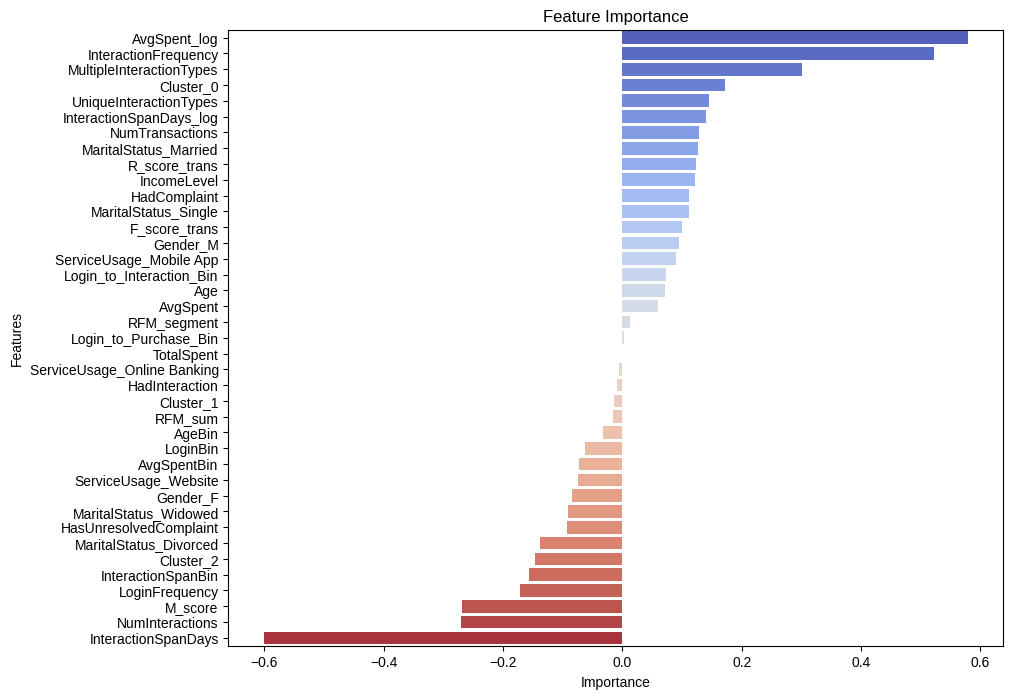

In [444]:
# plot feature importance
plot_feature_importance(lr_model_v1, X_train_v1_processed)

In [445]:
# Logging the lr_model
log_model_result(
    model_name="LR Model V1",
    y_test=y_test_v1,
    y_prob=y_proba_lr_v1,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'max_iter':8000, 'random_state':42},
    notes="Struggles to distinguish classes; very low precision, recall, and F1."
)

In [446]:
pd.set_option('display.max_colwidth', None)

### LR_V1_Top_10

In [447]:
# selecting the top 20 features
lr_v1_top_20 = feature_importance(lr_model_v1, X_train_v1_processed, n=20)
lr_v1_top_20 = lr_v1_top_20['Feature'].to_list()


lr_v1_top_10 = lr_v1_top_20[:10]
lr_v1_top_10

['AvgSpent_log',
 'InteractionFrequency',
 'MultipleInteractionTypes',
 'Cluster_0',
 'UniqueInteractionTypes',
 'InteractionSpanDays_log',
 'NumTransactions',
 'MaritalStatus_Married',
 'R_score_trans',
 'IncomeLevel']

In [448]:
# Fitting the model on the top 10 features
lr_model_v1_top_10 = lr_model.fit(X_train_v1_processed[lr_v1_top_10], y_train_v1)

# Make predictions
y_pred_lr_v1_top_10 = lr_model_v1_top_10.predict(X_test_v1_processed[lr_v1_top_10])
y_proba_lr_v1_top_10 = lr_model_v1_top_10.predict_proba(X_test_v1_processed[lr_v1_top_10])[:, 1]

# Evaluate performance
evaluate_model(lr_model_v1_top_10, X_test_v1_processed[lr_v1_top_10], y_test_v1)

Confusion Matrix:
 [[81 78]
 [26 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61       159
           1       0.16      0.37      0.22        41

    accuracy                           0.48       200
   macro avg       0.46      0.44      0.42       200
weighted avg       0.63      0.48      0.53       200


ROC-AUC Score: 0.41

AUC-PR Score: 0.19



In [450]:
# Logging the model
log_model_result(
    model_name="LR Model V1 Top 10",
    y_test=y_test_v1,
    y_prob=y_proba_lr_v1_top_10,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'max_iter':8000, 'random_state':42},
    notes="Performs worse than V1 baseline."
)

### LR_Model_V2

In [451]:
# Fitting the model on v2 dataset
lr_model_v2 = lr_model.fit(X_train_v2_processed, y_train_v2)

# Make predictions
y_pred_lr_v2 = lr_model_v2.predict(X_test_v2_processed)
y_proba_lr_v2 = lr_model_v2.predict_proba(X_test_v2_processed)[:, 1]

# Evaluate performance
evaluate_model(lr_model_v2, X_test_v2_processed, y_test_v2)

Confusion Matrix:
 [[71 88]
 [23 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.45      0.56       159
           1       0.17      0.44      0.24        41

    accuracy                           0.45       200
   macro avg       0.46      0.44      0.40       200
weighted avg       0.64      0.45      0.50       200


ROC-AUC Score: 0.45

AUC-PR Score: 0.19



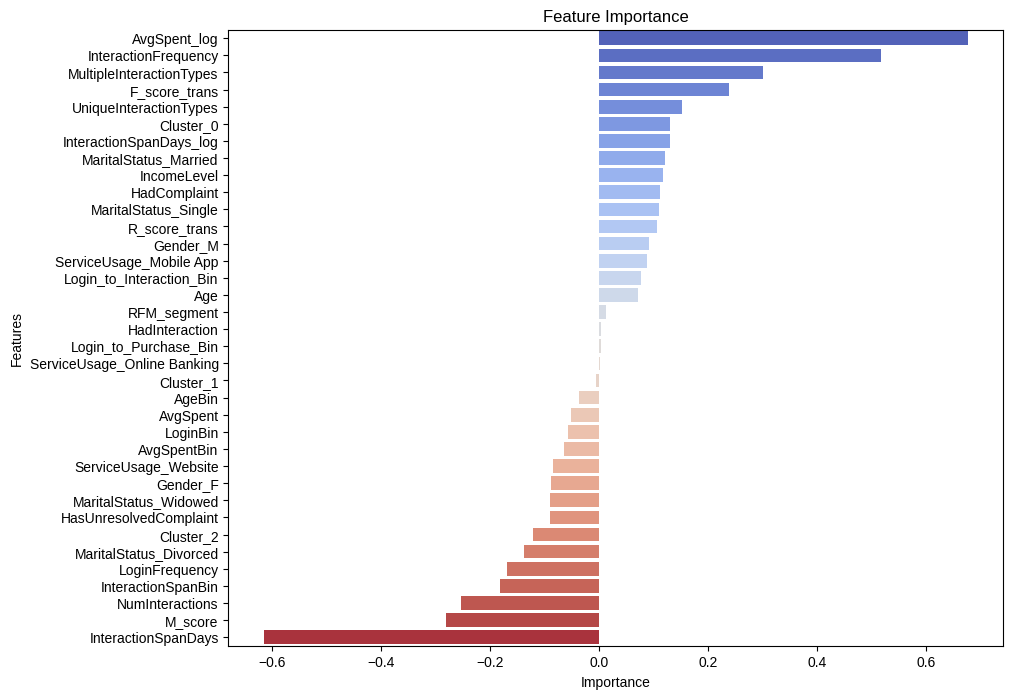

In [452]:
# Feature importance plot
plot_feature_importance(lr_model_v2, X_train_v2_processed)

In [453]:
# Logging the details
log_model_result(
    model_name="LR Model V2",
    y_test=y_test_v2,
    y_prob=y_proba_lr_v2,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'max_iter':8000, 'random_state':42},
    notes="No significant improvements over V1."
)

### LR_Model_V2_Under

In [454]:
# Fitting the model on the v2 undersampled dataset
lr_model_v2_under = lr_model.fit(X_undersampled_v2, y_undersampled_v2)

# Make predictions
y_pred_lr_v2_under = lr_model_v2_under.predict(X_test_v2_processed)
y_proba_lr_v2_under = lr_model_v2_under.predict_proba(X_test_v2_processed)[:, 1]

# Evaluate performance
evaluate_model(lr_model_v2_under, X_test_v2_processed, y_test_v2)

Confusion Matrix:
 [[66 93]
 [19 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.54       159
           1       0.19      0.54      0.28        41

    accuracy                           0.44       200
   macro avg       0.48      0.48      0.41       200
weighted avg       0.66      0.44      0.49       200


ROC-AUC Score: 0.49

AUC-PR Score: 0.24



In [455]:
# Logging the result
log_model_result(
    model_name="LR Model V2 Undersampled",
    y_test=y_test_v2,
    y_prob=y_proba_lr_v2_under,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'max_iter':8000, 'random_state':42},
    notes="Improved recall and F1; precision still low."
)

### LR_Model_V2_Under_Thresh_4

In [456]:
# Reducing the threshold on the undersampled v2 dataset
lr_model_v2_under_thresh_4 = lr_model.fit(X_undersampled_v2, y_undersampled_v2)

# Make predictions
y_proba_lr_v2_under_thresh_4 = lr_model_v2_under_thresh_4.predict_proba(X_test_v2_processed)[:, 1]
y_pred_lr_v2_under_thresh_4 = (y_proba_lr_v2_under_thresh_4 >= 0.4).astype(int)

# Evaluate performance
evaluate_model(lr_model_v2_under_thresh_4, X_test_v2_processed, y_test_v2, 0.4)

Confusion Matrix:
 [[ 38 121]
 [ 13  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.24      0.36       159
           1       0.19      0.68      0.29        41

    accuracy                           0.33       200
   macro avg       0.47      0.46      0.33       200
weighted avg       0.63      0.33      0.35       200


ROC-AUC Score: 0.49

AUC-PR Score: 0.24



In [457]:
# Logging the model
log_model_result(
    model_name="LR Model V2 Undersampled Threshold=0.4",
    y_test=y_test_v2,
    y_prob=y_proba_lr_v2_under_thresh_4,
    threshold=0.4,
    hyperparams={'class_weight':'balanced', 'max_iter':8000, 'random_state':42},
    notes="Higher recall and F1 but much lower accuracy."
)

## Random Forest

In [458]:
# Instantiate the RF model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

### RF_Model_V1

In [459]:
# Fitting rf model on the v1 dataset
rf_model_v1 = rf_model.fit(X_train_v1_processed, y_train_v1)

# Make predictions
y_pred_rf_v1 = rf_model_v1.predict(X_test_v1_processed)
y_proba_rf_v1 = rf_model_v1.predict_proba(X_test_v1_processed)[:, 1]

# Evaluate performance
evaluate_model(rf_model_v1, X_test_v1_processed, y_test_v1)

Confusion Matrix:
 [[158   1]
 [ 41   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       159
           1       0.00      0.00      0.00        41

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.79      0.70       200


ROC-AUC Score: 0.47

AUC-PR Score: 0.19



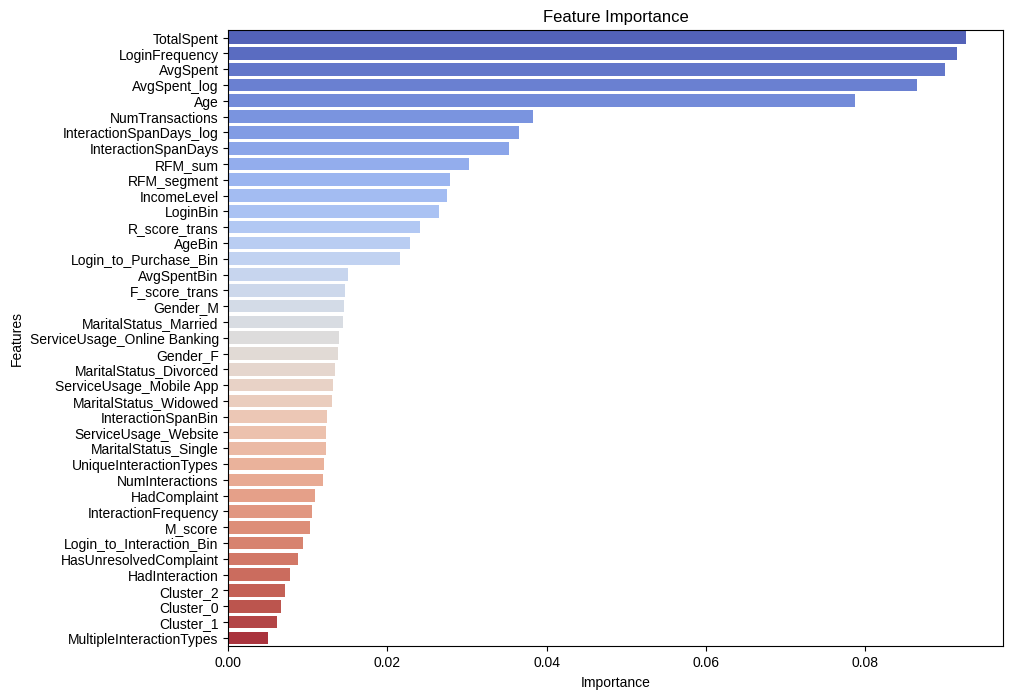

In [460]:
# Feature importance plot
plot_feature_importance(rf_model_v1, X_train_v1_processed)

In [461]:
# Logging
log_model_result(
    model_name="RF Model V1",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="High accuracy but fails to predict positives."
)

### RF_Model_V1_Under

In [462]:
# Fitting the model on undersampled v1
rf_model_v1_under = rf_model.fit(X_undersampled_v1, y_undersampled_v1)

# Make predictions
y_pred_rf_v1_under = rf_model_v1_under.predict(X_test_v1_processed)
y_proba_rf_v1_under = rf_model_v1_under.predict_proba(X_test_v1_processed)[:, 1]

# Evaluate performance
evaluate_model(rf_model_v1_under, X_test_v1_processed, y_test_v1)

Confusion Matrix:
 [[76 83]
 [19 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.48      0.60       159
           1       0.21      0.54      0.30        41

    accuracy                           0.49       200
   macro avg       0.50      0.51      0.45       200
weighted avg       0.68      0.49      0.54       200


ROC-AUC Score: 0.52

AUC-PR Score: 0.23



In [463]:
# Logging
log_model_result(
    model_name="RF Model V1 Undersampled",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1_under,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="Better F1 with undersampling; accuracy still low."
)

### RF_Model_V1_Over

In [464]:
# Fitting the model on the oversampled v1
rf_model_v1_over = rf_model.fit(X_oversampled_v1, y_oversampled_v1)

# Make predictions
y_pred_rf_v1_over = rf_model_v1_over.predict(X_test_v1_processed)
y_proba_rf_v1_over = rf_model_v1_over.predict_proba(X_test_v1_processed)[:, 1]

# Evaluate performance
evaluate_model(rf_model_v1_over, X_test_v1_processed, y_test_v1)

Confusion Matrix:
 [[153   6]
 [ 40   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       159
           1       0.14      0.02      0.04        41

    accuracy                           0.77       200
   macro avg       0.47      0.49      0.46       200
weighted avg       0.66      0.77      0.70       200


ROC-AUC Score: 0.48

AUC-PR Score: 0.19



In [465]:
# Logging
log_model_result(
    model_name="RF Model V1 Oversampled",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1_over,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="High accuracy but fails on positive class."
)

### RF_Model_V1_Under_Thresh_4

In [466]:
# Fitting the model on undersampled v1 with threshold=0.4
rf_model_v1_under_thresh_4 = rf_model.fit(X_undersampled_v1, y_undersampled_v1)

# Make predictions
y_proba_rf_v1_under_thresh_4 = rf_model_v1_under_thresh_4.predict_proba(X_test_v1_processed)[:, 1]
y_pred_rf_v1_under_thresh_4 = (y_proba_rf_v1_under_thresh_4 >= 0.4).astype(int)

# Evaluate performance
evaluate_model(rf_model_v1_under_thresh_4, X_test_v1_processed, y_test_v1, 0.4)

Confusion Matrix:
 [[ 35 124]
 [  6  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.22      0.35       159
           1       0.22      0.85      0.35        41

    accuracy                           0.35       200
   macro avg       0.54      0.54      0.35       200
weighted avg       0.72      0.35      0.35       200


ROC-AUC Score: 0.52

AUC-PR Score: 0.23



In [467]:
# Logging
log_model_result(
    model_name="RF Model V1 Undersampled Threshold=0.4",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1_under_thresh_4,
    threshold=0.4,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="Higher recall and F1 but big drop in accuracy."
)

### RF_Model_V2

In [468]:
# Fitting the model on v2 dataset
rf_model_v2 = rf_model.fit(X_train_v2_processed, y_train_v2)

# Make predictions
y_pred_rf_v2 = rf_model_v2.predict(X_test_v2_processed)
y_proba_rf_v2 = rf_model_v2.predict_proba(X_test_v2_processed)[:, 1]

# Evaluate performance
evaluate_model(rf_model_v2, X_test_v2_processed, y_test_v2)

Confusion Matrix:
 [[158   1]
 [ 39   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       159
           1       0.67      0.05      0.09        41

    accuracy                           0.80       200
   macro avg       0.73      0.52      0.49       200
weighted avg       0.77      0.80      0.72       200


ROC-AUC Score: 0.48

AUC-PR Score: 0.23



In [469]:
# Logging
log_model_result(
    model_name="RF Model V2",
    y_test=y_test_v2,
    y_prob=y_proba_rf_v2,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="High precision but poor recall and F1."
)

### RF_Model_V2_Under

In [470]:
# Fitting the model on undersampled v2
rf_model_v2_under = rf_model.fit(X_undersampled_v2, y_undersampled_v2)

# Make predictions
y_pred_rf_v2_under = rf_model_v2_under.predict(X_test_v2_processed)
y_proba_rf_v2_under = rf_model_v2_under.predict_proba(X_test_v2_processed)[:, 1]

# Evaluate performance
evaluate_model(rf_model_v2_under, X_test_v2_processed, y_test_v2)

Confusion Matrix:
 [[77 82]
 [21 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.48      0.60       159
           1       0.20      0.49      0.28        41

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.44       200
weighted avg       0.66      0.48      0.53       200


ROC-AUC Score: 0.51

AUC-PR Score: 0.27



In [471]:
# Logging
log_model_result(
    model_name="RF Model V2 Undersampled",
    y_test=y_test_v2,
    y_prob=y_proba_rf_v2_under,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="Typical undersampled performance; slight improvement in PR-AUC score."
)

### RF_Model_V2_Over

In [472]:
# Fitting on oversampled v2 dataset
rf_model_v2_over = rf_model.fit(X_oversampled_v2, y_oversampled_v2)

# Make predictions
y_pred_rf_v2_over = rf_model_v2_over.predict(X_test_v2_processed)
y_proba_rf_v2_over = rf_model_v2_over.predict_proba(X_test_v2_processed)[:, 1]

# Evaluate performance
evaluate_model(rf_model_v2_over, X_test_v2_processed, y_test_v2)

Confusion Matrix:
 [[151   8]
 [ 40   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       159
           1       0.11      0.02      0.04        41

    accuracy                           0.76       200
   macro avg       0.45      0.49      0.45       200
weighted avg       0.65      0.76      0.69       200


ROC-AUC Score: 0.48

AUC-PR Score: 0.21



In [473]:
# Logging
log_model_result(
    model_name="RF Model V2 Oversampled",
    y_test=y_test_v2,
    y_prob=y_proba_rf_v2_over,
    threshold=0.5,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="Oversampled, but struggles with positives."
)

### RF_Model_V2_Under_Thresh_4

In [474]:
rf_model_v2_under_thresh_4 = rf_model.fit(X_undersampled_v2, y_undersampled_v2)

# Predictions
y_proba_rf_v2_under_thresh_4 = rf_model_v2_under_thresh_4.predict_proba(X_test_v2_processed)[:, 1]
y_pred_rf_v2_under_thresh_4 = (y_proba_rf_v2_under_thresh_4 >= 0.4).astype(int)

# Evaluate performance
evaluate_model(rf_model_v2_under_thresh_4, X_test_v2_processed, y_test_v2, 0.4)

Confusion Matrix:
 [[ 38 121]
 [  9  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.24      0.37       159
           1       0.21      0.78      0.33        41

    accuracy                           0.35       200
   macro avg       0.51      0.51      0.35       200
weighted avg       0.69      0.35      0.36       200


ROC-AUC Score: 0.51

AUC-PR Score: 0.27



In [475]:
# Logging
log_model_result(
    model_name="RF Model V2 Undersampled Threshold=0.4",
    y_test=y_test_v2,
    y_prob=y_proba_rf_v2_under_thresh_4,
    threshold=0.4,
    hyperparams={'class_weight':'balanced', 'random_state':42},
    notes="Higher recall and F1 but big drop in accuracy.",
)

## Models Table

In [476]:
models_df = get_model_results_df()

In [477]:
models_df

Model  Threshold  Accuracy  Recall  \
0                              LR Model V1        0.5      0.46    0.44   
1                       LR Model V1 Top 10        0.5      0.48    0.37   
2                              LR Model V2        0.5      0.45    0.44   
3                 LR Model V2 Undersampled        0.5      0.44    0.54   
4   LR Model V2 Undersampled Threshold=0.4        0.4      0.33    0.68   
5                              RF Model V1        0.5      0.79    0.00   
6                 RF Model V1 Undersampled        0.5      0.49    0.54   
7                  RF Model V1 Oversampled        0.5      0.77    0.02   
8   RF Model V1 Undersampled Threshold=0.4        0.4      0.35    0.85   
9                              RF Model V2        0.5      0.80    0.05   
10                RF Model V2 Undersampled        0.5      0.48    0.49   
11                 RF Model V2 Oversampled        0.5      0.76    0.02   
12  RF Model V2 Undersampled Threshold=0.4        0.4      0.35    0.78   

    Precision  F1 Score       Confusion Matrix  ROC AUC  PR AUC  \
0        0.17      0.25   [[74, 85], [23, 18]]     0.45    0.19   
1        0.16      0.22   [[81, 78], [26, 15]]     0.41    0.19   
2        0.17      0.24   [[71, 88], [23, 18]]     0.45    0.19   
3        0.19      0.28   [[66, 93], [19, 22]]     0.49    0.24   
4        0.19      0.29  [[38, 121], [13, 28]]     0.49    0.24   
5        0.00      0.00    [[158, 1], [41, 0]]     0.47    0.19   
6        0.21      0.30   [[76, 83], [19, 22]]     0.52    0.23   
7        0.14      0.04    [[153, 6], [40, 1]]     0.48    0.19   
8        0.22      0.35   [[35, 124], [6, 35]]     0.52    0.23   
9        0.67      0.09    [[158, 1], [39, 2]]     0.48    0.23   
10       0.20      0.28   [[77, 82], [21, 20]]     0.51    0.27   
11       0.11      0.04    [[151, 8], [40, 1]]     0.48    0.21   
12       0.21      0.33   [[38, 121], [9, 32]]     0.51    0.27   

                                                     Hyperparameters  \
0   {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
1   {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
2   {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
3   {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
4   {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
5                    {"class_weight": "balanced","random_state": 42}   
6                    {"class_weight": "balanced","random_state": 42}   
7                    {"class_weight": "balanced","random_state": 42}   
8                    {"class_weight": "balanced","random_state": 42}   
9                    {"class_weight": "balanced","random_state": 42}   
10                   {"class_weight": "balanced","random_state": 42}   
11                   {"class_weight": "balanced","random_state": 42}   
12                   {"class_weight": "balanced","random_state": 42}   

                                                                    Notes  
0   Struggles to distinguish classes; very low precision, recall, and F1.  
1                                        Performs worse than V1 baseline.  
2                                    No significant improvements over V1.  
3                            Improved recall and F1; precision still low.  
4                           Higher recall and F1 but much lower accuracy.  
5                           High accuracy but fails to predict positives.  
6                       Better F1 with undersampling; accuracy still low.  
7                              High accuracy but fails on positive class.  
8                          Higher recall and F1 but big drop in accuracy.  
9                                  High precision but poor recall and F1.  
10  Typical undersampled performance; slight improvement in PR-AUC score.  
11                             Oversampled, but struggles with positives.  
12                         Higher recall and F1 bu

In [478]:
def rate_model(row):
    score = 0

    # Accuracy
    if row['Accuracy'] >= 0.5:
        score += 1
    elif 0.45 <= row['Accuracy'] < 0.5:
        score += 0.5

    # Recall
    if row['Recall'] >= 0.5:
        score += 1
    elif 0.4 <= row['Recall'] < 0.5:
        score += 0.5

    # Precision
    if row['Precision'] >= 0.2:
        score += 1
    elif 0.15 <= row['Precision'] < 0.2:
        score += 0.5

    # F1 Score
    if row['F1 Score'] >= 0.3:
        score += 1
    elif 0.25 <= row['F1 Score'] < 0.3:
        score += 0.5

    # ROC AUC
    if row['ROC AUC'] >= 0.5:
        score += 1
    elif 0.45 <= row['ROC AUC'] < 0.5:
        score += 0.5

    # PR AUC
    if row['PR AUC'] >= 0.25:
        score += 1
    elif 0.20 <= row['PR AUC'] < 0.25:
        score += 0.5

    # Assign stars based on total score
    if score >= 5.5:
        return "⭐⭐⭐⭐⭐"
    elif score >= 4.5:
        return "⭐⭐⭐⭐"
    elif score >= 3.5:
        return "⭐⭐⭐"
    elif score >= 2.5:
        return "⭐⭐"
    elif score >= 1.5:
        return "⭐"
    else:
        return "❌"

# Create a dataframe
model_rating = pd.DataFrame({
    'Model': models_df['Model'],
    'Rating': models_df.apply(rate_model, axis=1)
})

model_rating

Model Rating
0                              LR Model V1     ⭐⭐
1                       LR Model V1 Top 10      ❌
2                              LR Model V2      ⭐
3                 LR Model V2 Undersampled     ⭐⭐
4   LR Model V2 Undersampled Threshold=0.4     ⭐⭐
5                              RF Model V1      ⭐
6                 RF Model V1 Undersampled   ⭐⭐⭐⭐
7                  RF Model V1 Oversampled      ⭐
8   RF Model V1 Undersampled Threshold=0.4   ⭐⭐⭐⭐
9                              RF Model V2     ⭐⭐
10                RF Model V2 Undersampled   ⭐⭐⭐⭐
11                 RF Model V2 Oversampled      ⭐
12  RF Model V2 Undersampled Threshold=0.4   ⭐⭐⭐⭐

## Error Analysis - Before Hyperparameter Tuning

### RF_Model_V1_Under_Thresh_4

In [148]:
models_df[models_df["Model"] == "RF Model V1 Undersampled Threshold=0.4"]

Model  Threshold  Accuracy  Recall  \
8  RF Model V1 Undersampled Threshold=0.4        0.4      0.35    0.85   

   Precision  F1 Score      Confusion Matrix  ROC AUC  PR AUC  \
8       0.22      0.35  [[35, 124], [6, 35]]     0.52    0.23   

                                   Hyperparameters  \
8  {"class_weight": "balanced","random_state": 42}   

                                            Notes  
8  Higher recall and F1 but big drop in accuracy.

In [149]:
errors_rf_v1_under_thresh_4, misclassified_1, false_negatives_1, false_positives_1 = error_analysis(
    X_test_v1_processed,
    y_test_v1,
    y_pred_rf_v1_under_thresh_4,
    y_proba_rf_v1_under_thresh_4
)

In [150]:
print(f"Misclassified Rows: {misclassified_1.shape[0]}")
print(f"False Negatives: {false_negatives_1.shape[0]}")
print(f"False Positives: {false_positives_1.shape[0]}")

Misclassified Rows: 130
False Negatives: 6
False Positives: 124


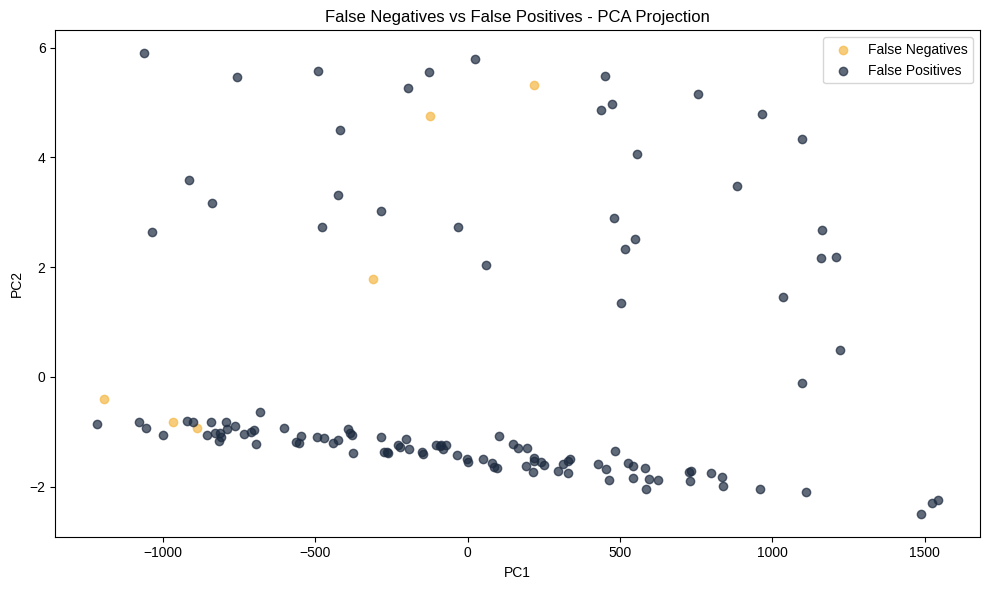

In [151]:
# PCA Plot of FN vs FP
plot_fn_fp_pca(false_negatives_1, false_positives_1)

### LR Model V2 Undersampled Threshold=0.4

In [152]:
models_df[models_df["Model"] == "LR Model V2 Undersampled Threshold=0.4"]

Model  Threshold  Accuracy  Recall  \
4  LR Model V2 Undersampled Threshold=0.4        0.4      0.33    0.68   

   Precision  F1 Score       Confusion Matrix  ROC AUC  PR AUC  \
4       0.19      0.29  [[38, 121], [13, 28]]     0.49    0.24   

                                                    Hyperparameters  \
4  {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   

                                           Notes  
4  Higher recall and F1 but much lower accuracy.

In [153]:
# Error analysis
errors_lr_v2_under_thresh_4, misclassified_2, false_negatives_2, false_positives_2 = error_analysis(
    X_test_v2_processed,
    y_test_v2,
    y_pred_lr_v2_under_thresh_4,
    y_proba_lr_v2_under_thresh_4
)

In [154]:
print(f"Misclassified Rows: {misclassified_2.shape[0]}")
print(f"False Negatives: {false_negatives_2.shape[0]}")
print(f"False Positives: {false_positives_2.shape[0]}")

Misclassified Rows: 134
False Negatives: 13
False Positives: 121


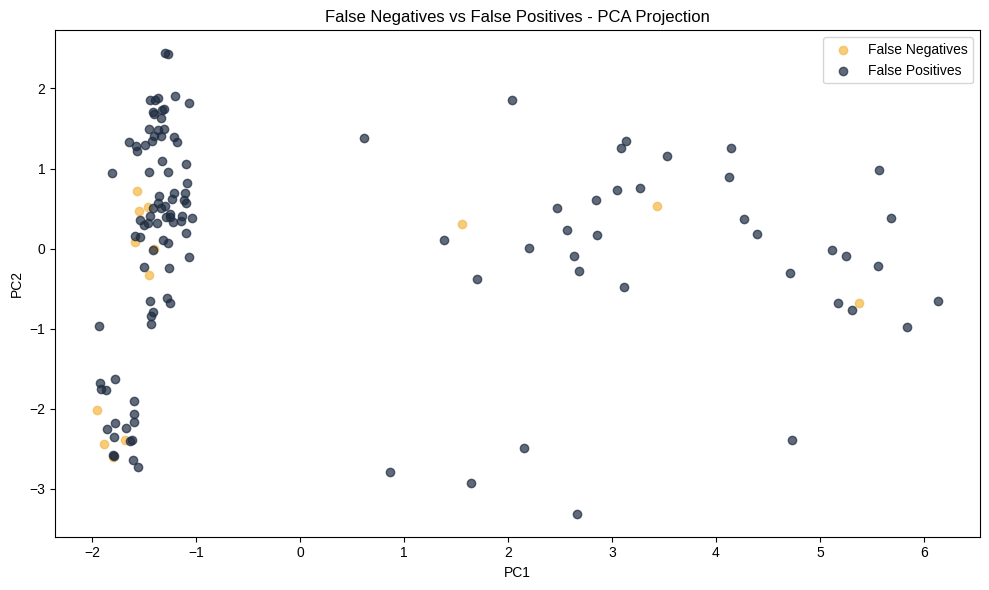

In [155]:
# Plot pca
plot_fn_fp_pca(false_negatives_2, false_positives_2)

### RF_Model_V1_Under

In [156]:
models_df[models_df["Model"] == "RF Model V1 Undersampled"]

Model  Threshold  Accuracy  Recall  Precision  F1 Score  \
6  RF Model V1 Undersampled        0.5      0.49    0.54       0.21       0.3   

       Confusion Matrix  ROC AUC  PR AUC  \
6  [[76, 83], [19, 22]]     0.52    0.23   

                                   Hyperparameters  \
6  {"class_weight": "balanced","random_state": 42}   

                                               Notes  
6  Better F1 with undersampling; accuracy still low.

In [157]:
# Error analysis
errors_rf_v1_under, misclassified_3, false_negatives_3, false_positives_3 = error_analysis(
    X_test_v1_processed,
    y_test_v1,
    y_pred_rf_v1_under,
    y_proba_rf_v1_under
)

print(f"Misclassified Rows: {misclassified_3.shape[0]}")
print(f"False Negatives: {false_negatives_3.shape[0]}")
print(f"False Positives: {false_positives_3.shape[0]}")

Misclassified Rows: 101
False Negatives: 20
False Positives: 81


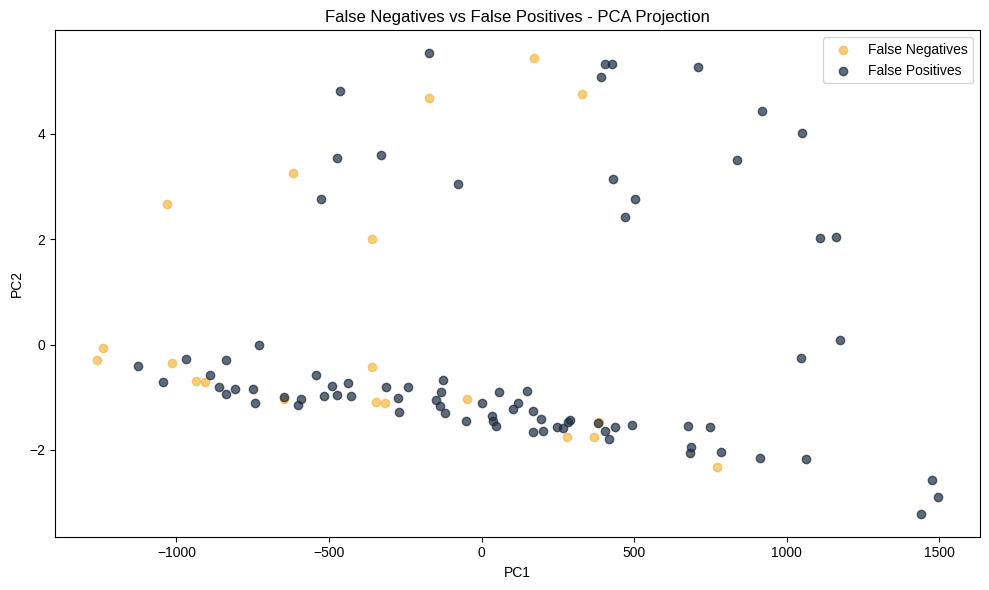

In [158]:
# plot pca
plot_fn_fp_pca(false_negatives_3, false_positives_3)

## Hyperparameter Tuning

### Random Forest

In [480]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 12, 15, 18, 20, None],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'n_estimators': [100, 120, 150, 180, 200],
    'max_features': ['sqrt', 'log2', None],
}

# Stratified K-Fold for imbalanced classification
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

#### V1 Undersampled

In [481]:
# Fit grid search to the v1 undersampled dataset
rf_grid_under_v1 = grid_search.fit(X_undersampled_v1, y_undersampled_v1)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


In [482]:
best_model_under_v1 = rf_grid_under_v1.best_estimator_
best_params_under_v1 = rf_grid_under_v1.best_params_
print(f"Best Parameters: {best_params_under_v1}")

# best_params_under_v1 =  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}


##### RF_Model_V1_Under_Thresh_4 - tuned

In [483]:
y_proba_rf_v1_under_thresh_4_tuned = best_model_under_v1.predict_proba(X_test_v1_processed)[:, 1]
y_pred_rf_v1_under_thresh_4_tuned = (y_proba_rf_v1_under_thresh_4_tuned >= 0.4).astype(int)

In [484]:
# Evaluate performance
evaluate_model(best_model_under_v1, X_test_v1_processed, y_test_v1, 0.4)

Confusion Matrix:
 [[ 36 123]
 [  8  33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.23      0.35       159
           1       0.21      0.80      0.34        41

    accuracy                           0.34       200
   macro avg       0.51      0.52      0.34       200
weighted avg       0.69      0.34      0.35       200


ROC-AUC Score: 0.49

AUC-PR Score: 0.22



In [485]:
models_df[models_df["Model"] == "RF Model V1 Undersampled Threshold=0.4"]

Model  Threshold  Accuracy  Recall  \
8  RF Model V1 Undersampled Threshold=0.4        0.4      0.35    0.85   

   Precision  F1 Score      Confusion Matrix  ROC AUC  PR AUC  \
8       0.22      0.35  [[35, 124], [6, 35]]     0.52    0.23   

                                   Hyperparameters  \
8  {"class_weight": "balanced","random_state": 42}   

                                            Notes  
8  Higher recall and F1 but big drop in accuracy.

In [486]:
# Logging
log_model_result(
    model_name="RF Model V1 Undersampled Threshold=0.4 Tuned",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1_under_thresh_4_tuned,
    threshold=0.4,
    hyperparams=best_params_under_v1,
    notes="Overall drop in performance compared to its untuned version."
)

##### RF Model V1 Under -tuned

In [487]:
# Prediction
y_pred_rf_v1_under_tuned = best_model_under_v1.predict(X_test_v1_processed)
y_proba_rf_v1_under_tuned = best_model_under_v1.predict_proba(X_test_v1_processed)[:, 1]

In [488]:
# Evaluate performance
evaluate_model(best_model_under_v1, X_test_v1_processed, y_test_v1, 0.5)

Confusion Matrix:
 [[74 85]
 [22 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.47      0.58       159
           1       0.18      0.46      0.26        41

    accuracy                           0.47       200
   macro avg       0.48      0.46      0.42       200
weighted avg       0.65      0.47      0.52       200


ROC-AUC Score: 0.49

AUC-PR Score: 0.22



In [489]:
models_df[models_df["Model"] == "RF Model V1 Undersampled"]

Model  Threshold  Accuracy  Recall  Precision  F1 Score  \
6  RF Model V1 Undersampled        0.5      0.49    0.54       0.21       0.3   

       Confusion Matrix  ROC AUC  PR AUC  \
6  [[76, 83], [19, 22]]     0.52    0.23   

                                   Hyperparameters  \
6  {"class_weight": "balanced","random_state": 42}   

                                               Notes  
6  Better F1 with undersampling; accuracy still low.

In [492]:
log_model_result(
    model_name="RF Model V1 Undersampled Tuned",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1_under_tuned,
    threshold=0.5,
    hyperparams=best_params_under_v1,
    notes="Overall drop in performance compared to its untuned version."
)

#### V2 Undersampled

In [168]:
# Fit grid search to the v2 undersampled dataset
rf_grid_under_v2 = grid_search.fit(X_undersampled_v2, y_undersampled_v2)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


In [169]:
best_model_under_v2 = rf_grid_under_v2.best_estimator_
best_params_under_v2 = rf_grid_under_v2.best_params_
print(f"Best Parameters: {best_params_under_v2}")

# best_params_under_v2 =  {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 180}

Best Parameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 180}


##### RF V2 Undersampled - Tuned

In [170]:
y_proba_rf_v2_under_tuned = best_model_under_v2.predict_proba(X_test_v2_processed)[:, 1]
y_pred_rf_v2_under_tuned = (y_proba_rf_v2_under_tuned >= 0.5).astype(int)

In [171]:
evaluate_model(best_model_under_v2, X_test_v2_processed, y_test_v2, 0.5)

Confusion Matrix:
 [[84 75]
 [22 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.53      0.63       159
           1       0.20      0.46      0.28        41

    accuracy                           0.52       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.67      0.52      0.56       200


ROC-AUC Score: 0.5

AUC-PR Score: 0.26



In [172]:
models_df[models_df["Model"] == "RF Model V2 Undersampled"]

Model  Threshold  Accuracy  Recall  Precision  \
10  RF Model V2 Undersampled        0.5      0.48    0.49        0.2   

    F1 Score      Confusion Matrix  ROC AUC  PR AUC  \
10      0.28  [[77, 82], [21, 20]]     0.51    0.27   

                                    Hyperparameters  \
10  {"class_weight": "balanced","random_state": 42}   

                                                                    Notes  
10  Typical undersampled performance; slight improvement in PR-AUC score.

In [493]:
log_model_result(
    model_name="RF Model V2 Undersampled Tuned",
    y_test=y_test_v2,
    y_prob=y_proba_rf_v2_under_tuned,
    threshold=0.5,
    hyperparams=best_params_under_v2,
    notes="Slight increase in accuracy but drop in other metrics compared to its untuned version."
)

##### RF V2 Undersampled Threshold=0.4 - Tuned

In [173]:
y_proba_rf_v2_under_thresh_4_tuned = best_model_under_v2.predict_proba(X_test_v2_processed)[:, 1]
y_pred_rf_v2_under_thresh_4_tuned = (y_proba_rf_v2_under_thresh_4_tuned >= 0.4).astype(int)

In [174]:
evaluate_model(best_model_under_v2, X_test_v2_processed, y_test_v2, 0.4)

Confusion Matrix:
 [[ 40 119]
 [ 10  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.25      0.38       159
           1       0.21      0.76      0.32        41

    accuracy                           0.35       200
   macro avg       0.50      0.50      0.35       200
weighted avg       0.68      0.35      0.37       200


ROC-AUC Score: 0.5

AUC-PR Score: 0.26



In [490]:
models_df[models_df["Model"] == "RF Model V2 Undersampled Threshold=0.4"]

Model  Threshold  Accuracy  Recall  \
12  RF Model V2 Undersampled Threshold=0.4        0.4      0.35    0.78   

    Precision  F1 Score      Confusion Matrix  ROC AUC  PR AUC  \
12       0.21      0.33  [[38, 121], [9, 32]]     0.51    0.27   

                                    Hyperparameters  \
12  {"class_weight": "balanced","random_state": 42}   

                                             Notes  
12  Higher recall and F1 but big drop in accuracy.

In [494]:
log_model_result(
    model_name="RF Model V2 Undersampled Threshold=0.4 Tuned",
    y_test=y_test_v2,
    y_prob=y_proba_rf_v2_under_thresh_4_tuned,
    threshold=0.4,
    hyperparams=best_params_under_v2,
    notes="Not too different from its untuned version."
)

#### V1 Oversampled

In [496]:
# Fit grid search to the v1 oversampled dataset
rf_grid_over_v1 = grid_search.fit(X_oversampled_v1, y_oversampled_v1)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


In [497]:
best_model_over_v1 = rf_grid_over_v1.best_estimator_
best_params_over_v1 = rf_grid_over_v1.best_params_
print(f"Best Parameters: {best_params_over_v1}")

Best Parameters: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 120}


##### RF V1 Oversampled

In [498]:
y_proba_rf_v1_over_tuned = best_model_over_v1.predict_proba(X_test_v1_processed)[:, 1]
y_pred_rf_v1_over_tuned = (y_proba_rf_v1_over_tuned >= 0.5).astype(int)

In [499]:
evaluate_model(best_model_over_v1, X_test_v1_processed, y_test_v1, 0.5)

Confusion Matrix:
 [[152   7]
 [ 40   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       159
           1       0.12      0.02      0.04        41

    accuracy                           0.77       200
   macro avg       0.46      0.49      0.45       200
weighted avg       0.66      0.77      0.70       200


ROC-AUC Score: 0.53

AUC-PR Score: 0.21



In [500]:
models_df[models_df["Model"] == "RF Model V1 Oversampled"]

Model  Threshold  Accuracy  Recall  Precision  F1 Score  \
7  RF Model V1 Oversampled        0.5      0.77    0.02       0.14      0.04   

      Confusion Matrix  ROC AUC  PR AUC  \
7  [[153, 6], [40, 1]]     0.48    0.19   

                                   Hyperparameters  \
7  {"class_weight": "balanced","random_state": 42}   

                                        Notes  
7  High accuracy but fails on positive class.

In [501]:
log_model_result(
    model_name="RF Model V1 Oversampled Tuned",
    y_test=y_test_v1,
    y_prob=y_proba_rf_v1_over_tuned,
    threshold=0.5,
    hyperparams=best_params_over_v1,
    notes="Slight increase in ROC-AUC and AUC-PR but no chnage in other metrics compared to its untuned version."
)

### Logistic Regression

In [507]:
# Parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# Stratified cv
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search setup
grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

#### V2 Undersampled

In [508]:
lr_grid_under_v2 = grid_search.fit(X_undersampled_v2, y_undersampled_v2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [509]:
best_model_lr_under_v2 = lr_grid_under_v2.best_estimator_
best_params_lr_under_v2 = lr_grid_under_v2.best_params_
print(f"Best Parameters: {best_params_lr_under_v2}")

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


##### LR V2 Undersampled - Tuned

In [525]:
y_proba_lr_v2_under_tuned = best_model_lr_under_v2.predict_proba(X_test_v2_processed)[:, 1]
y_pred_lr_v2_under_tuned = (y_proba_lr_v2_under_tuned >= 0.5).astype(int)

In [526]:
evaluate_model(best_model_lr_under_v2, X_test_v2_processed, y_test_v2, 0.5)

Confusion Matrix:
 [[79 80]
 [16 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.50      0.62       159
           1       0.24      0.61      0.34        41

    accuracy                           0.52       200
   macro avg       0.53      0.55      0.48       200
weighted avg       0.71      0.52      0.56       200


ROC-AUC Score: 0.54

AUC-PR Score: 0.22



In [527]:
models_df[models_df['Model'] == 'LR Model V2 Undersampled']

Model  Threshold  Accuracy  Recall  Precision  F1 Score  \
3  LR Model V2 Undersampled        0.5      0.44    0.54       0.19      0.28   

       Confusion Matrix  ROC AUC  PR AUC  \
3  [[66, 93], [19, 22]]     0.49    0.24   

                                                    Hyperparameters  \
3  {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   

                                          Notes  
3  Improved recall and F1; precision still low.

In [516]:
log_model_result(
    model_name="LR Model V2 Undersampled Tuned",
    y_test=y_test_v2,
    y_prob=y_proba_lr_v2_under_tuned,
    threshold=0.5,
    hyperparams=best_params_lr_under_v2,
    notes="Slight drop in PR-AUC but overall improved performance compared to its untuned version."
)

##### LR V2 Undersampled - Tuned


In [528]:
y_proba_lr_v2_under_thresh_4_tuned = best_model_lr_under_v2.predict_proba(X_test_v2_processed)[:, 1]
y_pred_lr_v2_under_thresh_4_tuned = (y_proba_lr_v2_under_thresh_4_tuned >= 0.4).astype(int)

In [529]:
evaluate_model(best_model_lr_under_v2, X_test_v2_processed, y_test_v2, 0.4)

Confusion Matrix:
 [[  1 158]
 [  1  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       159
           1       0.20      0.98      0.33        41

    accuracy                           0.20       200
   macro avg       0.35      0.49      0.17       200
weighted avg       0.44      0.20      0.08       200


ROC-AUC Score: 0.54

AUC-PR Score: 0.22



In [530]:
models_df[models_df['Model'] == 'LR Model V2 Undersampled Threshold=0.4']

Model  Threshold  Accuracy  Recall  \
4  LR Model V2 Undersampled Threshold=0.4        0.4      0.33    0.68   

   Precision  F1 Score       Confusion Matrix  ROC AUC  PR AUC  \
4       0.19      0.29  [[38, 121], [13, 28]]     0.49    0.24   

                                                    Hyperparameters  \
4  {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   

                                           Notes  
4  Higher recall and F1 but much lower accuracy.

In [531]:
log_model_result(
    model_name="LR Model V2 Undersampled Threshold=0.4 Tuned",
    y_test=y_test_v2,
    y_prob=y_proba_lr_v2_under_thresh_4_tuned,
    threshold=0.4,
    hyperparams=best_params_lr_under_v2,
    notes="Improved perfromance but big drop in accuracy; increased FPs compared to its untuned version."
)

### Models Table After Tuning

In [532]:
models_df = get_model_results_df()

In [535]:
models_df

Model  Threshold  Accuracy  Recall  \
0                                    LR Model V1        0.5      0.46    0.44   
1                             LR Model V1 Top 10        0.5      0.48    0.37   
2                                    LR Model V2        0.5      0.45    0.44   
3                       LR Model V2 Undersampled        0.5      0.44    0.54   
4         LR Model V2 Undersampled Threshold=0.4        0.4      0.33    0.68   
5                                    RF Model V1        0.5      0.79    0.00   
6                       RF Model V1 Undersampled        0.5      0.49    0.54   
7                        RF Model V1 Oversampled        0.5      0.77    0.02   
8         RF Model V1 Undersampled Threshold=0.4        0.4      0.35    0.85   
9                                    RF Model V2        0.5      0.80    0.05   
10                      RF Model V2 Undersampled        0.5      0.48    0.49   
11                       RF Model V2 Oversampled        0.5      0.76    0.02   
12        RF Model V2 Undersampled Threshold=0.4        0.4      0.35    0.78   
13  RF Model V1 Undersampled Threshold=0.4 Tuned        0.4      0.34    0.80   
14                RF Model V1 Undersampled Tuned        0.5      0.47    0.46   
15                RF Model V2 Undersampled Tuned        0.5      0.52    0.46   
16  RF Model V2 Undersampled Threshold=0.4 Tuned        0.4      0.35    0.76   
17                 RF Model V1 Oversampled Tuned        0.5      0.77    0.02   
18                LR Model V2 Undersampled Tuned        0.5      0.52    0.61   
19  LR Model V2 Undersampled Threshold=0.4 Tuned        0.4      0.20    0.98   

    Precision  F1 Score       Confusion Matrix  ROC AUC  PR AUC  \
0        0.17      0.25   [[74, 85], [23, 18]]     0.45    0.19   
1        0.16      0.22   [[81, 78], [26, 15]]     0.41    0.19   
2        0.17      0.24   [[71, 88], [23, 18]]     0.45    0.19   
3        0.19      0.28   [[66, 93], [19, 22]]     0.49    0.24   
4        0.19      0.29  [[38, 121], [13, 28]]     0.49    0.24   
5        0.00      0.00    [[158, 1], [41, 0]]     0.47    0.19   
6        0.21      0.30   [[76, 83], [19, 22]]     0.52    0.23   
7        0.14      0.04    [[153, 6], [40, 1]]     0.48    0.19   
8        0.22      0.35   [[35, 124], [6, 35]]     0.52    0.23   
9        0.67      0.09    [[158, 1], [39, 2]]     0.48    0.23   
10       0.20      0.28   [[77, 82], [21, 20]]     0.51    0.27   
11       0.11      0.04    [[151, 8], [40, 1]]     0.48    0.21   
12       0.21      0.33   [[38, 121], [9, 32]]     0.51    0.27   
13       0.21      0.34   [[36, 123], [8, 33]]     0.49    0.22   
14       0.18      0.26   [[74, 85], [22, 19]]     0.49    0.22   
15       0.20      0.28   [[84, 75], [22, 19]]     0.50    0.26   
16       0.21      0.32  [[40, 119], [10, 31]]     0.50    0.26   
17       0.12      0.04    [[152, 7], [40, 1]]     0.53    0.21   
18       0.24      0.34   [[79, 80], [16, 25]]     0.54    0.22   
19       0.20      0.33    [[1, 158], [1, 40]]     0.54    0.22   

                                                                       Hyperparameters  \
0                     {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
1                     {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
2                     {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
3                     {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
4                     {"class_weight": "balanced","max_iter": 8000,"random_state": 42}   
5                                      {"class_weight": "balanced","random_state": 42}   
6                                      {"class_weight": "balanced","random_state": 42}   
7                                      {"class_weight": "balanced","random_state": 42}   
8                                      {"class_weight": "balanced","random_state": 42}   
9                                

In [534]:
# Rating
model_rating = pd.DataFrame({
    'Model': models_df['Model'],
    'Rating': models_df.apply(rate_model, axis=1)
})

model_rating

Model Rating
0                                    LR Model V1     ⭐⭐
1                             LR Model V1 Top 10      ❌
2                                    LR Model V2      ⭐
3                       LR Model V2 Undersampled     ⭐⭐
4         LR Model V2 Undersampled Threshold=0.4     ⭐⭐
5                                    RF Model V1      ⭐
6                       RF Model V1 Undersampled   ⭐⭐⭐⭐
7                        RF Model V1 Oversampled      ⭐
8         RF Model V1 Undersampled Threshold=0.4   ⭐⭐⭐⭐
9                                    RF Model V2     ⭐⭐
10                      RF Model V2 Undersampled   ⭐⭐⭐⭐
11                       RF Model V2 Oversampled      ⭐
12        RF Model V2 Undersampled Threshold=0.4   ⭐⭐⭐⭐
13  RF Model V1 Undersampled Threshold=0.4 Tuned    ⭐⭐⭐
14                RF Model V1 Undersampled Tuned     ⭐⭐
15                RF Model V2 Undersampled Tuned   ⭐⭐⭐⭐
16  RF Model V2 Undersampled Threshold=0.4 Tuned   ⭐⭐⭐⭐
17                 RF Model V1 Oversampled Tuned     ⭐⭐
18                LR Model V2 Undersampled Tuned  ⭐⭐⭐⭐⭐
19  LR Model V2 Undersampled Threshold=0.4 Tuned   ⭐⭐⭐⭐

# 🔬 Model Evaluation & Strategic Insights

We trained and evaluated multiple classification models to predict customer churn, focusing on **F1 score**, **recall**, and **precision**, given the **imbalance** in the target variable.

---

### 🔍 1. **Best Overall Models (F1 Score Focus)**

F1 Score is a reliable metric for imbalanced problems like churn. It balances the cost of **false positives** and **false negatives**.

| Model | F1 Score | Recall | Precision | Threshold | Notes |
|-------|----------|--------|-----------|-----------|-------|
| **RF Model V1 Undersampled @ 0.4** | **0.35** | **0.85** | 0.22 | 0.4 | Best F1 & recall overall |
| LR Model V2 Undersampled @ 0.5 | 0.34 | 0.61 | 0.24 | 0.5 | Best logistic baseline |
| RF Model V1 Undersampled Tuned @ 0.4 | 0.34 | 0.80 | 0.21 | 0.4 | Strong but no tuning gains |
| LR Model V2 Undersampled Tuned @ 0.4 | 0.33 | **0.98** | 0.20 | 0.4 | Highest recall, precision drops |
| RF Model V2 Undersampled @ 0.4 | 0.33 | 0.76 | 0.21 | 0.4 | Slightly lower than RF V1 |

**🧠 Insight:**  
Random Forest models with **undersampling and threshold tuning to 0.4** clearly outperform other options when F1 and recall are prioritized. Particularly helpful if **missing churners is expensive**.

---

### ⚖️ 2. **Precision-Recall Tradeoff**

- **High recall** ensures we catch more churners — even if many predictions are false positives.
- **High precision** means fewer false alarms — but we might miss real churners.

📌 Example:  
- `LR V2 Undersampled @ 0.4`: Recall = 0.98, Precision = 0.20  
  ➤ Most churners are caught, but many flagged users are not actual churners.

> This is **acceptable** when **retention actions are low-cost** (e.g., automated messages, app nudges).

---

### 📉 3. **AUC Performance**

| Metric | Best Score | Model |
|--------|------------|-------|
| ROC AUC | 0.54 | LR V2 Tuned |
| PR AUC  | 0.27 | RF V2 Undersampled |

**🧠 Insight:**  
AUC scores are modest — this reflects the **difficulty** of distinguishing churners due to:
- Feature overlap between churned and retained users
- Class imbalance
- Possibly missing key behavioral or temporal signals

📌 Suggested Enhancements:
- Add features like **login frequency decline**, **recent transaction drop**, **customer service interaction sentiment**

---

### 🔧 4. **Effect of Tuning**

| Model | Tuning Impact |
|-------|----------------|
| RF V2 Undersampled | ROC AUC dropped slightly |
| LR V2 Undersampled | F1 improved from 0.28 → 0.34 |

**🧠 Insight:**  
Tuning yielded **limited improvements**, especially on tree models — possibly due to:
- Feature limitations
- Overfitting or saturation in parameter space

---

### 🔄 5. **Impact of Sampling Strategy**

| Sampling | Recall Range | F1 Score Range |
|----------|--------------|----------------|
| Original | 0.00–0.05 | 0.00–0.09 |
| **Undersampled** | **0.46–0.85** | **0.26–0.35** |
| Oversampled | ~0.02 | ~0.04 |

**🧠 Insight:**  
Undersampling is consistently superior. Oversampling didn't help, possibly due to small sample size or poor replication. Stick with **undersampling** for model building.

---

## 🚨 FP & FN Error Analysis

Understanding where models go wrong is critical to shaping business response.

### ❌ False Positives (FP)

> **Predicted churner, actually retained**

| Model | FP Rate | Precision | FP Behavior |
|-------|---------|-----------|-------------|
| RF V1 @ 0.4 | 78% | 0.22 | Low online activity, infrequent transactions — *early disengagement signs* |
| LR V2 @ 0.5 | 76% | 0.24 | Similar profile — misclassified but risky |

**Insight:**  
Though incorrect, these users **share patterns with churners** — targeting them could still improve retention.

> ✅ Use **non-intrusive nudges** (emails, reward alerts) to re-engage them cost-effectively.

---

### ❗ False Negatives (FN)

> **Missed churner, predicted to stay**

| Model | FN Rate | Recall | FN Behavior |
|-------|---------|--------|-------------|
| RF V1 @ 0.4 | **15%** | **85%** | Slight digital activity, few complaints — easily missed |
| LR V2 @ 0.5 | 39% | 61% | Nearly 4 in 10 churners undetected! |

**Insight:**  
FNs are **most costly** — they represent real customers who left without warning or intervention.

> ⚠️ Avoiding false negatives is **more critical** than avoiding false positives.

---

### 🧾 Strategic Recommendations

| Goal | Model | Reason |
|------|-------|--------|
| **Maximize churn recall** | **RF V1 Undersampled @ 0.4** | Catches 85% of churners, acceptable precision |
| **Balance recall & interpretability** | LR V2 Undersampled @ 0.5 | Easier to explain, moderate recall (61%) |
| **Improve long-term AUC** | — | Need better features (temporal, behavioral) |
| **Cost-sensitive interventions** | RF/LR @ 0.4 | FP users still show warning signs, nudges justified |



# ✅ **Final Recommendation**

### 🥇 Recommended Model for Deployment:
**Random Forest V1 Undersampled** with **Threshold = 0.4**

- **F1 Score:** 0.35  
- **Recall:** 0.85 (very high)  
- **Precision:** 0.22  
- **Why?** Best at catching actual churners, which aligns with the business need to **minimize customer loss**.

---

### 💼 Using the Model in the Business

| Use Case | Action |
|----------|--------|
| **Churn Risk Flagging** | Use the model to score all users weekly or monthly. Flag users with churn probability > 0.6 as high risk. |
| **Customer Segmentation** | Define tiers: 0.4–0.6 = moderate risk, >0.6 = high risk, for targeted outreach. |
| **Automated Retention Campaigns** | Send emails, in-app nudges, or discounts automatically to flagged users. |
| **Manual Follow-Up** | Assign customer reps to high-value accounts predicted to churn. |
| **A/B Test Campaign ROI** | Test retention offers on flagged customers to identify cost-effective strategies. |

> ✅ Even if precision is low, **recall is high**, meaning the model helps ensure *at-risk users aren’t missed* — which is critical for proactive retention.

---

### 🚀 Model Improvement Ideas

#### 🔍 Feature Engineering Suggestions
Add richer behavioral data:

- Days since last login
- Drop in transaction volume or frequency
- Customer service issue count/trend
- Change in engagement (e.g., active days / total days)
- Referral status or community engagement level

#### 🔧 Modeling Enhancements
- Use **XGBoost or LightGBM** for better imbalance handling
- Try **time-windowed features** (e.g., last 7/14/30 days)
- Use **stacked models** to blend strengths of RF and LR
- Create **segment-specific models** for VIPs or new users

#### 🔁 Operational Improvements
- Retrain the model **quarterly** using recent data to reflect evolving behavior.
- Build a **feedback loop** to track actual churn post-prediction and retrain accordingly.
